# Financial Econometrics I

#### Linear AR and MA models.

by Lukas Vacha and Josef Kurka

#### Seminar 3: Summer Semester 2023/2024
___

The data for seminars can be downloaded on [Google drive](https://drive.google.com/drive/u/0/folders/1_C5kBw9KY59K1J-uRud3G-8kJHfZy_zC)

For this seminar you will need 'data_seminar3.csv' and 'spread.csv'.
___

### ARMA processes 'ingredients'

AR(1)

$$y_t = \phi_0 + \phi_1 y_{t-1} + \epsilon_t$$

MA(1)

$$y_t = \theta_0 + \theta_1 \epsilon_{t-1} + \epsilon_t$$

ARMA(1, 1)

$$y_t = \phi_0 + \phi_1 y_{t-1} + \theta_1 \epsilon_{t-1} + \epsilon_t$$

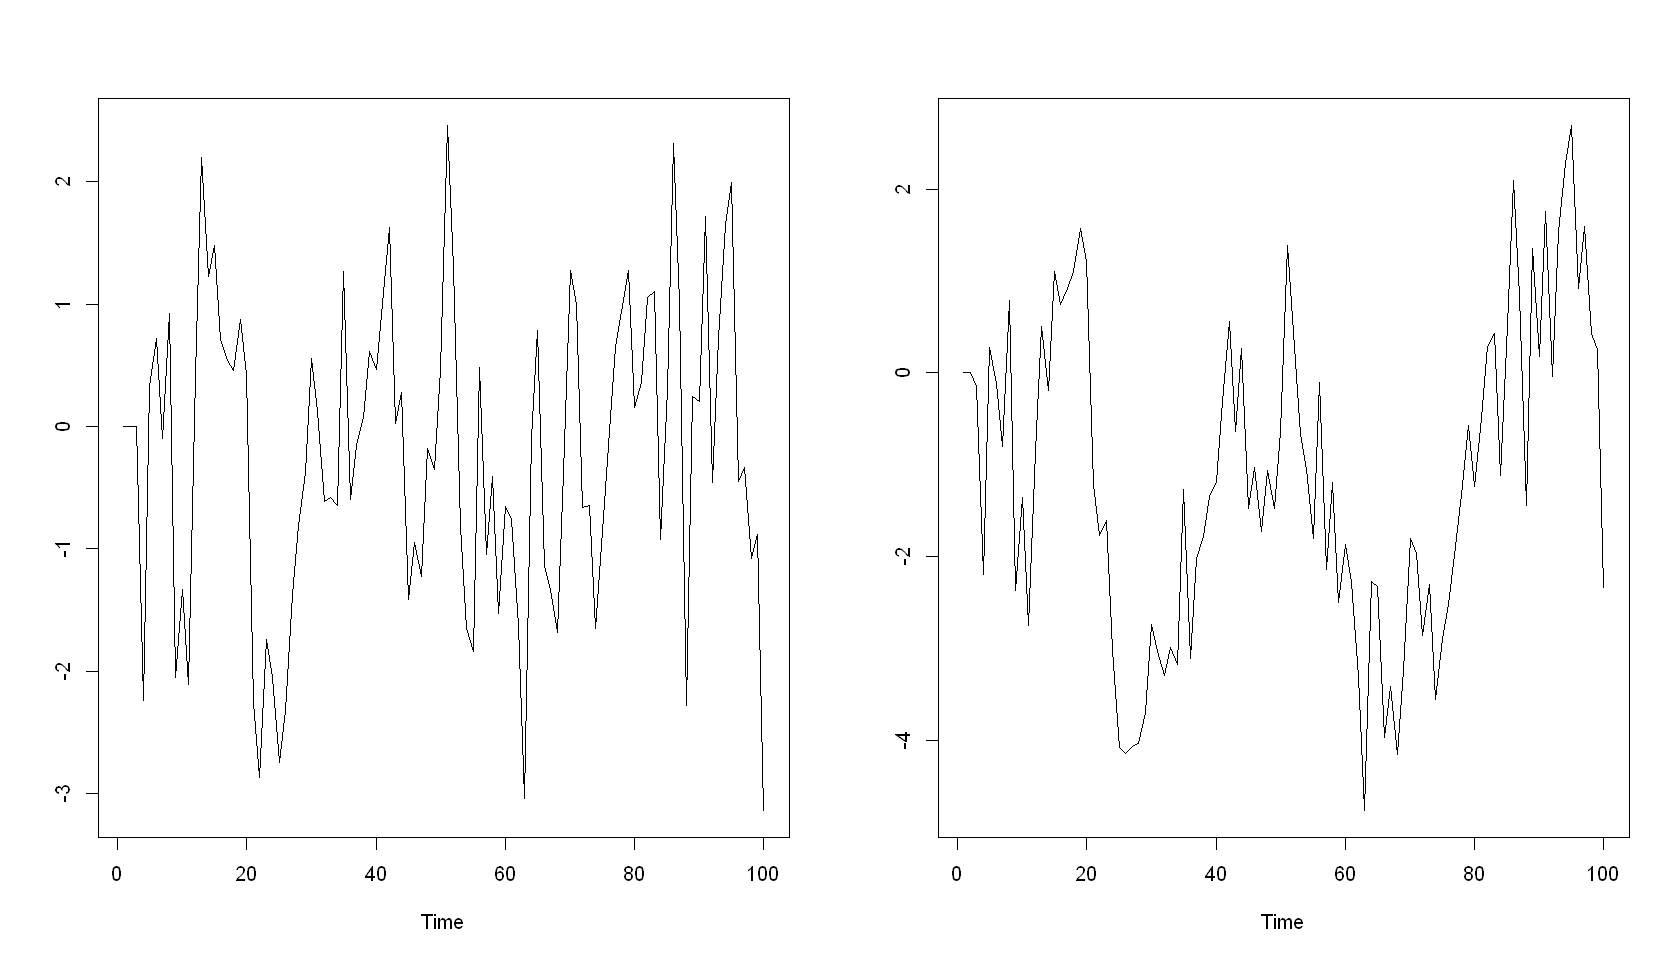

In [1]:
options(repr.plot.width = 14, repr.plot.height = 8)
set.seed(229)
par(mfrow = c(1, 2))
eps <- rnorm(100)
phi <- 0.6
phi2 <- 0.3
s1 <- vector()
s2 <- vector()
s1[1] <- 0
s2[1] <- 0
s1[2] <- 0
s2[2] <- 0
for (i in 3:100){
    s1[i] <- phi * s1[i - 1]  + phi2 * s1[i - 2] + eps[i]
    s2[i] <- phi * eps[i - 1] + phi2 * eps[i - 2]+ eps[i]
}
plot.ts(s2, ylab = NA)
plot.ts(s1, ylab = NA)

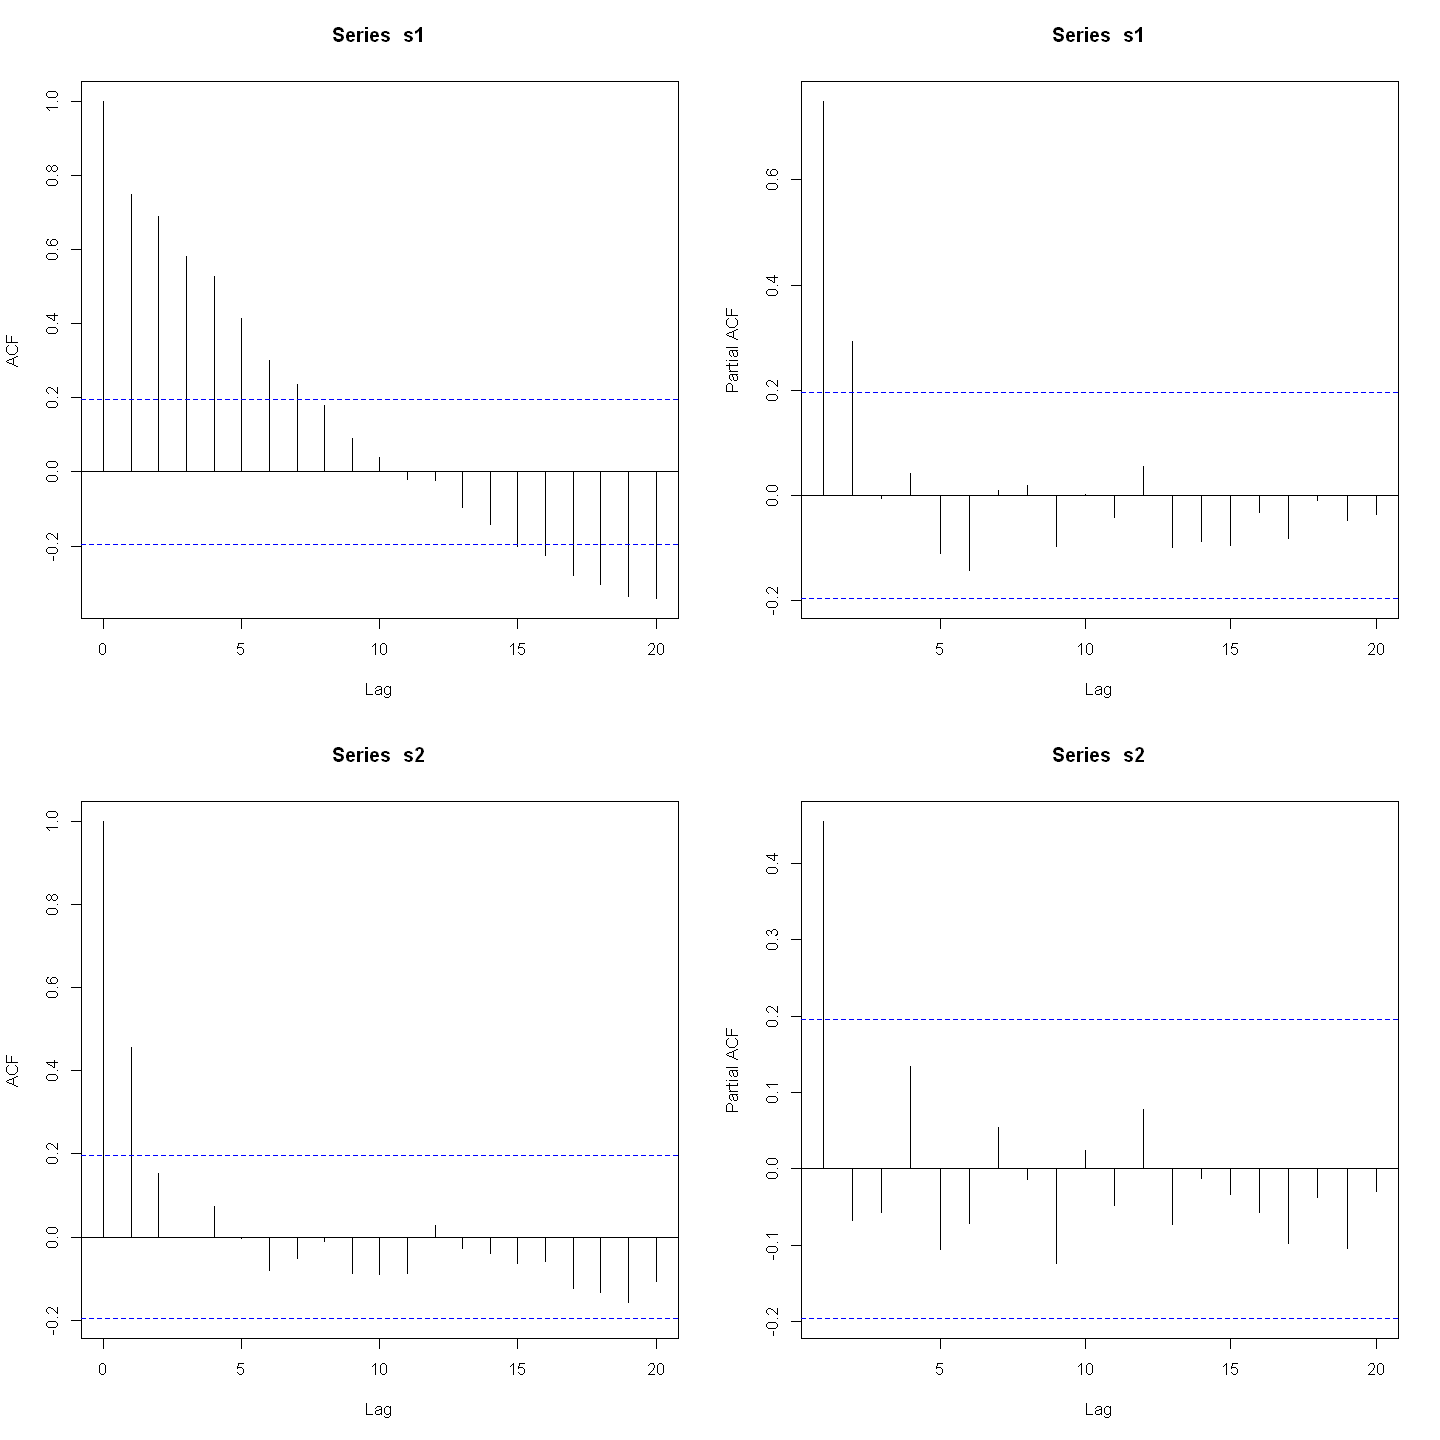

In [2]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(2, 2))
acf(s1)
pacf(s1)
acf(s2)
pacf(s2)

-> the s2 is MA process

## ARMA models identification and estimation

We are going to work with a couple of particular time series from the ARMA family, and try to identify the "right" order of AR and MA.

We will use the Box-Jenkins method

* Identification
* Estimation
* Model diagnostics

#### Identification

One of the first steps is to look at ACF, and PACF. There some typical ACFs that signal different processes.

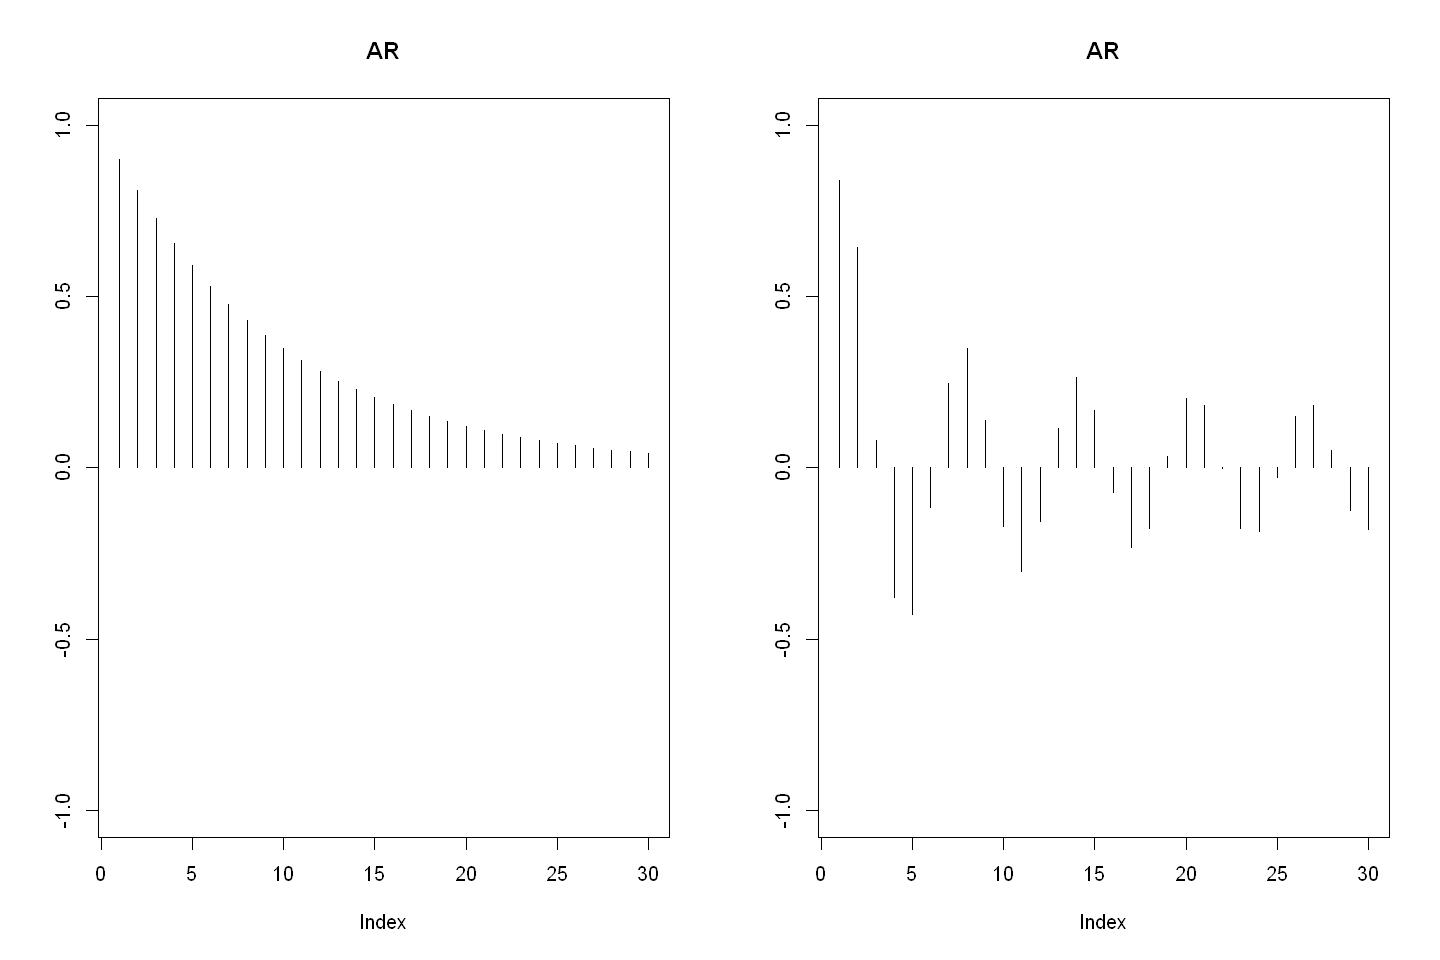

In [3]:
options(repr.plot.width = 12, repr.plot.height = 8)
par(mfrow = c(1, 2))
x <- seq(1, 30)
plot(0.9 ^ x, type = 'h', ylim = c(-1, 1), main = 'AR', ylab = NA)
plot(sin(x) * 1/(sqrt(x)), type = 'h', ylim = c(-1, 1), main = 'AR', ylab = NA)

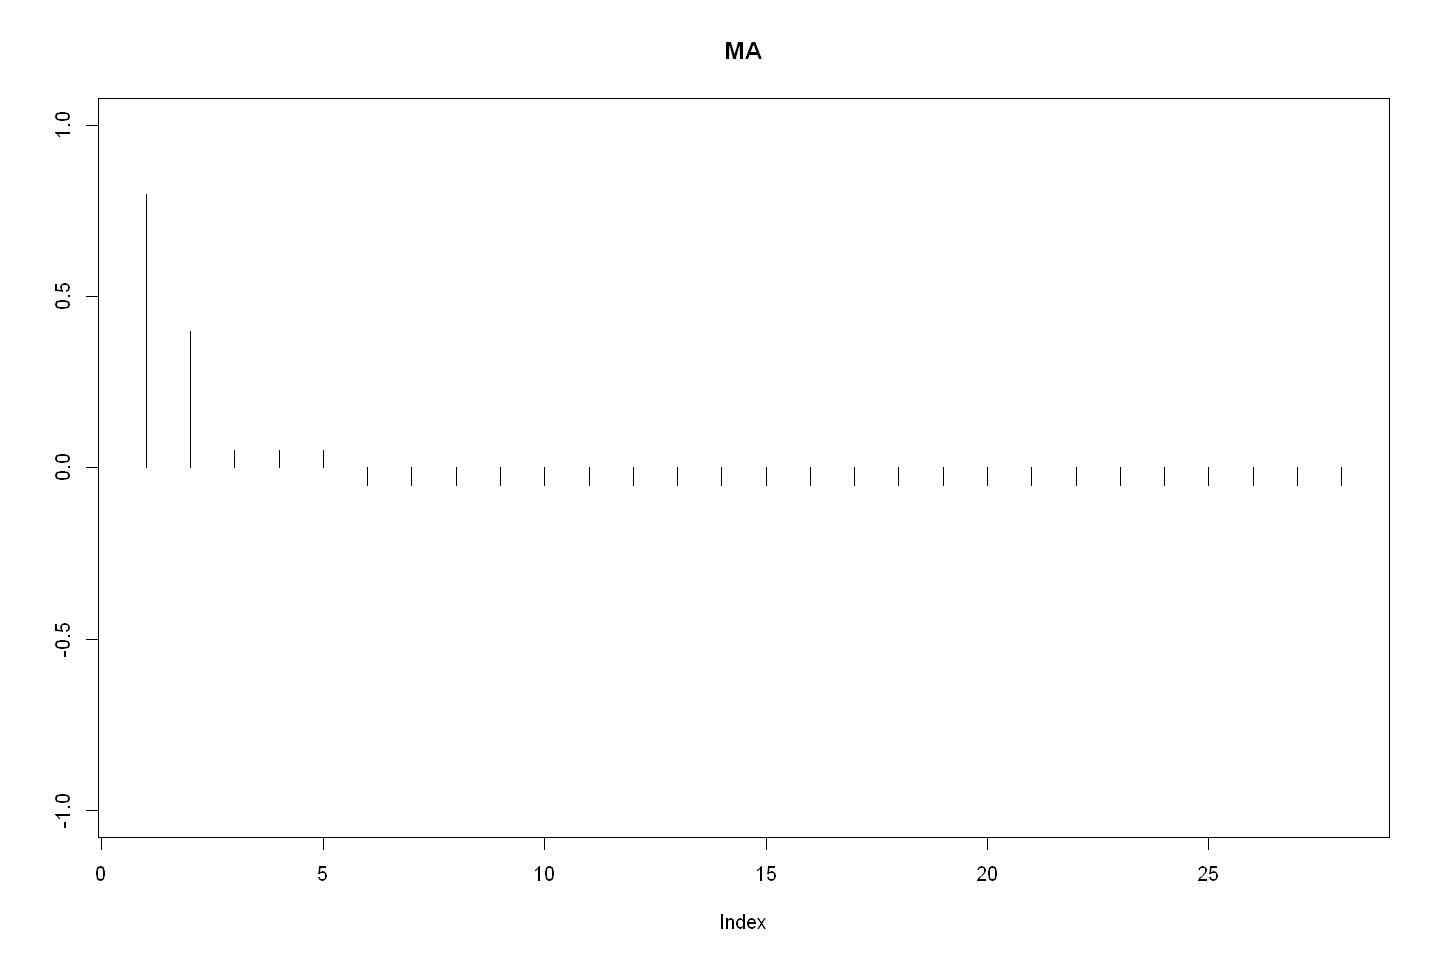

In [4]:
x <- c( 0.8, 0.4,  rep(0.05, 3), rep(-0.05, 23))
plot(x, type = 'h', main = 'MA',  ylim = c(-1, 1), , ylab = NA)

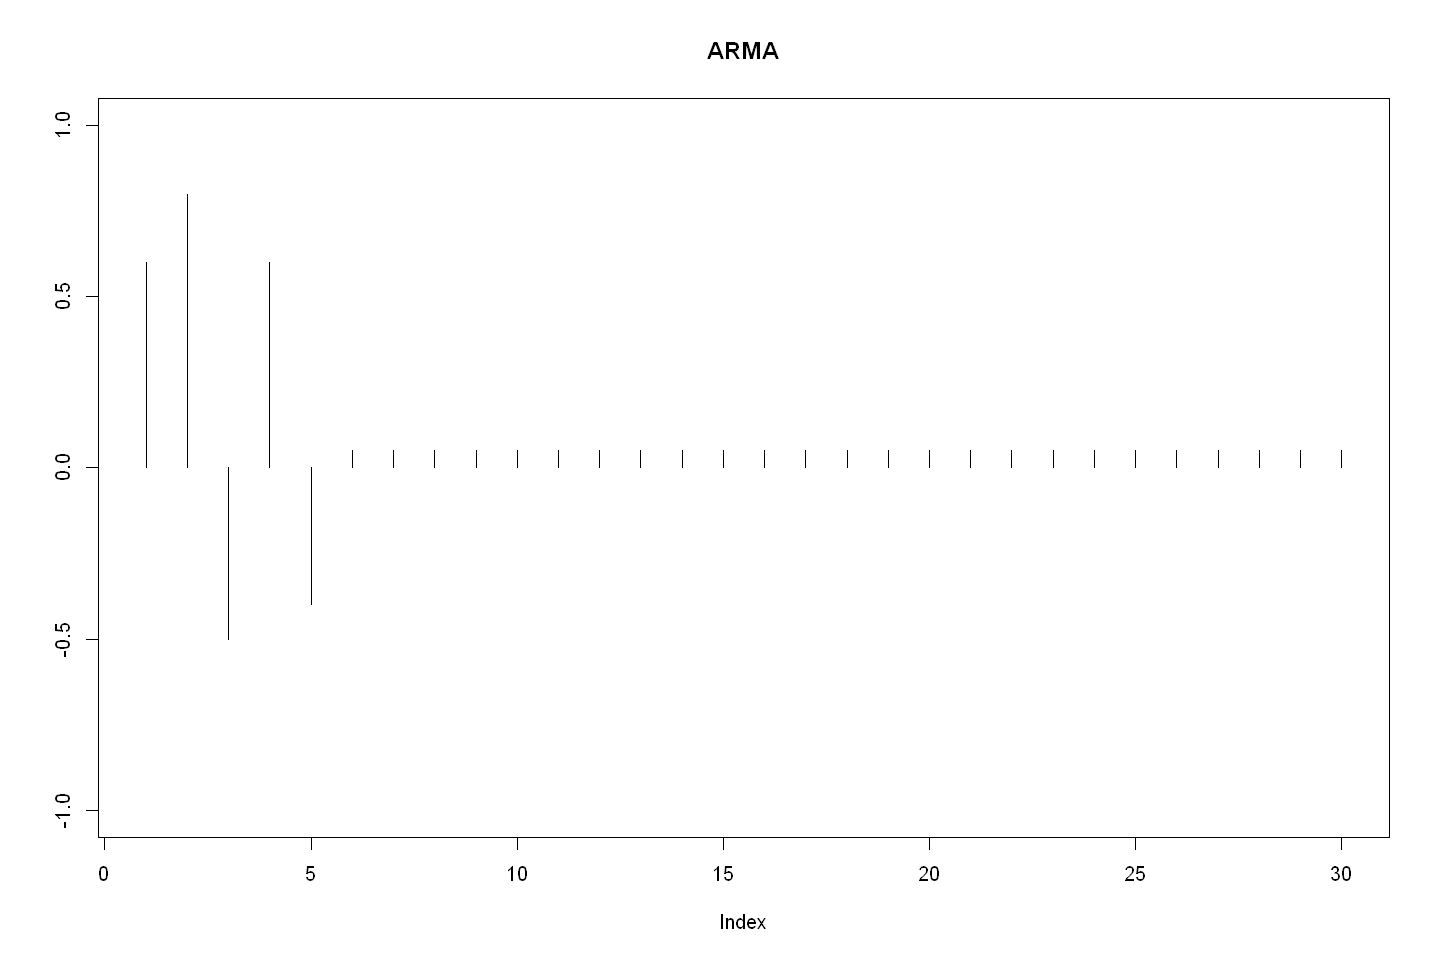

In [5]:
x <- c(0.6, 0.8, -0.5, 0.6, -0.4, rep(0.05, 25))
plot(x, type = 'h', main = 'ARMA',  ylim = c(-1, 1), ylab = NA)

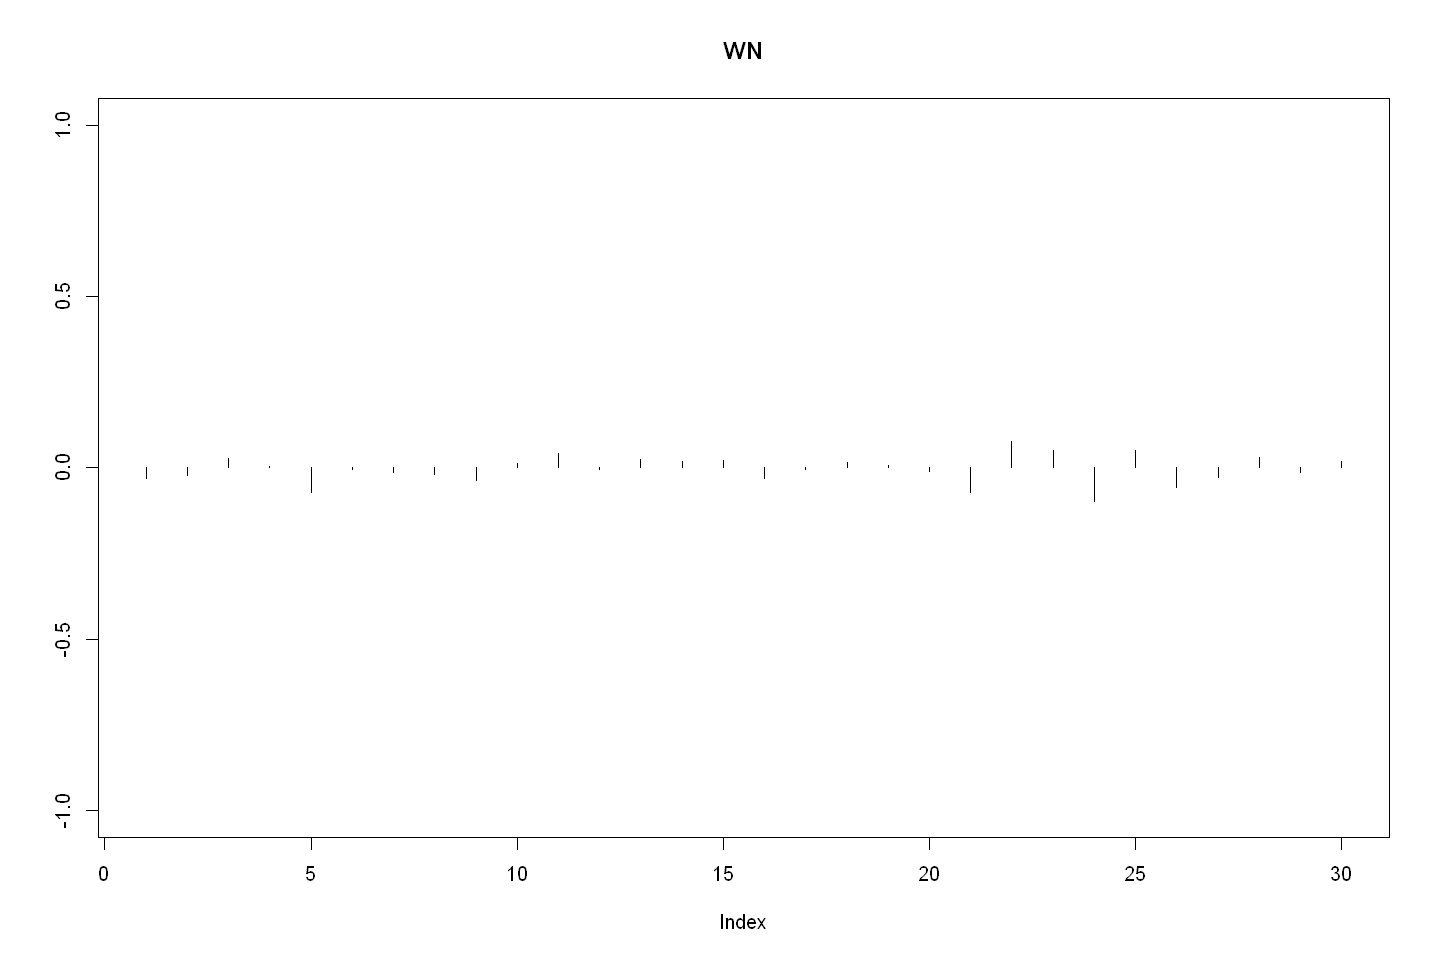

In [6]:
plot(rnorm(30, sd = 0.05), ylim = c(-1, 1), main = 'WN', type = 'h', ylab = NA)

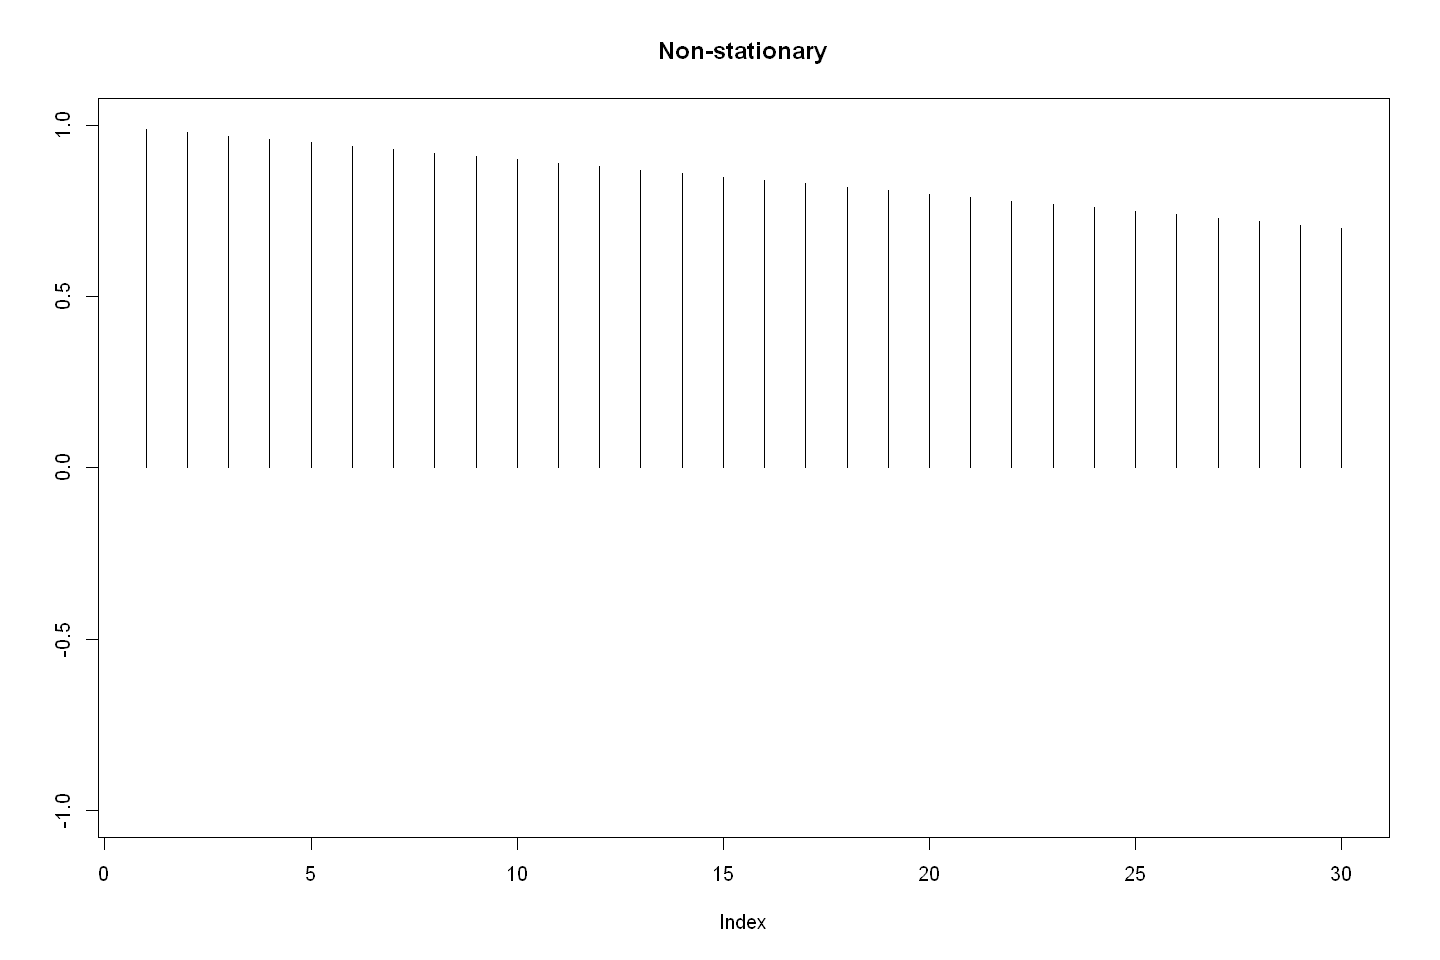

In [7]:
x <- seq(1, 30)
plot(1 - 0.01 * x, ylim = c(-1, 1), main = 'Non-stationary', type = 'h', ylab = NA)

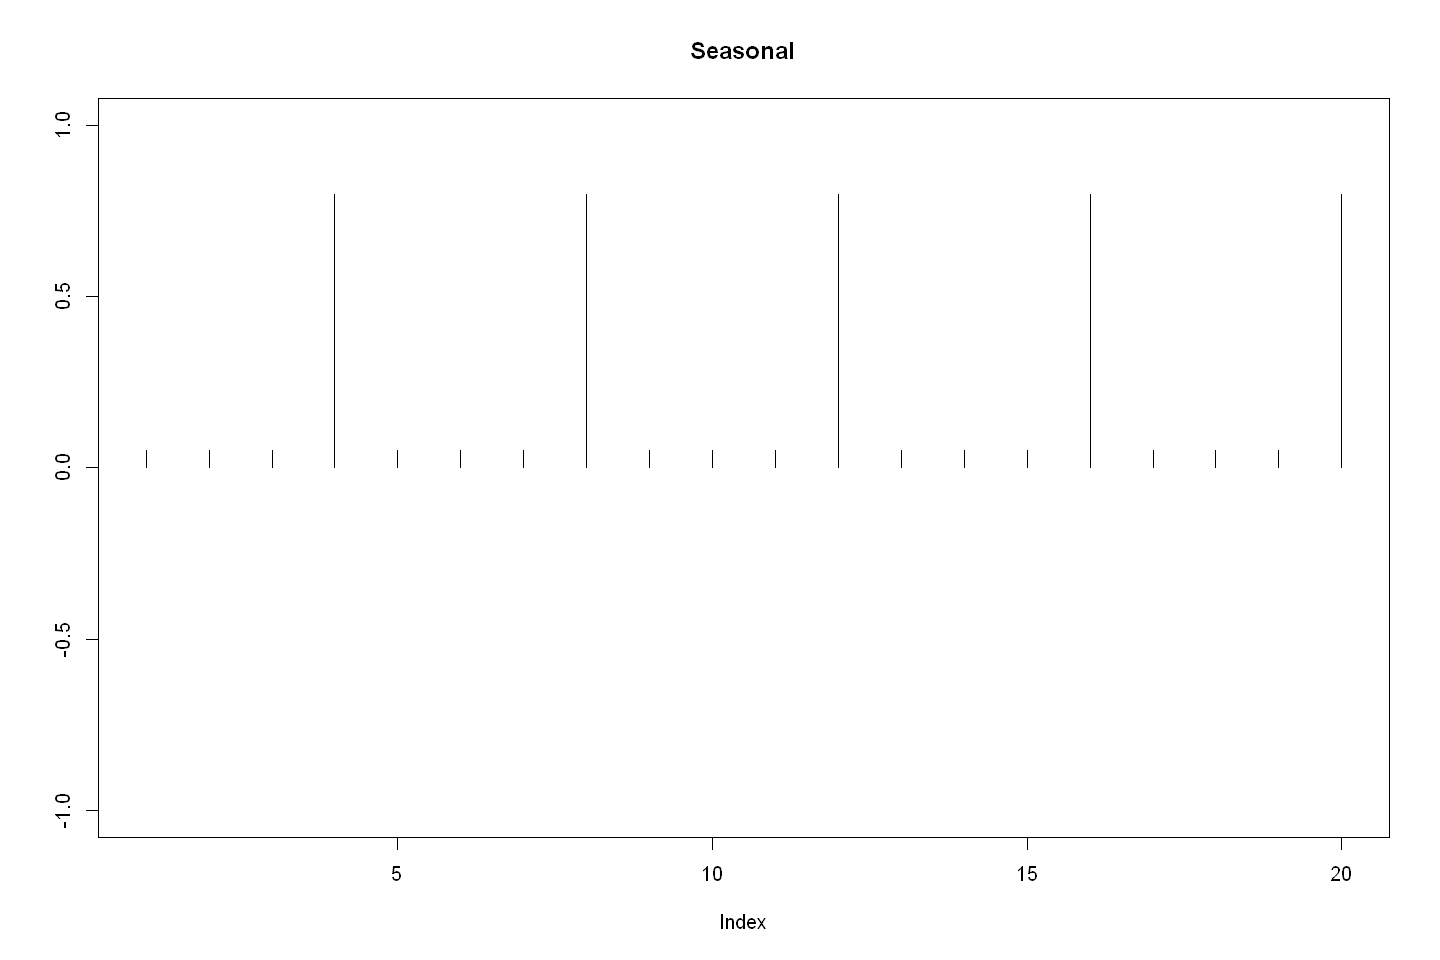

In [8]:
x <- c(rep(0.05, 3), 0.8, rep(0.05, 3), 0.8, rep(0.05, 3), 0.8, rep(0.05, 3), 0.8, rep(0.05, 3), 0.8)
plot(x, type = 'h', main = 'Seasonal',  ylim = c(-1, 1), ylab = NA)

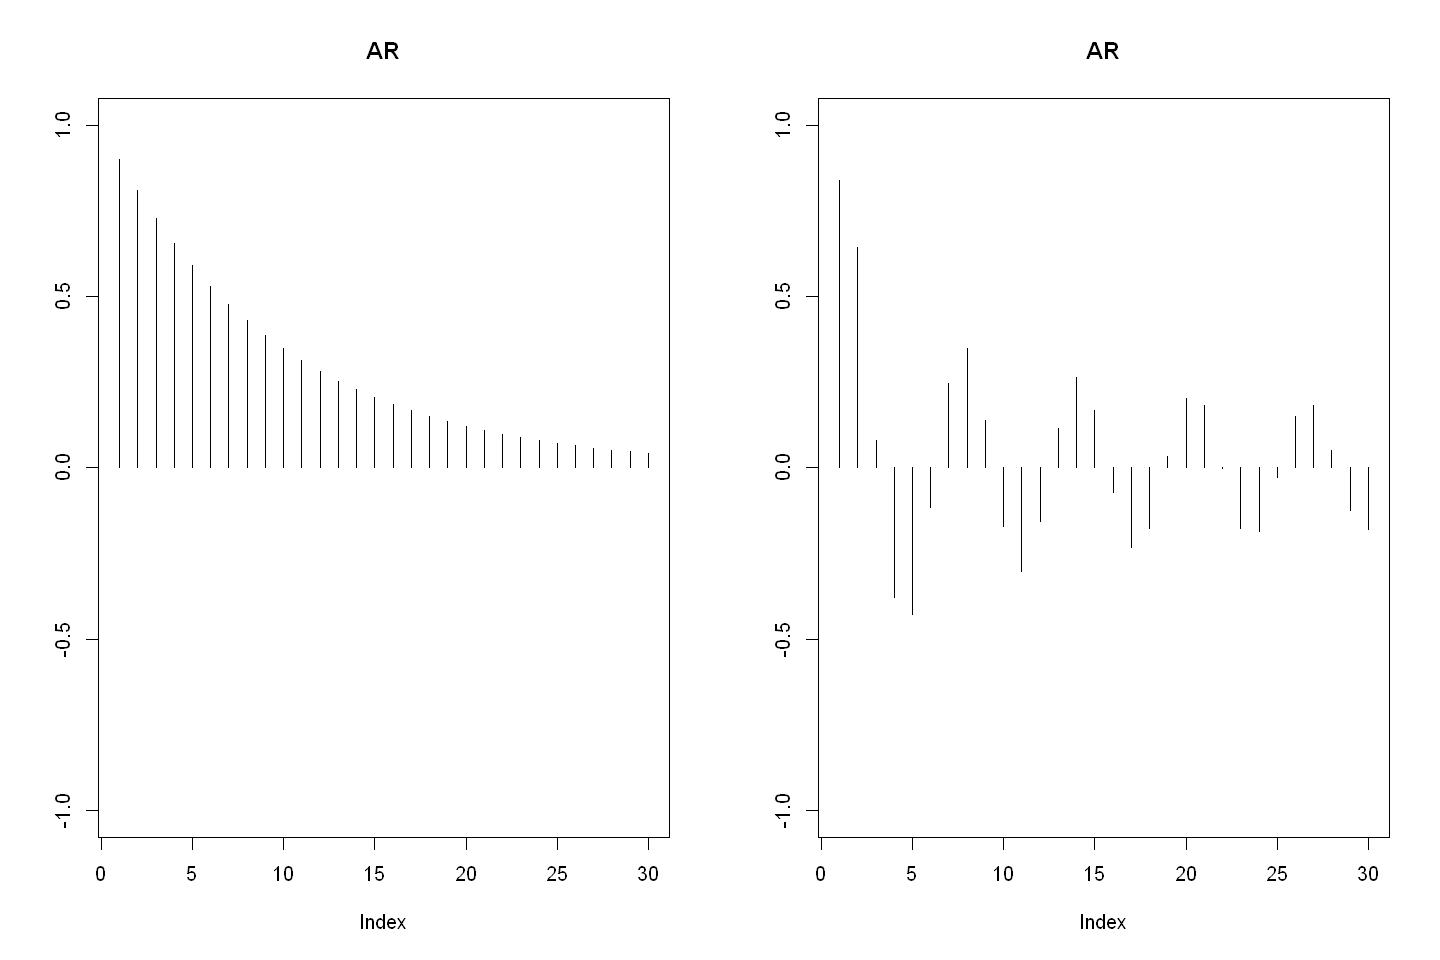

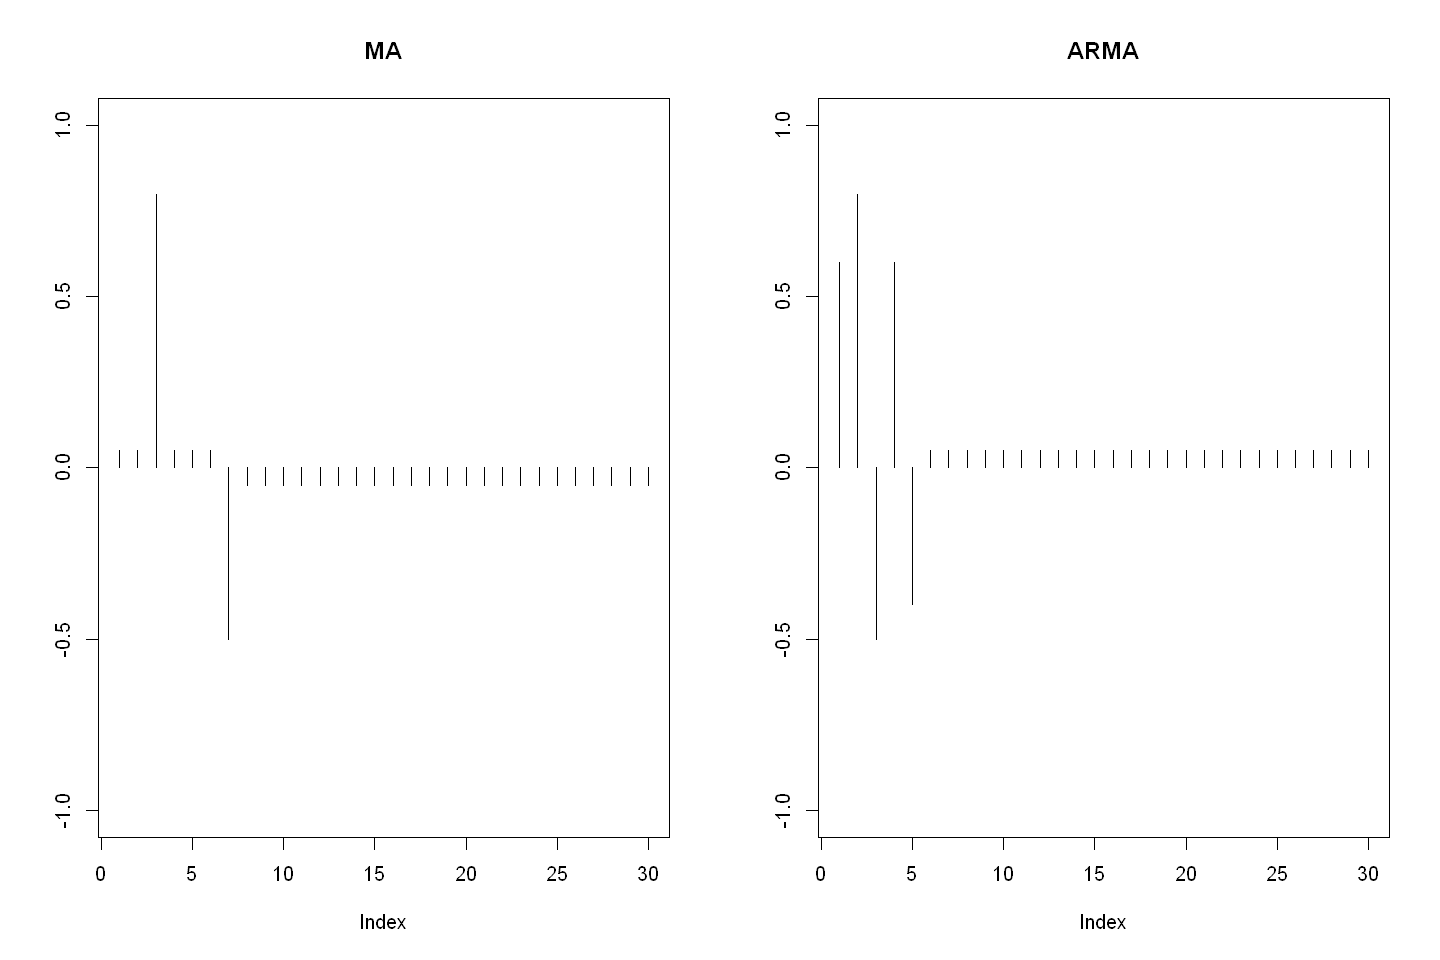

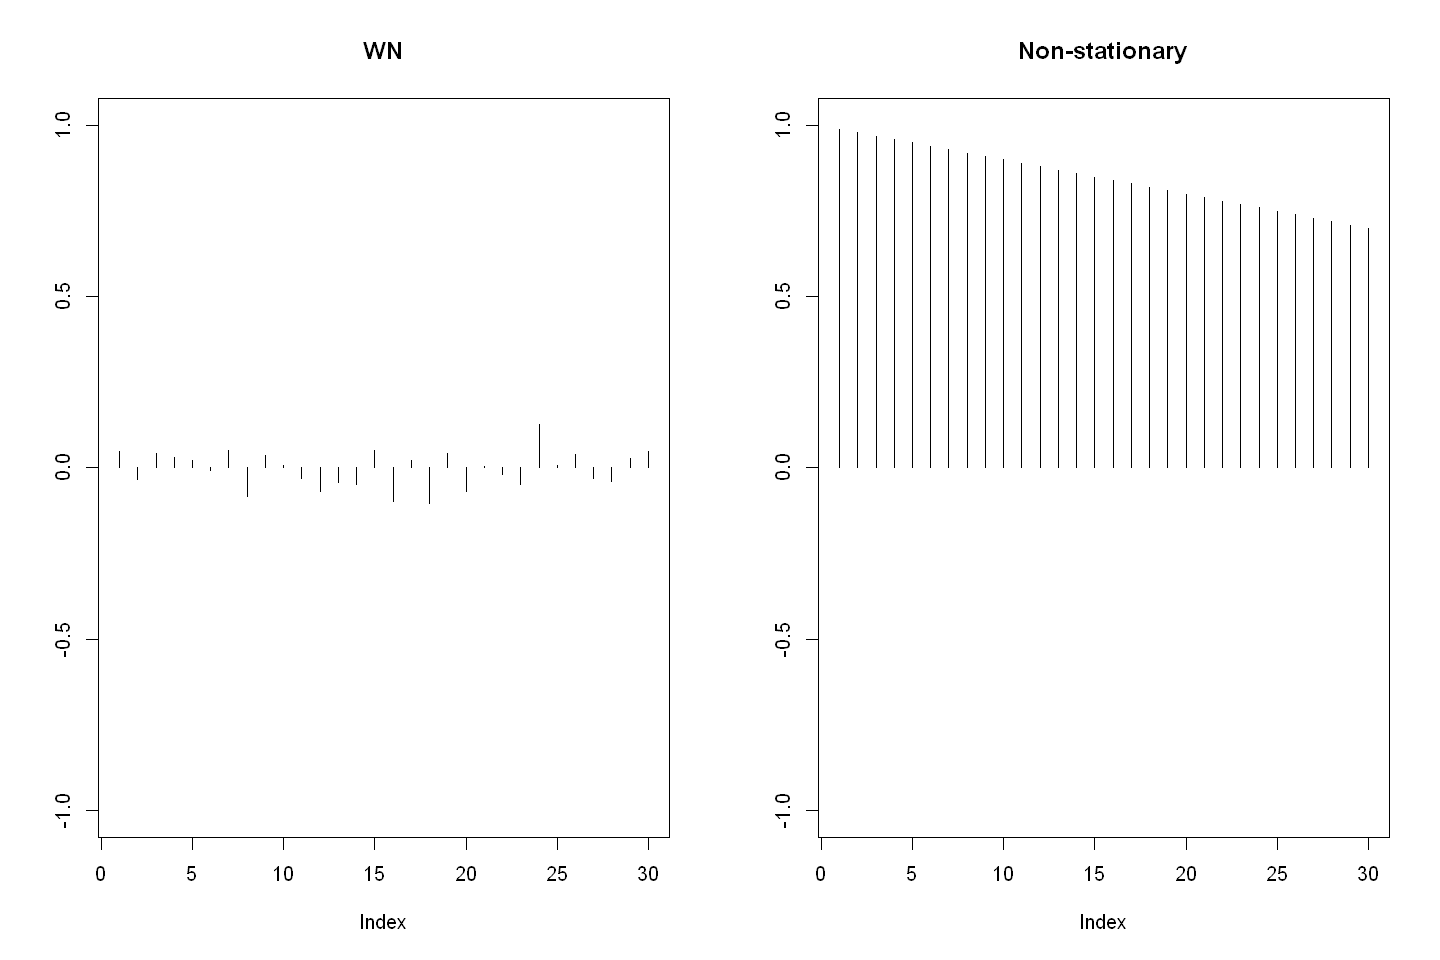

In [9]:
par(mfrow = c(3, 2))
par(mfrow = c(1, 2))
x <- seq(1, 30)
plot(0.9 ^ x, type = 'h', ylim = c(-1, 1), main = 'AR', ylab = NA)
plot(sin(x) * 1/(sqrt(x)), type = 'h', ylim = c(-1, 1), main = 'AR', ylab = NA)
x <- c(rep(0.05, 2), 0.8, rep(0.05, 3), -0.5, rep(-0.05, 23))
plot(x, type = 'h', main = 'MA',  ylim = c(-1, 1), ylab = NA)
x <- c(0.6, 0.8, -0.5, 0.6, -0.4, rep(0.05, 25))
plot(x, type = 'h', main = 'ARMA',  ylim = c(-1, 1), ylab = NA)
plot(rnorm(30, sd = 0.05), ylim = c(-1, 1), main = 'WN', type = 'h', ylab = NA)
x <- seq(1, 30)
plot(1 - 0.01 * x, ylim = c(-1, 1), main = 'Non-stationary', type = 'h', ylab = NA)

------------------------------------------------------------------------------------------------------------------------
# Box-Jenkins method        ARMA(p,q)

1) identification - stationarity, ACF, PACF, try to identify p and q
2) estimation
3) diagnostics - check for dependencies in ACF and PACF of residuals - there are no dependencies left
               - mean and variance
               - IC / Informaation Criteria

-------------------------------------------------------------------------------------------------------------------------


Load the data and observe the Box-Jenkins Method in practice.

In [11]:
proc <- read.csv("data_seminar3.csv")
# Data from Google Drive may be comma separated
spr <- read.csv("spread.csv", sep = ",")

spr$Spread <- as.numeric(as.character(spr$Spread))
colnames(spr) <- c('Year', 'Quarter', 'Value')
spr$Year <- as.Date(paste(spr$Year, paste(0, spr$Quarter, sep = ""), 01,  sep = "-"), format = "%Y-%m-%d")
spr <- spr[, -2]

In [12]:
head(proc)
head(spr)

y1 <- proc$Y1
y2 <- proc$Y2
y3 <- proc$Y3

spread <- spr$Value

Y1       Y2       Y3      
1  0.60805  3.96768  0.04856
2 -0.29348 -2.23051  0.14200
3 -0.68832  1.69602 -0.10089
4 -0.86596 -1.61072 -0.50346
5  0.66890  3.79400 -0.50044
6  0.65094 -4.81795  0.15233

Year       Value
1 1960-01-01 0.54 
2 1960-02-01 1.17 
3 1960-03-01 1.44 
4 1960-04-01 1.53 
5 1961-01-01 1.41 
6 1961-02-01 1.46

Y1, Y2, and Y3 are simulated realizations of particular processes from ARMA family. Our task is to try find out what is the underlying process in each case. The answers can be found on the bottom of each exercise.

### Y1

Let's start with series Y1. Begin with plotting the data.

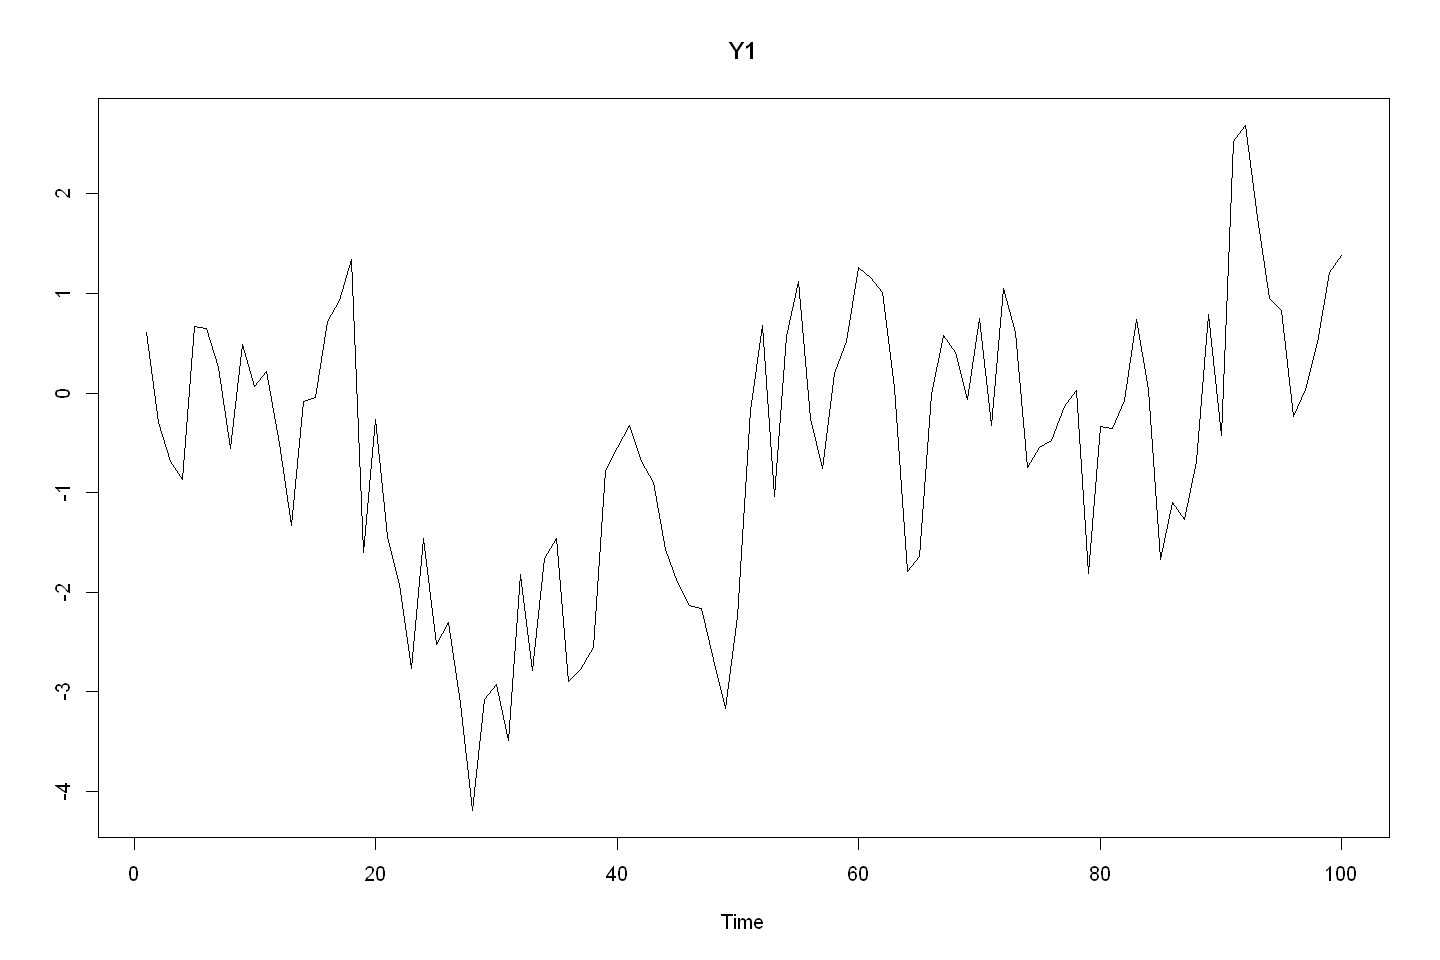

In [13]:
plot.ts(y1, ylab = NA, main = 'Y1')


We can't say much based on the plot. What are the properties of this time series? Is it stationary? 
How about autocorrelations?


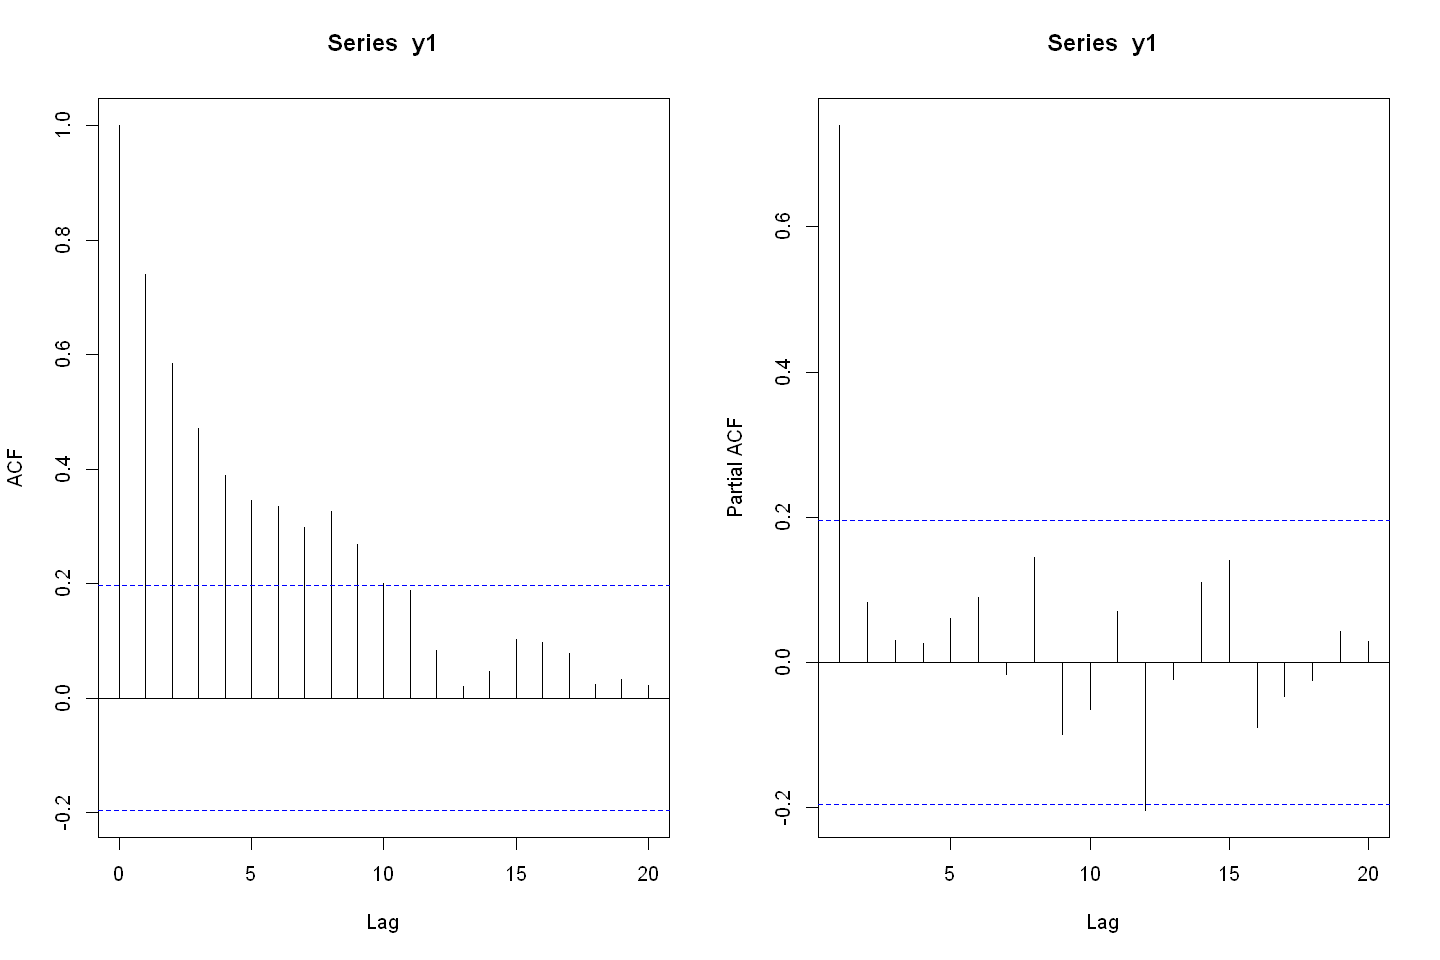

In [14]:
par(mfrow = c(1, 2))
acf(y1)
pacf(y1)

## -> we suspect it is an AR proces of order 1 - AR(1)

We would not rule out stationarity based on ACF and PACF. Conduct a formal test for stationarity. 

In [16]:
library('tseries')
adf.test(y1, k = 1)

Warning message:
"package 'tseries' was built under R version 3.6.3"

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



	Augmented Dickey-Fuller Test

data:  y1
Dickey-Fuller = -3.4193, Lag order = 1, p-value = 0.05527
alternative hypothesis: stationary


## not very clear so we would need to test further but it is stationary at the 10% s. level...

We would reject non-stationarity at 10% level. If we believe time series is stationary, we can the start the process of estimating the order of ARMA(p, q) process.

Pacf shows a very significant dependence at first lag, therefore we start estimation with AR(1) process.

In [34]:
#install.packages("remotes")
remotes::install_github("robjhyndman/forecast")

jsonlite     (1.6        -> 1.8.8     ) [CRAN]
curl         (3.3        -> 5.2.1     ) [CRAN]
TTR          (0.23-4     -> 0.24.4    ) [CRAN]
zoo          (1.8-5      -> 1.8-12    ) [CRAN]
xts          (0.11-2     -> 0.13.2    ) [CRAN]
rlang        (0.3.4      -> 1.1.3     ) [CRAN]
lifecycle    (NA         -> 1.0.4     ) [CRAN]
glue         (1.3.1      -> 1.7.0     ) [CRAN]
cli          (1.1.0      -> 3.6.2     ) [CRAN]
utf8         (1.1.4      -> 1.2.4     ) [CRAN]
vctrs        (NA         -> 0.6.5     ) [CRAN]
pillar       (NA         -> 1.9.0     ) [CRAN]
magrittr     (1.5        -> 2.0.3     ) [CRAN]
fansi        (0.4.0      -> 1.0.6     ) [CRAN]
colorspace   (1.4-1      -> 2.1-0     ) [CRAN]
farver       (NA         -> 2.1.1     ) [CRAN]
Rcpp         (1.0.6      -> 1.0.12    ) [CRAN]
tibble       (NA         -> 3.2.1     ) [CRAN]
scales       (NA         -> 1.3.0     ) [CRAN]
isoband      (NA         -> 0.2.7     ) [CRAN]
gtable       (NA         -> 0.3.4     ) [CRAN]
RcppArmad... 

Installing 27 packages: jsonlite, curl, TTR, zoo, xts, rlang, lifecycle, glue, cli, utf8, vctrs, pillar, magrittr, fansi, colorspace, farver, Rcpp, tibble, scales, isoband, gtable, RcppArmadillo, urca, tseries, lmtest, ggplot2, fracdiff
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'jsonlite' 'curl' 'TTR' 'zoo' 'xts'
  'rlang' 'glue' 'cli' 'utf8' 'vctrs' 'magrittr' 'fansi' 'colorspace'
  'farver' 'Rcpp' 'tibble' 'scales' 'isoband' 'RcppArmadillo' 'urca'
  'tseries' 'lmtest' 'fracdiff'
installing the source packages 'jsonlite', 'curl', 'TTR', 'zoo', 'xts', 'rlang', 'lifecycle', 'glue', 'cli', 'utf8', 'vctrs', 'pillar', 'magrittr', 'fansi', 'colorspace', 'farver', 'Rcpp', 'tibble', 'scales', 'isoband', 'gtable', 'RcppArmadillo', 'urca', 'tseries', 'lmtest

ERROR: Error: Failed to install 'forecast' from GitHub:
  'num_ansi_colors' is not an exported object from 'namespace:cli'


In [33]:

library(forecast)
y1_ar1 <- Arima(y1, order = c(1, 0, 0))
summary(y1_ar1)

ERROR: Error in library(forecast): there is no package called 'forecast'


This summary itself is not very informative. We can see, that the intercept, although large in magnitude has a huge standard error. Examine ACF and PACF of the residuals. If the model we chose is a good fit, there should not be much dependence left.

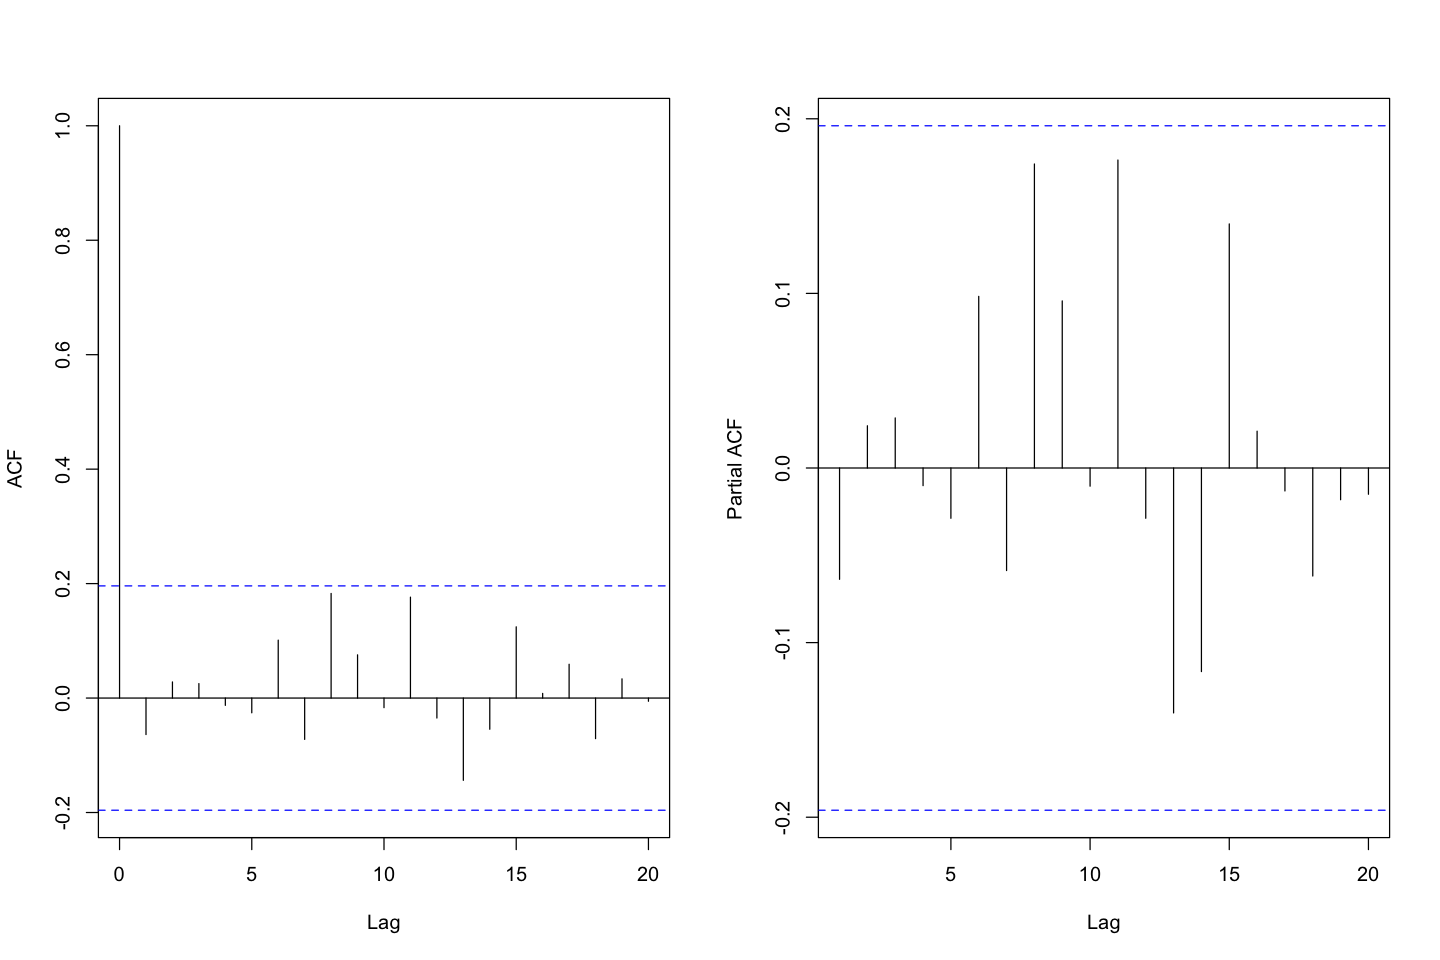

In [31]:
par(mfrow = c(1, 2))
acf(y1_ar1$residuals, main = NA)
pacf(y1_ar1$residuals, main = NA)

In addition to the plots, we should test for joint siginificance of residuals' autocorrelation. As we already know, this can be done using the Ljung-Box Q test. Let's test for joint significance up to 4th, 8th and 12th lag respectively.

In [32]:
Box.test(y1_ar1$residuals, type = "Ljung-Box", lag = 4)
Box.test(y1_ar1$residuals, type = "Ljung-Box", lag = 8)
Box.test(y1_ar1$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  y1_ar1$residuals
X-squared = 0.58525, df = 4, p-value = 0.9647



	Box-Ljung test

data:  y1_ar1$residuals
X-squared = 6.042, df = 8, p-value = 0.6425



	Box-Ljung test

data:  y1_ar1$residuals
X-squared = 10.415, df = 12, p-value = 0.5796


Recall that the null hypothesis is joint insignificance of autocorrelation coefficients 1 to m. We reject joint insignificance for neither 4, 8 or 12 lags.

Next, try if ARMA(1, 1) would not be a better fit.

Series: y1 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1     mean
      0.8053  -0.1220  -0.4604
s.e.  0.0797   0.1367   0.3991

sigma^2 estimated as 0.8598:  log likelihood=-133.24
AIC=274.49   AICc=274.91   BIC=284.91

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.01292174 0.9132343 0.7425363 -86.57732 255.9265 0.9679344
                    ACF1
Training set 0.002866045


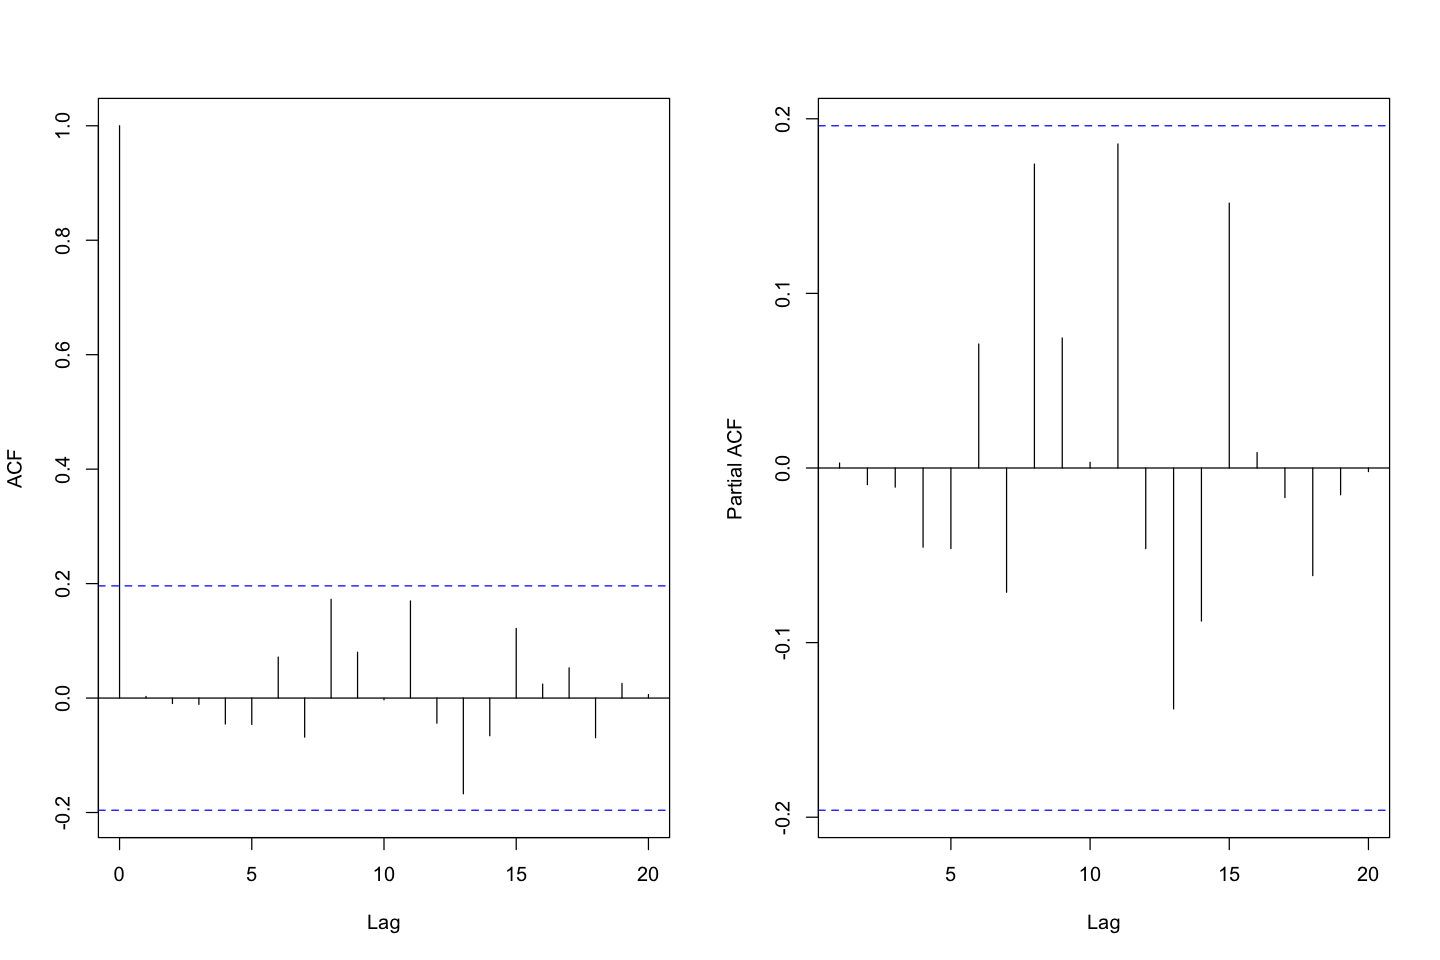

In [17]:
y1_arma11 <- Arima(y1, order = c(1, 0, 1))
summary(y1_arma11)

par(mfrow = c(1, 2))
acf(y1_arma11$residuals, main = NA)
pacf(y1_arma11$residuals, main = NA)

In [18]:
Box.test(y1_arma11$residuals, type = "Ljung-Box", lag = 4)
Box.test(y1_arma11$residuals, type = "Ljung-Box", lag = 8)
Box.test(y1_arma11$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  y1_arma11$residuals
X-squared = 0.2413, df = 4, p-value = 0.9933



	Box-Ljung test

data:  y1_arma11$residuals
X-squared = 4.8362, df = 8, p-value = 0.7749



	Box-Ljung test

data:  y1_arma11$residuals
X-squared = 9.077, df = 12, p-value = 0.6963


The dependence in residuals seems to be removed in this case either. When we need to decide which of the multiple suitable models is the "best" for our data, we can compare the information criteria, and choose the model where they are minimalized. Arima function directly reports Bayesian Information Criterion (BIC), Akaike Information Criterion (AIC), and AIC corrected for small samples (AICc). Let's compare AIC and BIC of the models we estimated. 

In [19]:
models <- 2
criteria <- matrix(ncol = 2, nrow = models)
colnames(criteria) <- c('AIC', 'BIC')
rownames(criteria) <- c('AR(1)', 'ARMA(1,1)')

criteria[1, 1] <- y1_ar1$aic
criteria[1, 2] <- y1_ar1$bic
criteria[2, 1] <- y1_arma11$aic
criteria[2, 2] <- y1_arma11$bic

criteria

AIC      BIC     
AR(1)     273.2787 281.0942
ARMA(1,1) 274.4889 284.9096

Both criteria are lower for the AR(1) model. The data are in fact a realization of following AR(1) process

$$ y_t = 0.7 y_{t-1} + \epsilon_t.$$

#### Exercise:

Try applying the Box-Jenkins on the Y2 series.

Hint:

1) Identification - look at the plot of the series, its ACF and PACF. Based on the ACF try to get an idea which could be the underlying process. Test for stationarity.

2) Estimation - estimate the parameters of your candidate processes.

3) Diagnostics - Check the dependencies in the residuals. If you have more suitable candidate models, use the information criteria. If you still have more suitable models, prefer parsimony.

### Y2

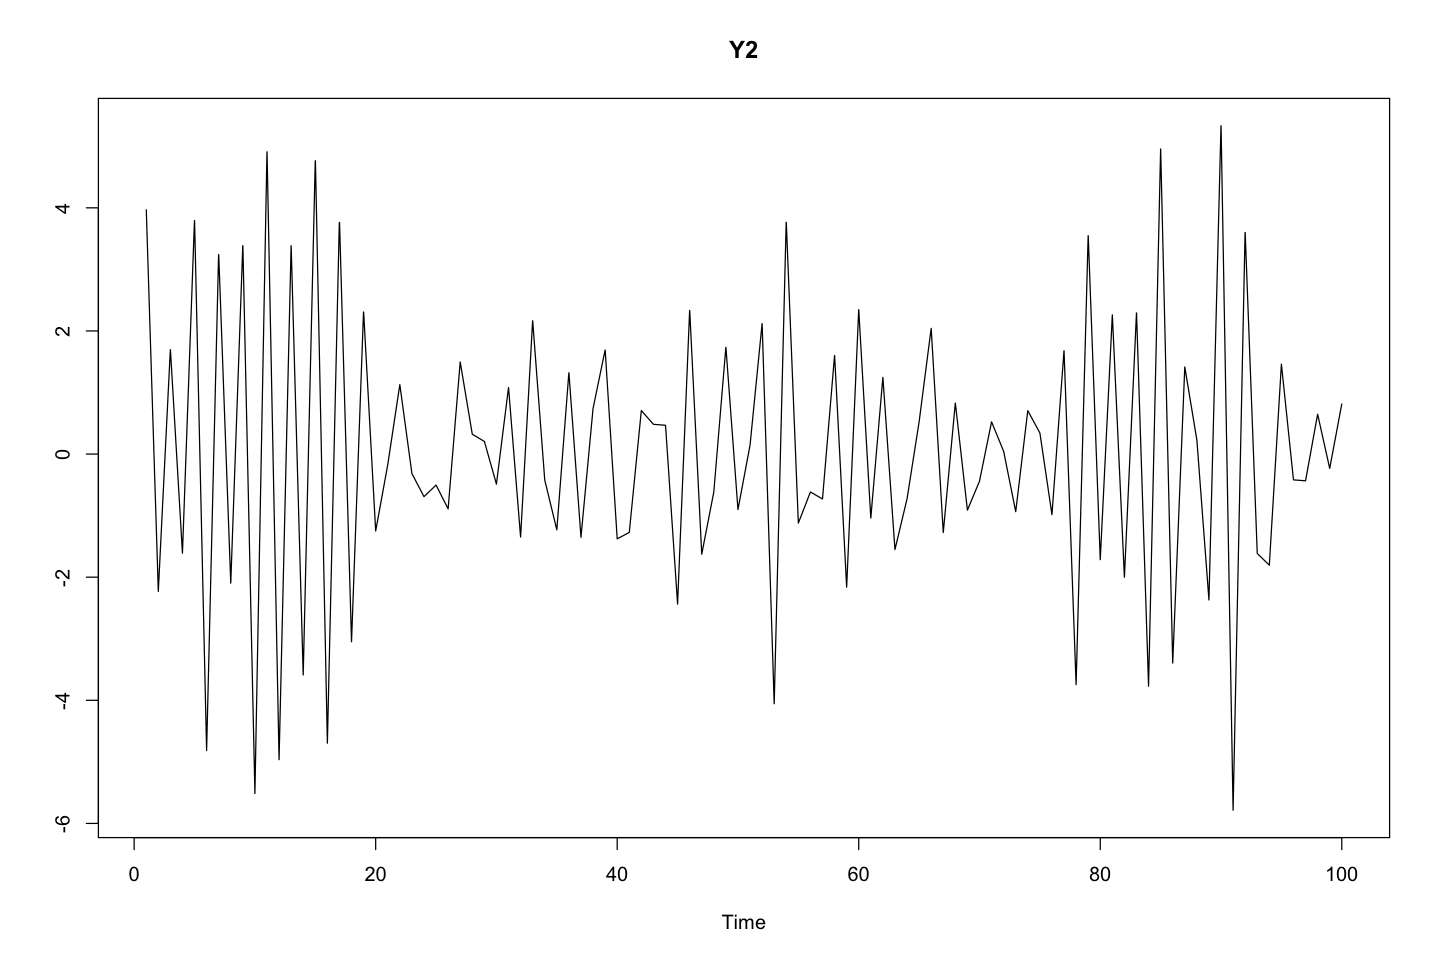

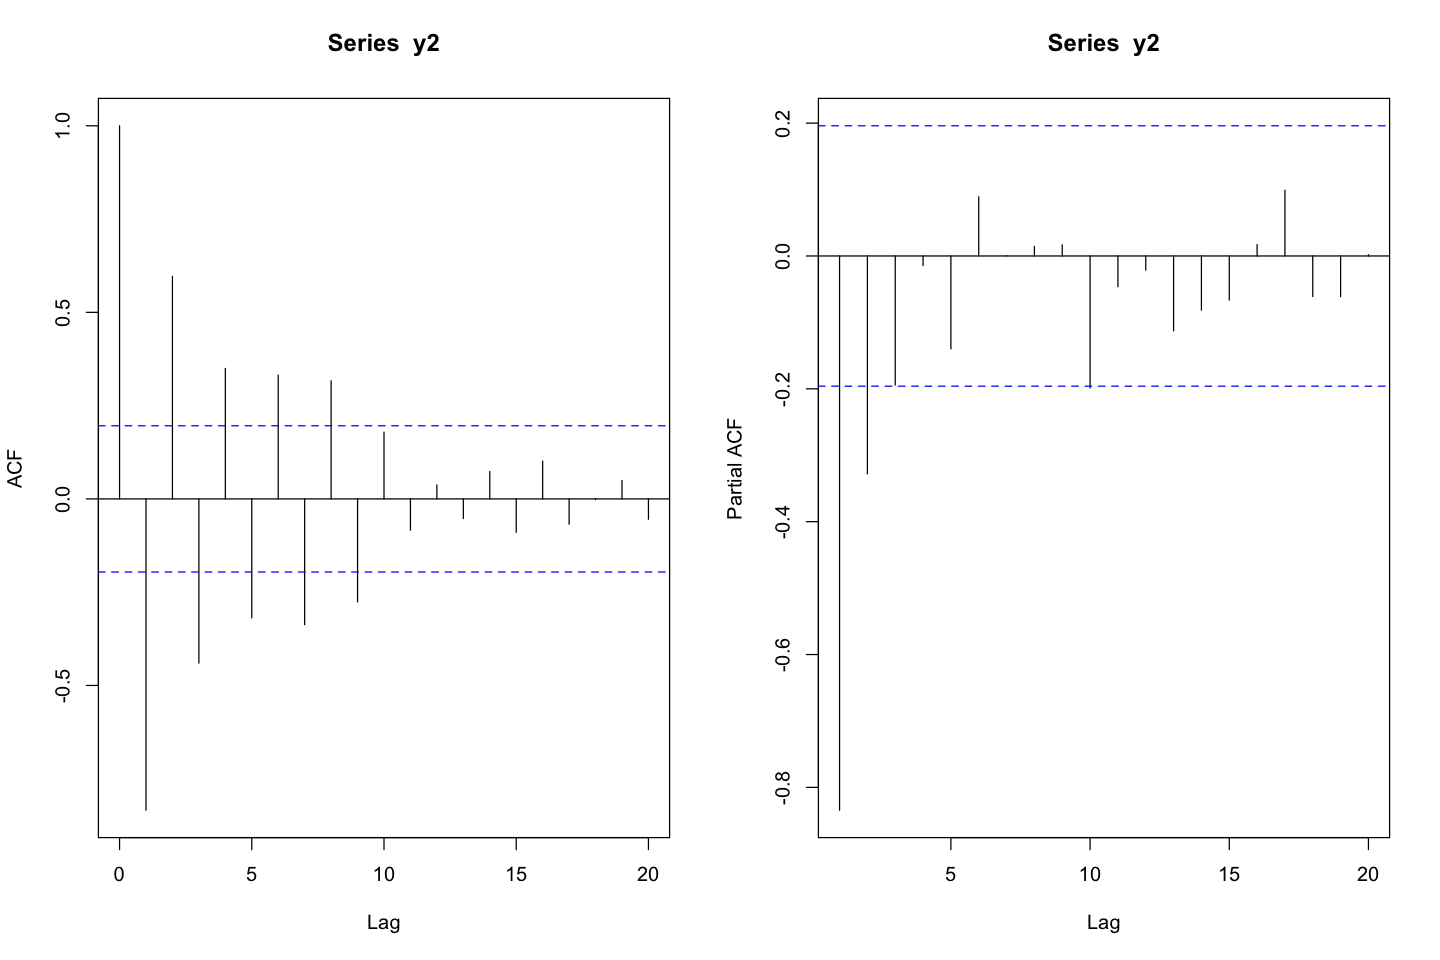

In [20]:
plot.ts(y2, ylab = NA, main = 'Y2')

par(mfrow = c(1, 2))
acf(y2)
pacf(y2)

Series: y2 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
          ma1     ma2     mean
      -1.2605  0.5505  -0.0049
s.e.   0.0775  0.0889   0.0358

sigma^2 estimated as 1.533:  log likelihood=-162.63
AIC=333.27   AICc=333.69   BIC=343.69

Training set error measures:
                     ME     RMSE       MAE      MPE     MAPE      MASE     ACF1
Training set 0.02199191 1.219426 0.9842958 39.01331 94.93373 0.2788473 -0.14099



	Box-Ljung test

data:  y2_ma2$residuals
X-squared = 20.085, df = 4, p-value = 0.0004805



	Box-Ljung test

data:  y2_ma2$residuals
X-squared = 31.126, df = 8, p-value = 0.0001334


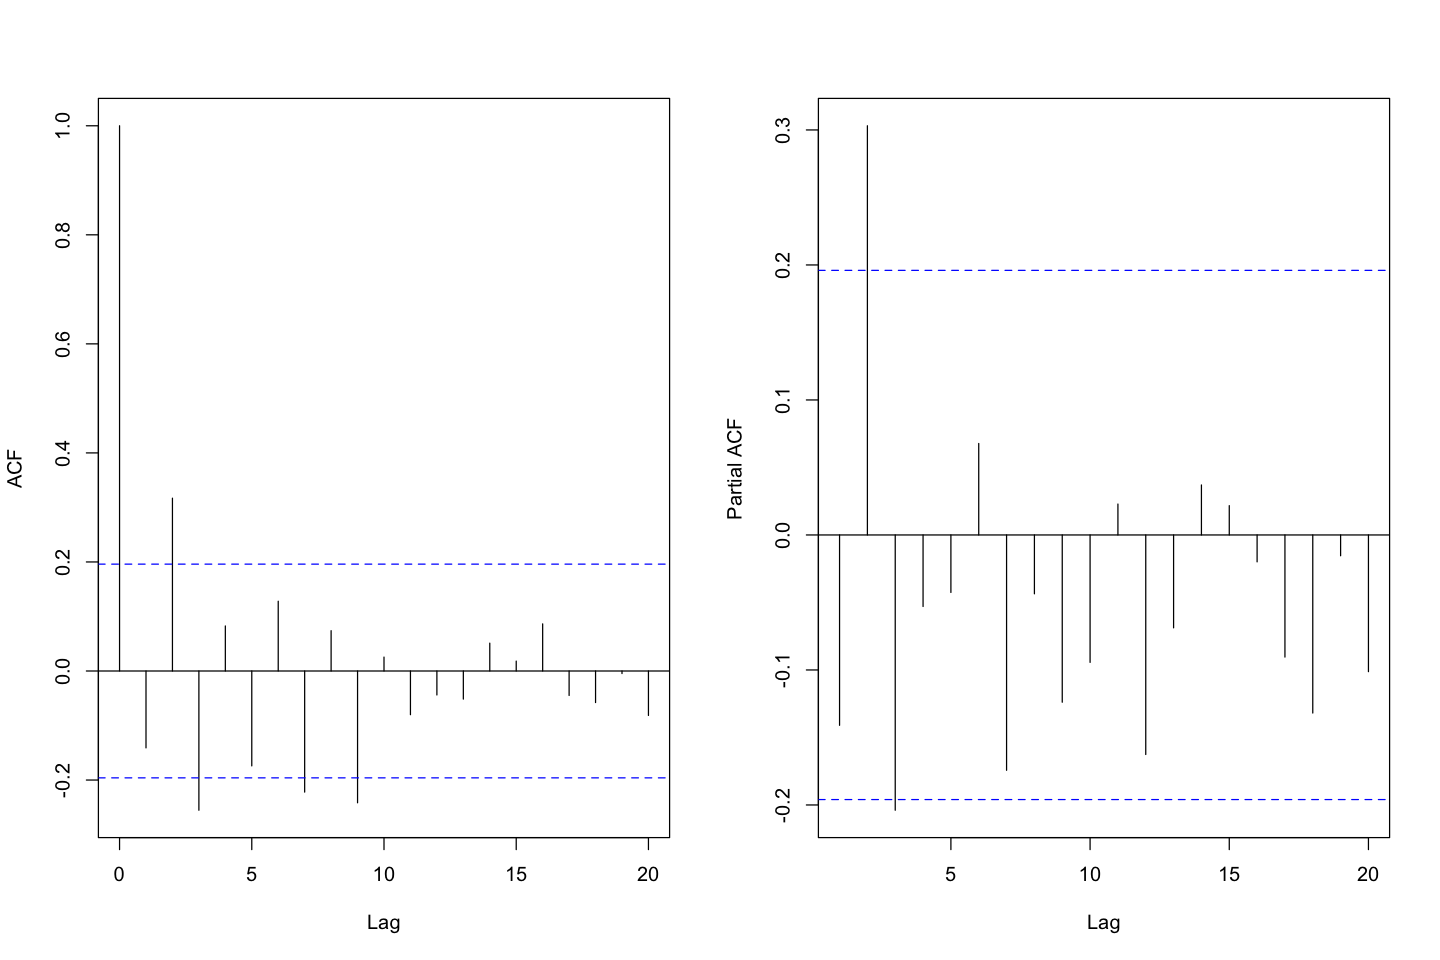

In [21]:
y2_ma2 <- Arima(y2, order = c(0, 0, 2))
summary(y2_ma2)

par(mfrow = c(1, 2))
acf(y2_ma2$residuals, main = NA)
pacf(y2_ma2$residuals, main = NA)
Box.test(y2_ma2$residuals, type = "Ljung-Box", lag = 4)
Box.test(y2_ma2$residuals, type = "Ljung-Box", lag = 8)

## -> MA(2) does not work due to the low p-value of the tests

Series: y2 
ARIMA(0,0,8) with non-zero mean 

Coefficients:
          ma1     ma2      ma3     ma4      ma5     ma6      ma7     ma8
      -1.4731  1.0426  -0.7012  0.3768  -0.2025  0.2152  -0.2709  0.0132
s.e.   0.1045  0.1862   0.2287  0.2334   0.1762  0.1916   0.1909  0.1047
         mean
      -0.0024
s.e.   0.0050

sigma^2 estimated as 1.184:  log likelihood=-148.19
AIC=316.37   AICc=318.84   BIC=342.42

Training set error measures:
                        ME     RMSE       MAE     MPE     MAPE      MASE
Training set -0.0003365163 1.037918 0.8173603 37.8365 82.29271 0.2315551
                   ACF1
Training set 0.02495721



	Box-Ljung test

data:  y2_ma8$residuals
X-squared = 0.29994, df = 4, p-value = 0.9898



	Box-Ljung test

data:  y2_ma8$residuals
X-squared = 2.9569, df = 8, p-value = 0.937


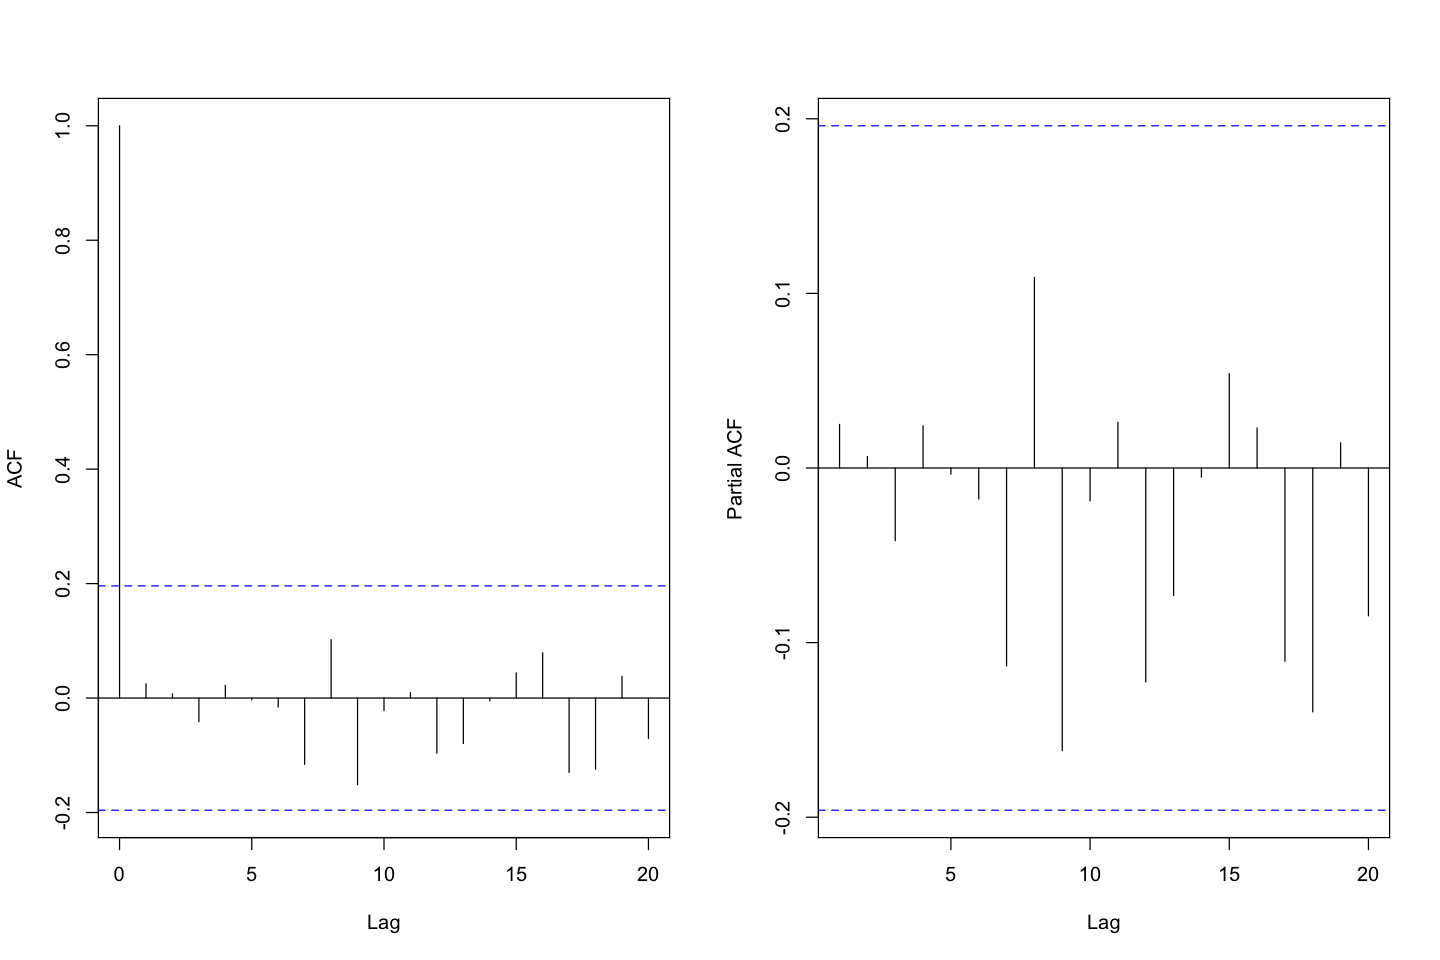

In [22]:
y2_ma8 <- Arima(y2, order = c(0, 0, 8))
summary(y2_ma8)

par(mfrow = c(1, 2))
acf(y2_ma8$residuals, main = NA)
pacf(y2_ma8$residuals, main = NA)
Box.test(y2_ma8$residuals, type = "Ljung-Box", lag = 4)
Box.test(y2_ma8$residuals, type = "Ljung-Box", lag = 8)

## -> MA(8) works well thanks to the high p-values of the tests
## -> however (parsimony or so) it is quite complex model and we want as simple as possible model...
## -> we also suspected AR(2) so we try that since it is simpler...

Series: y2 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
          ar1      ar2     mean
      -1.1776  -0.3842  -0.0030
s.e.   0.0928   0.0929   0.0461

sigma^2 estimated as 1.414:  log likelihood=-158.5
AIC=325.01   AICc=325.43   BIC=335.43

Training set error measures:
                     ME     RMSE       MAE     MPE    MAPE      MASE
Training set 0.01915594 1.171256 0.9550313 50.9318 104.298 0.2705568
                    ACF1
Training set -0.07712068



	Box-Ljung test

data:  y2_ar2$residuals
X-squared = 5.6723, df = 4, p-value = 0.225



	Box-Ljung test

data:  y2_ar2$residuals
X-squared = 9.2046, df = 8, p-value = 0.3253


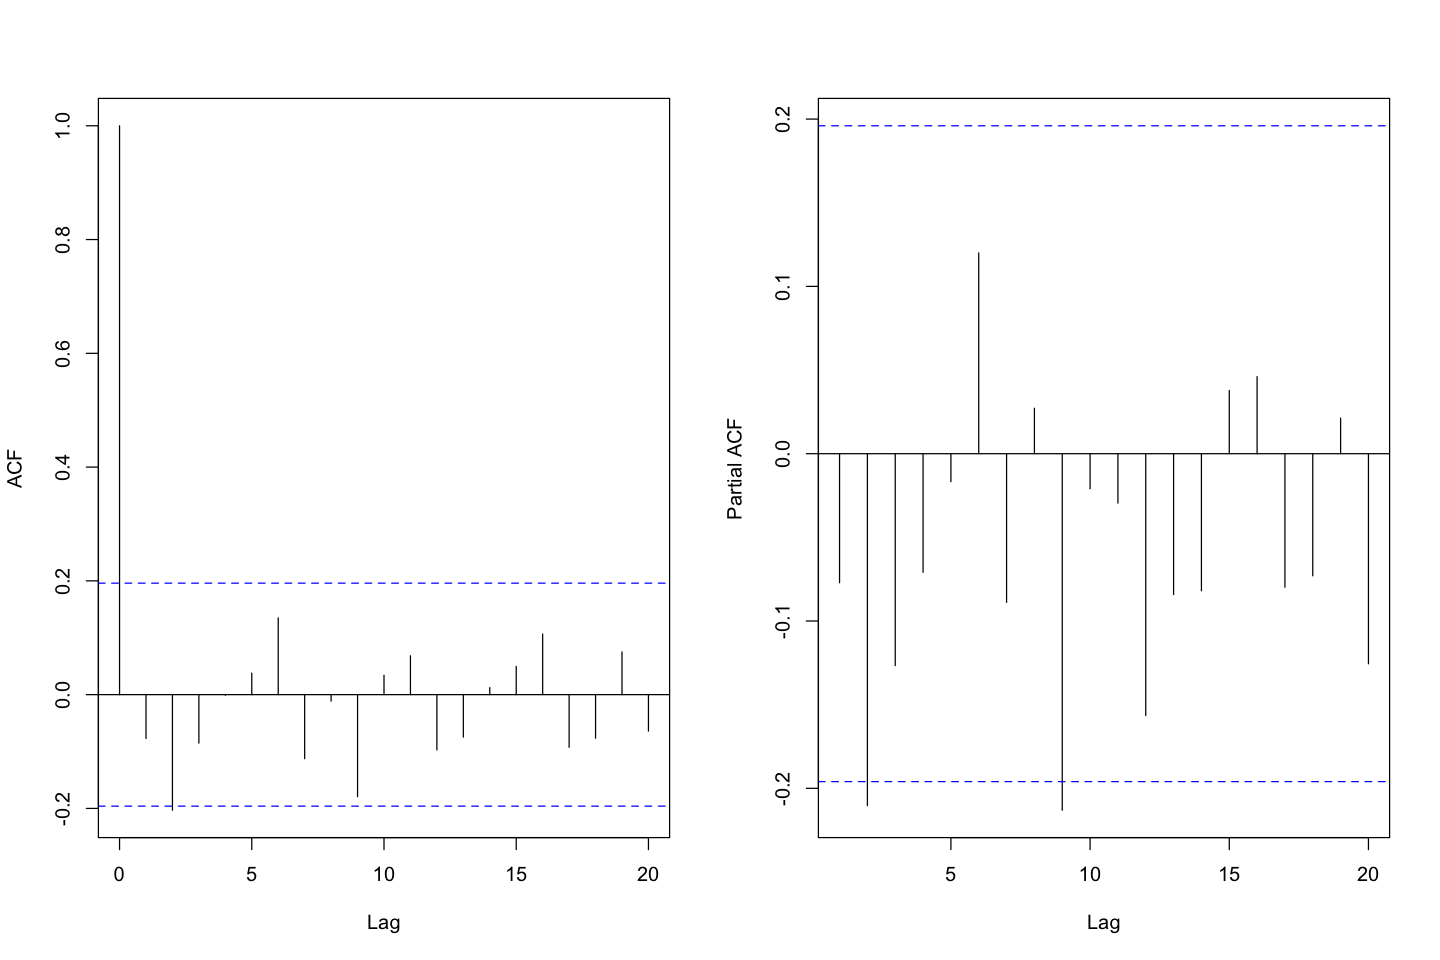

In [23]:
y2_ar2 <- Arima(y2, order = c(2, 0, 0))
summary(y2_ar2)

par(mfrow = c(1, 2))
acf(y2_ar2$residuals, main = NA)
pacf(y2_ar2$residuals, main = NA)
Box.test(y2_ar2$residuals, type = "Ljung-Box", lag = 4)
Box.test(y2_ar2$residuals, type = "Ljung-Box", lag = 8)

Series: y2 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
          ar1      ma1     mean
      -0.7077  -0.6701  -0.0085
s.e.   0.0785   0.0955   0.0219

sigma^2 estimated as 1.263:  log likelihood=-153.08
AIC=314.16   AICc=314.58   BIC=324.58

Training set error measures:
                     ME     RMSE       MAE      MPE     MAPE      MASE
Training set 0.03261995 1.106839 0.8852483 40.53003 91.61713 0.2507875
                   ACF1
Training set 0.05230744



	Box-Ljung test

data:  y2_arma2$residuals
X-squared = 0.37137, df = 4, p-value = 0.9848



	Box-Ljung test

data:  y2_arma2$residuals
X-squared = 3.2147, df = 8, p-value = 0.9202


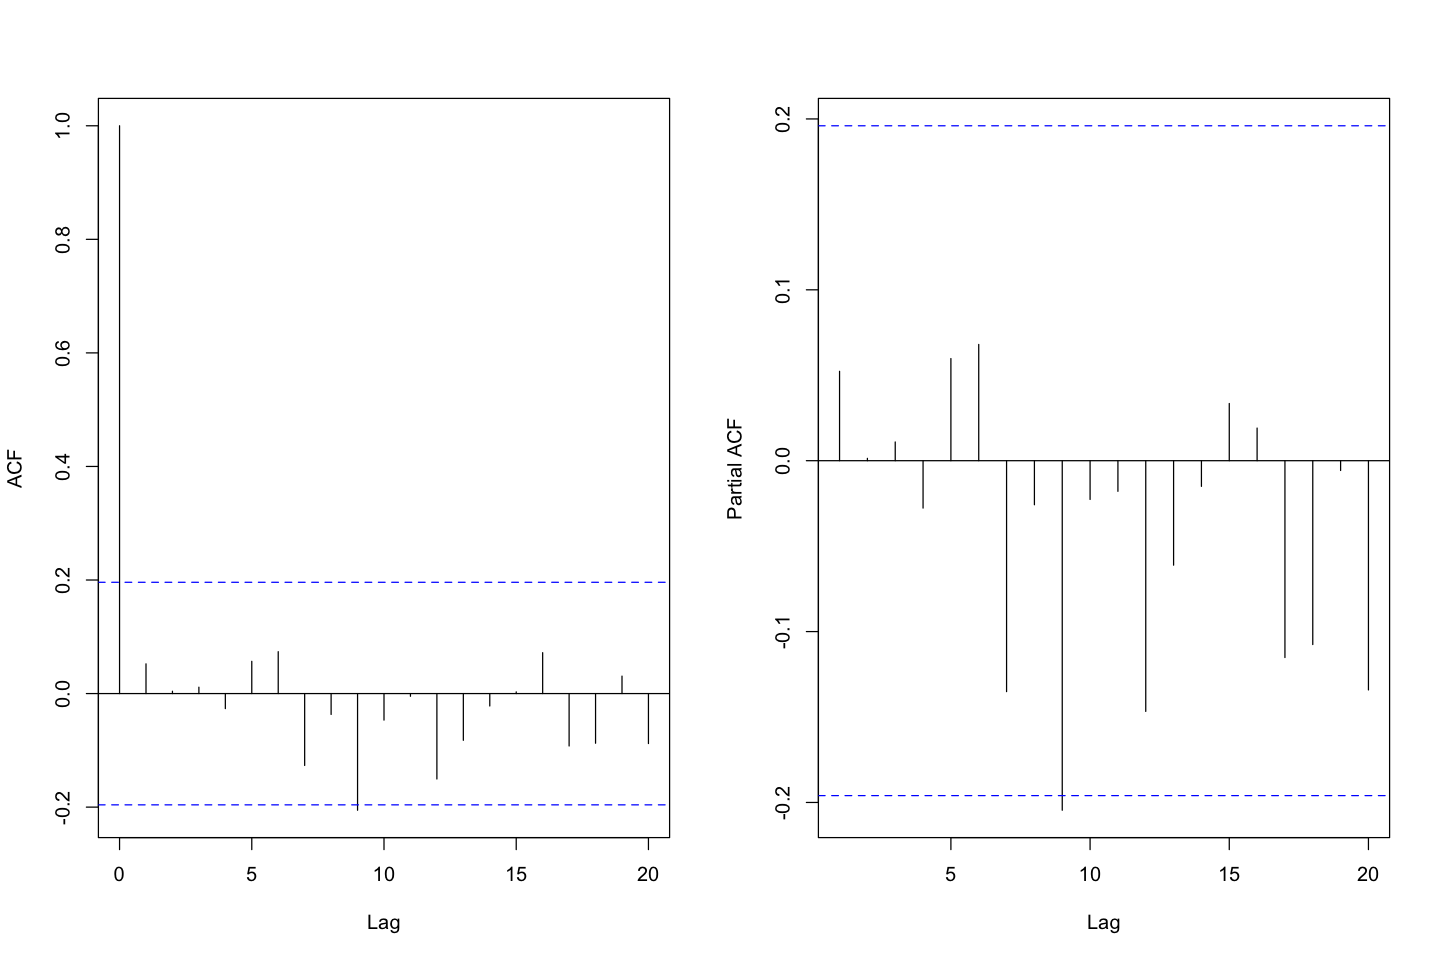

In [25]:
y2_arma2 <- Arima(y2, order = c(1, 0, 1))
summary(y2_arma2)

par(mfrow = c(1, 2))
acf(y2_arma2$residuals, main = NA)
pacf(y2_arma2$residuals, main = NA)
Box.test(y2_arma2$residuals, type = "Ljung-Box", lag = 4)
Box.test(y2_arma2$residuals, type = "Ljung-Box", lag = 8)

In [26]:
models <- 3
criteria <- matrix(ncol = 2, nrow = models)
colnames(criteria) <- c('AIC', 'BIC')
rownames(criteria) <- c('AR(2)', 'ARMA(1,1)', 'MA(2)')

criteria[1, 1] <- y2_ar2$aic
criteria[1, 2] <- y2_ar2$bic
criteria[2, 1] <- y2_arma2$aic
criteria[2, 2] <- y2_arma2$bic
criteria[3, 1] <- y2_ma2$aic
criteria[3, 2] <- y2_ma2$bic

criteria

AIC      BIC     
AR(2)     325.0087 335.4294
ARMA(1,1) 314.1568 324.5775
MA(2)     333.2675 343.6882

## -> we compare the models based on the lowest information criteria -> we choose ARMA(1,1)

### Y3

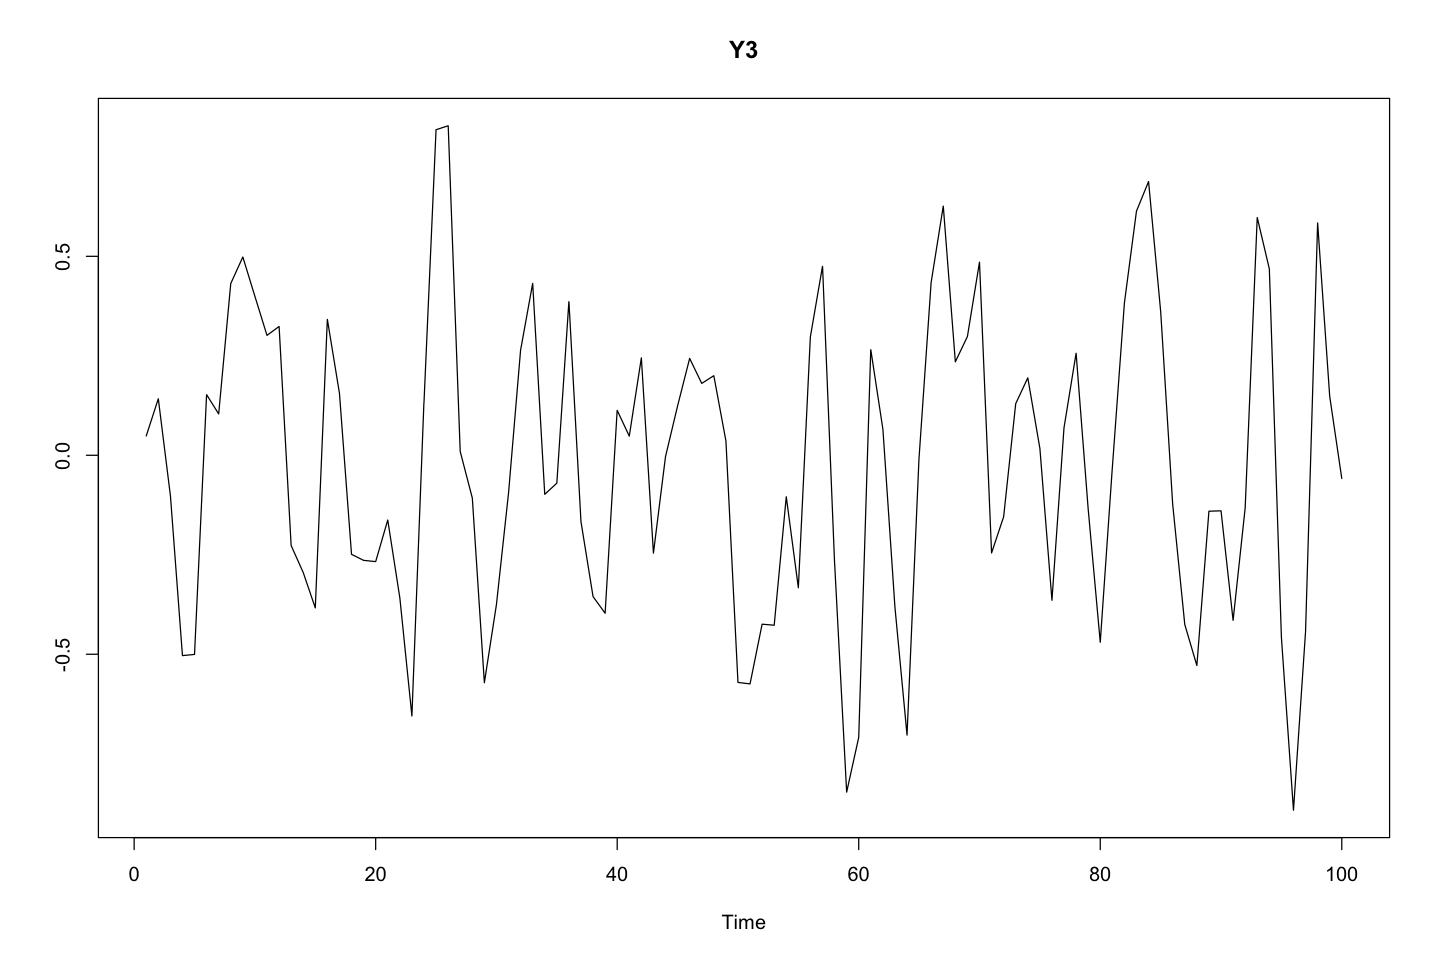

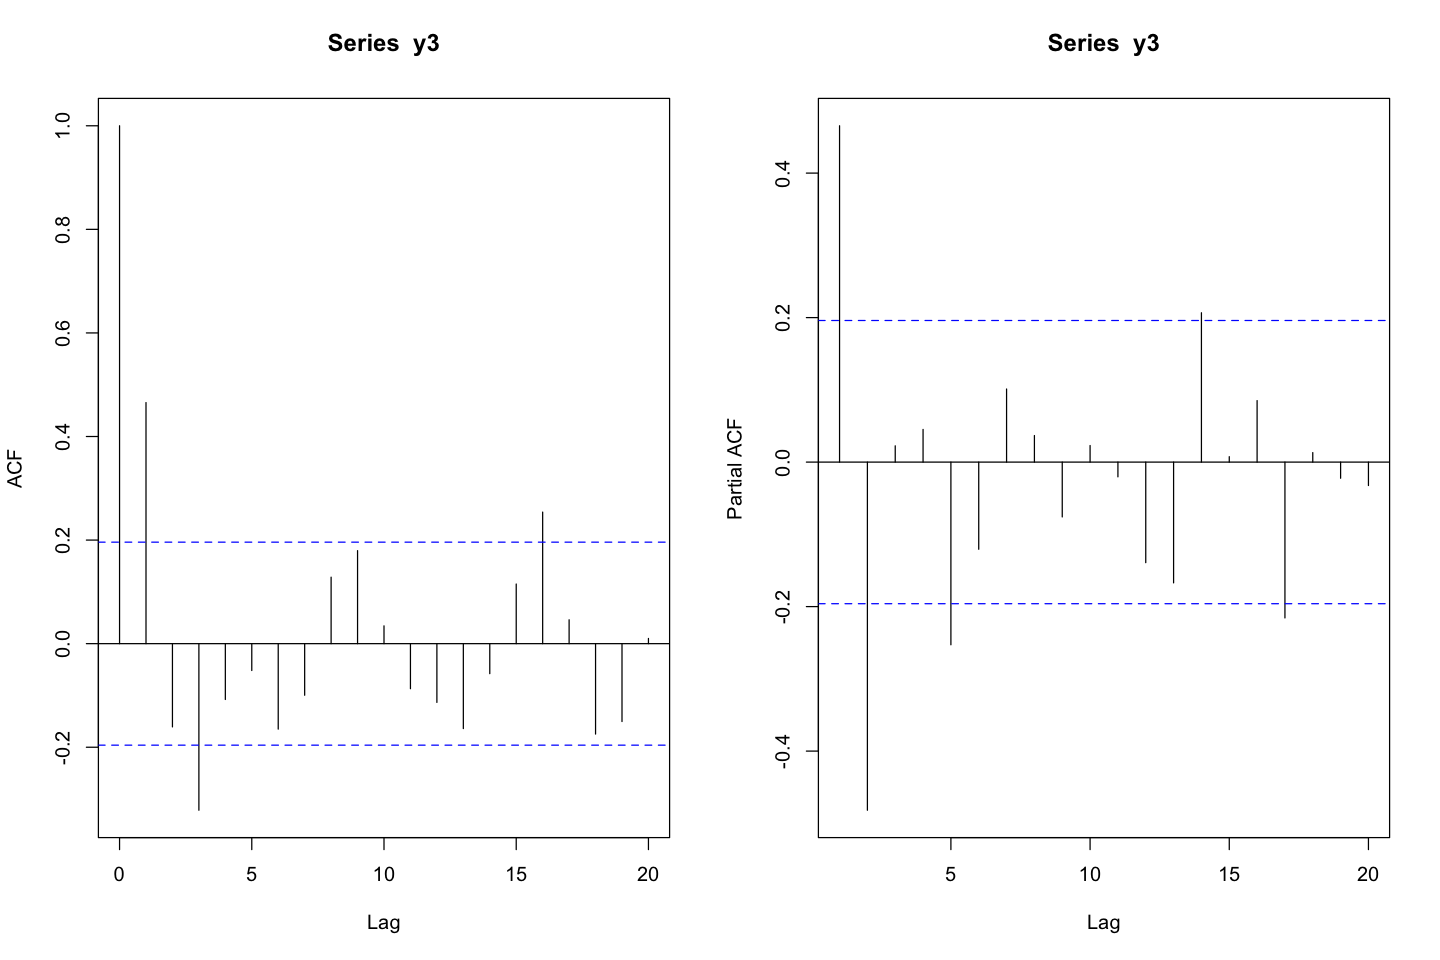

In [27]:
plot.ts(y3, ylab = NA, main = 'Y3')

par(mfrow = c(1, 2))
acf(y3)
pacf(y3)

Especially the first two lags of PACF are significant, but there are also lags of very high order that exceed the confidence band. We will estimate AR(2), and see what happens.

Series: y3 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     mean
      0.6842  -0.4748  -0.0250
s.e.  0.0872   0.0865   0.0373

sigma^2 estimated as 0.08902:  log likelihood=-19.8
AIC=47.6   AICc=48.02   BIC=58.02

Training set error measures:
                       ME     RMSE       MAE       MPE     MAPE      MASE
Training set 0.0004794574 0.293848 0.2550758 -137.7556 286.7097 0.8251151
                   ACF1
Training set 0.01457797


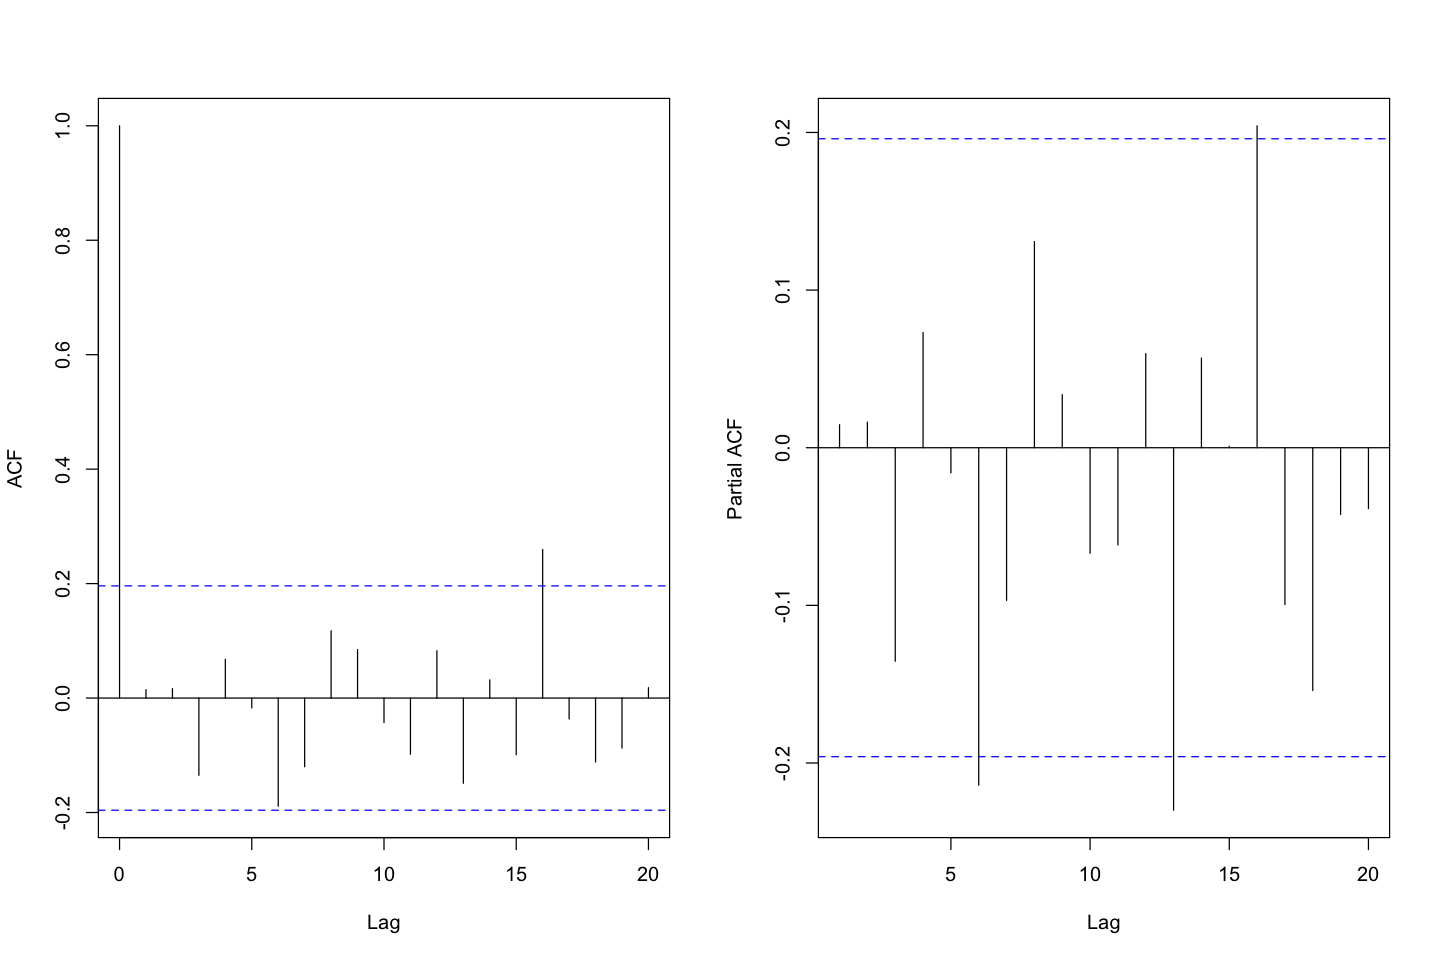

In [33]:
y3_ar2 <- Arima(y3, order = c(2, 0, 0))
summary (y3_ar2)

par(mfrow = c(1, 2))
acf(y3_ar2$residuals, main = NA)
pacf(y3_ar2$residuals, main = NA)

In [34]:
Box.test(y3_ar2$residuals, type = "Ljung-Box", lag = 1)
Box.test(y3_ar2$residuals, type = "Ljung-Box", lag = 8)
Box.test(y3_ar2$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  y3_ar2$residuals
X-squared = 0.021896, df = 1, p-value = 0.8824



	Box-Ljung test

data:  y3_ar2$residuals
X-squared = 9.4732, df = 8, p-value = 0.304



	Box-Ljung test

data:  y3_ar2$residuals
X-squared = 12.38, df = 12, p-value = 0.4157


According to the plot, there could be some week dependence at high lags of PACF. We could estimate AR(17), but that hardly makes sense.

Series: y3 
ARIMA(17,0,0) with non-zero mean 

Coefficients:
         ar1      ar2      ar3     ar4      ar5      ar6      ar7    ar8
      0.7164  -0.3917  -0.1108  0.0837  -0.0122  -0.2269  -0.0498  0.171
s.e.  0.0960   0.1183   0.1280  0.1258   0.1212   0.1235   0.1237  0.122
          ar9     ar10     ar11    ar12     ar13    ar14     ar15    ar16
      -0.0455  -0.0900  -0.0061  0.0531  -0.2896  0.2122  -0.1380  0.2729
s.e.   0.1259   0.1266   0.1259  0.1235   0.1236  0.1282   0.1317  0.1278
         ar17     mean
      -0.2640  -0.0238
s.e.   0.1051   0.0233

sigma^2 estimated as 0.0757:  log likelihood=-5.19
AIC=48.37   AICc=57.87   BIC=97.87

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE     MASE
Training set 0.002050977 0.2491506 0.2069897 -35.97154 146.0966 0.669567
                  ACF1
Training set 0.0213174


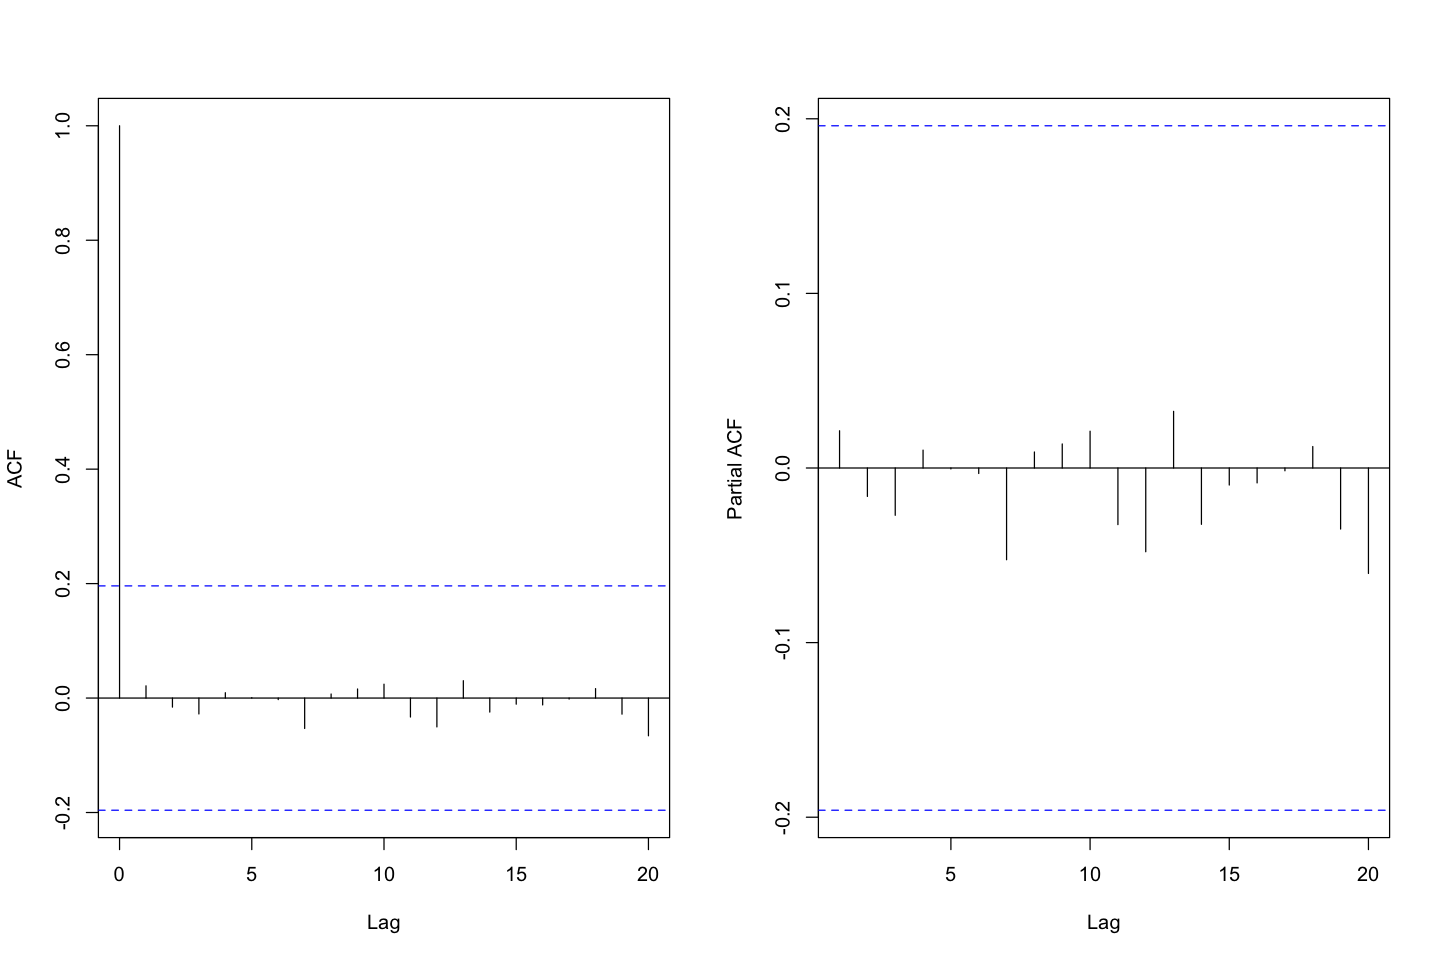

In [35]:
y3_ar17 <- Arima(y3, order = c(17, 0, 0))
summary (y3_ar17)

par(mfrow = c(1, 2))
acf(y3_ar17$residuals, main = NA)
pacf(y3_ar17$residuals, main = NA)

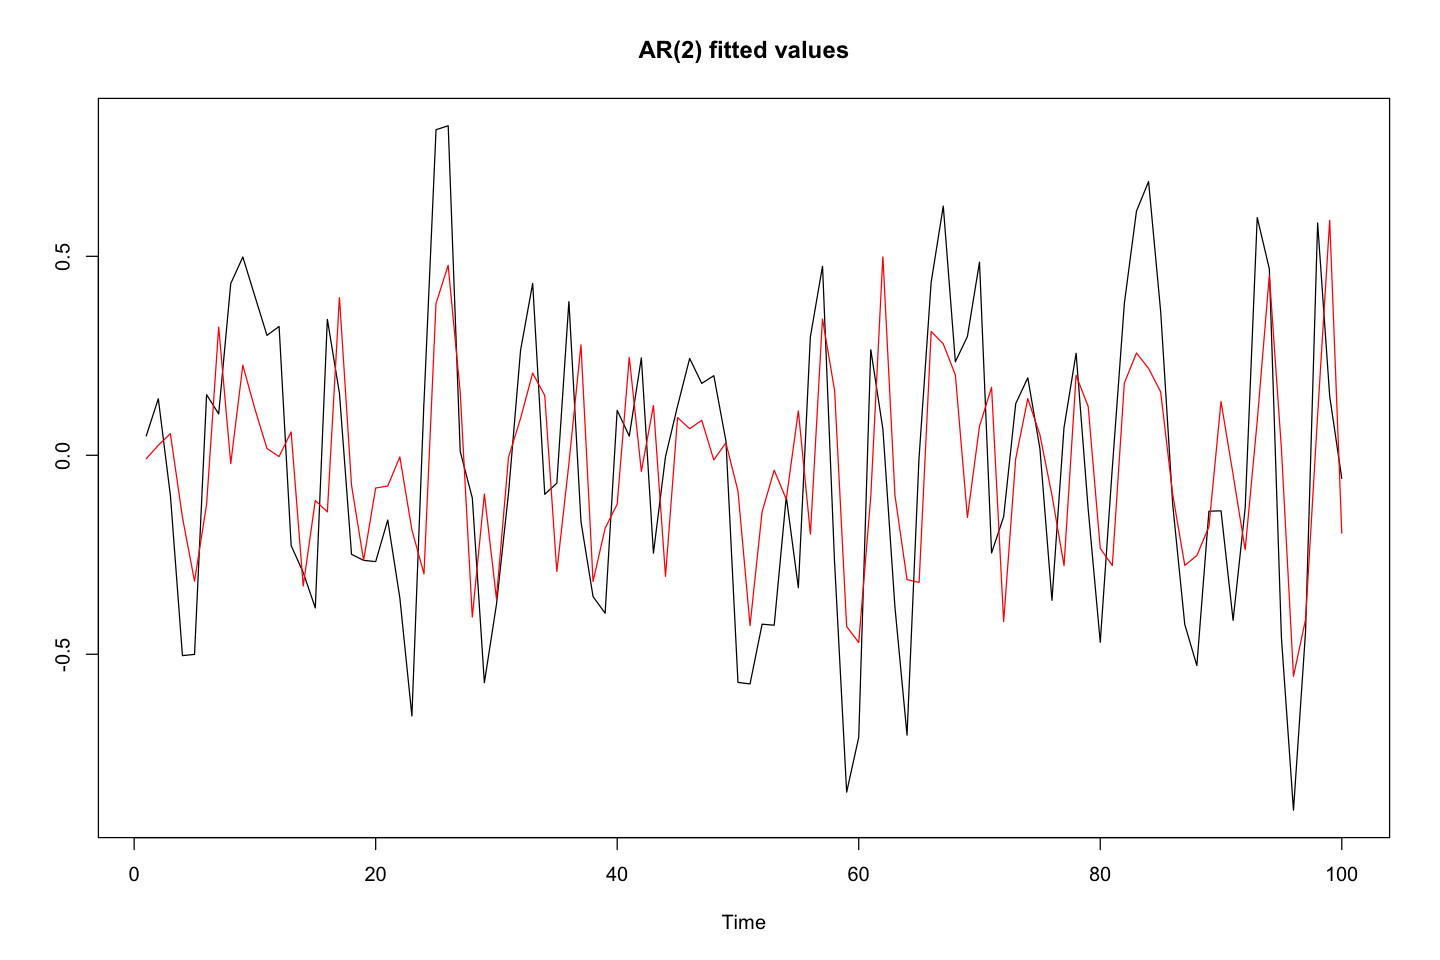

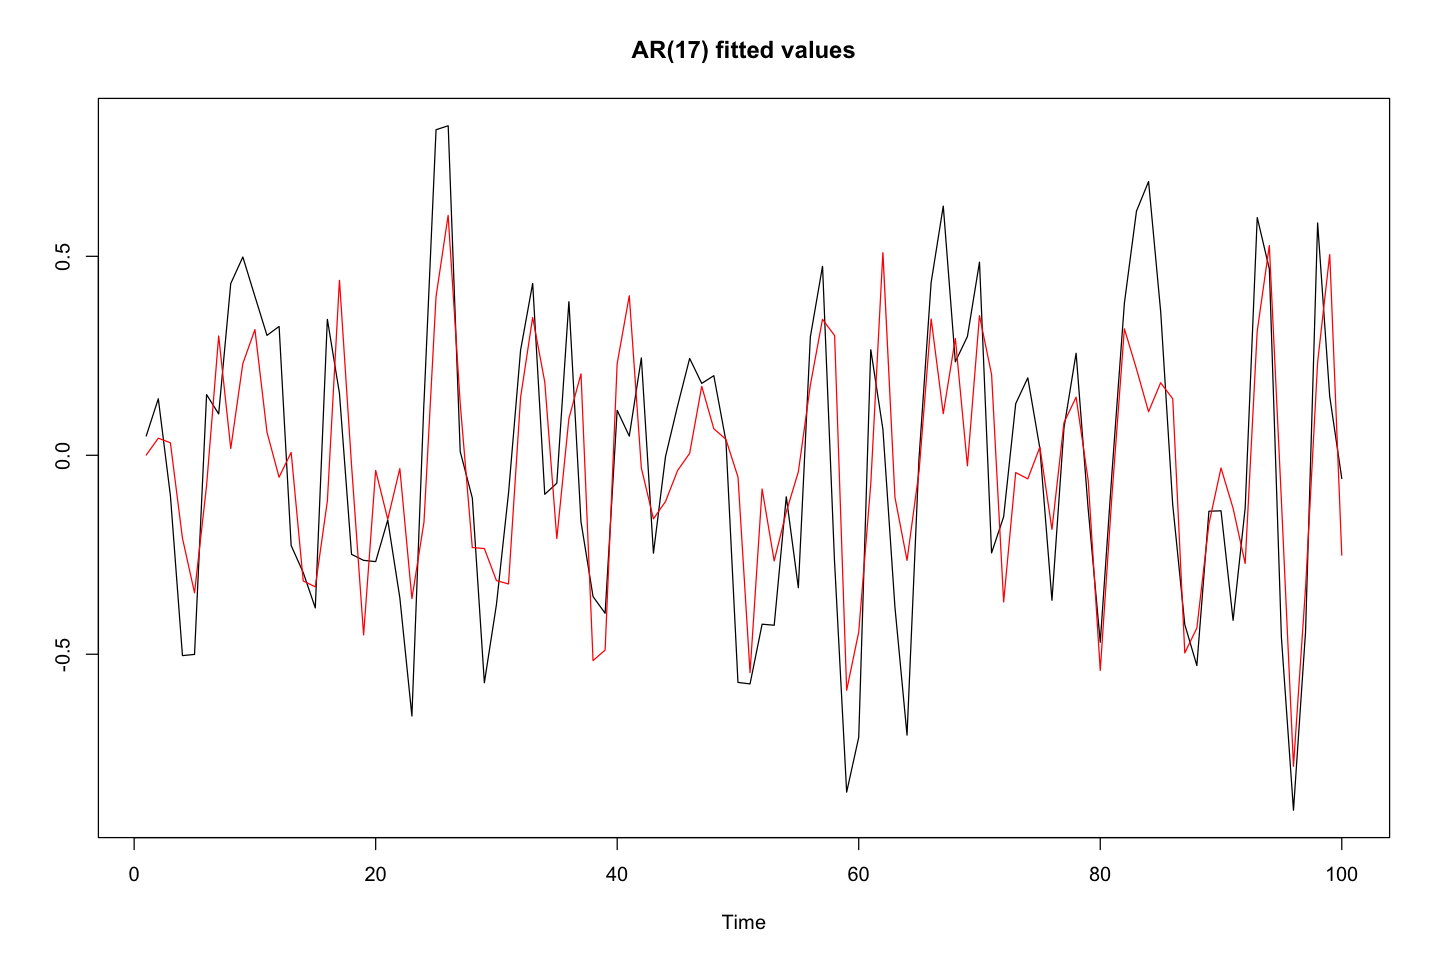

In [37]:
plot.ts(y3, ylab = NA, main = 'AR(2) fitted values')
lines(y3_ar2$fitted, col = 'red')

plot.ts(y3, ylab = NA, main = 'AR(17) fitted values')
lines(y3_ar17$fitted, col = 'red')

With AR(17) the ACF and PACF look better (possibly due to overfitting), however the model is hardly much better in terms of fit. Moreover, one should prefer model simplicity.

It could be the case that different parts of the sample can be characterized by different models. Subsample the data to two halves.

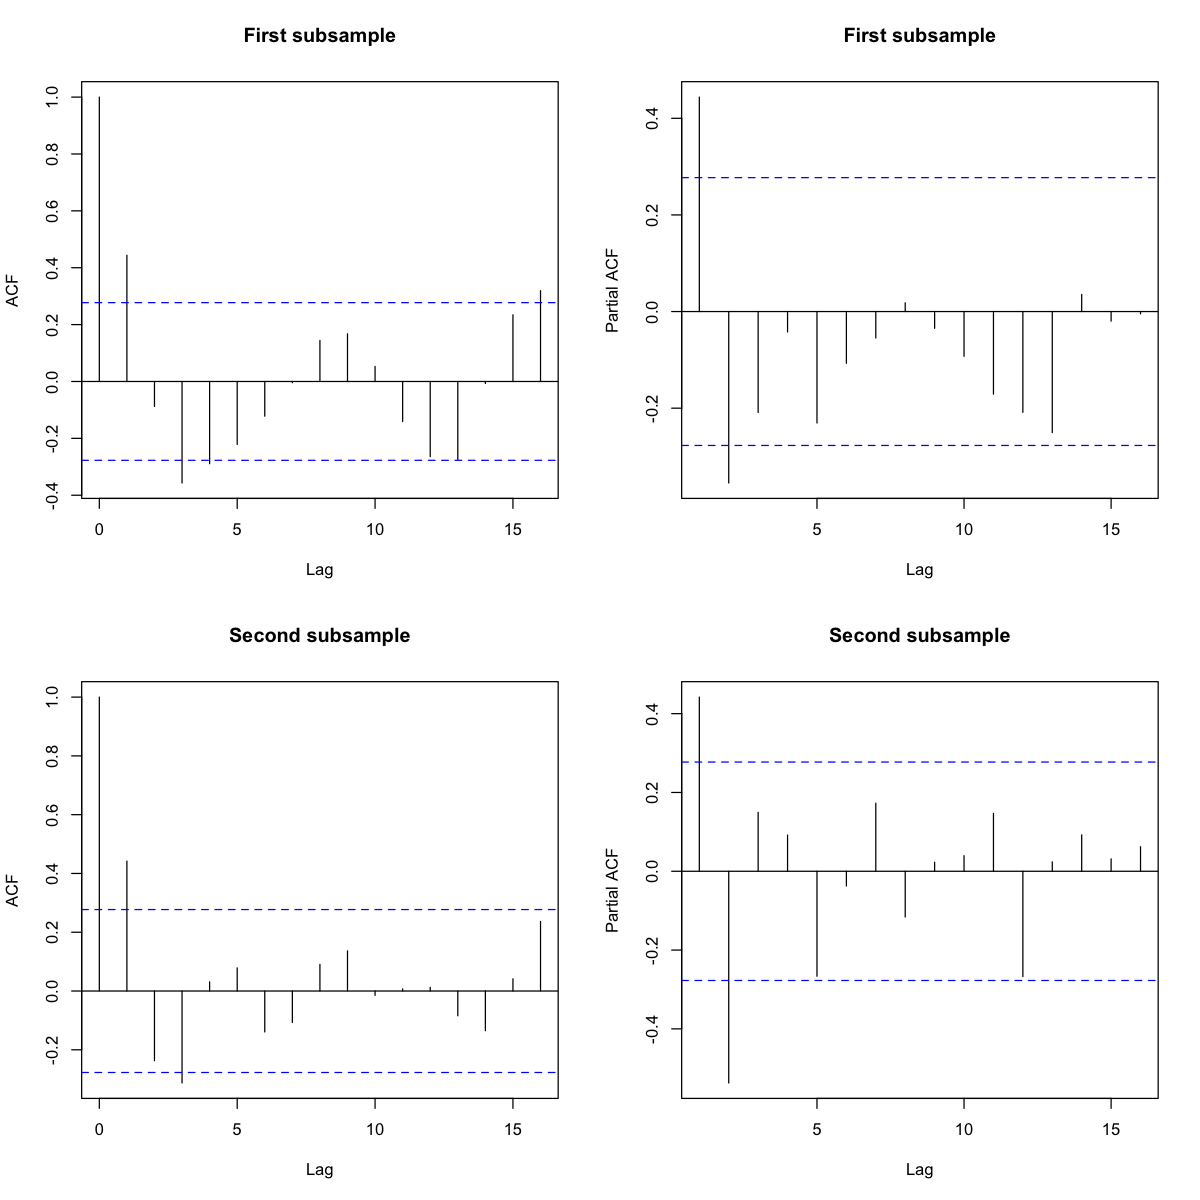

In [38]:
y3_01 <- y3[1:(length(y3) / 2)]
y3_02 <- y3[((length(y3) / 2) + 1):length(y3)]

options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2, 2))

acf(y3_01, main = "First subsample")
pacf(y3_01, main = "First subsample")
acf(y3_02, main = "Second subsample")
pacf(y3_02, main = "Second subsample")

In [39]:
model_sub1 <- Arima(y3_01, order = c(2, 0, 0))
model_sub2 <- Arima(y3_02, order = c(2, 0, 0))

summary(model_sub1)
summary(model_sub2)

Series: y3_01 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     mean
      0.6502  -0.3919  -0.0069
s.e.  0.1340   0.1318   0.0533

sigma^2 estimated as 0.08225:  log likelihood=-7.24
AIC=22.48   AICc=23.37   BIC=30.13

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.0006858735 0.2780593 0.2419688 -136.8592 297.2957 0.9132839
                    ACF1
Training set -0.06328607
Series: y3_02 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     mean
      0.6858  -0.5382  -0.0443
s.e.  0.1184   0.1168   0.0518

sigma^2 estimated as 0.1017:  log likelihood=-12.7
AIC=33.4   AICc=34.28   BIC=41.04

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.002015119 0.3091166 0.2676066 -120.2758 257.0896 0.7442432
                   ACF1
Training set 0.08889395


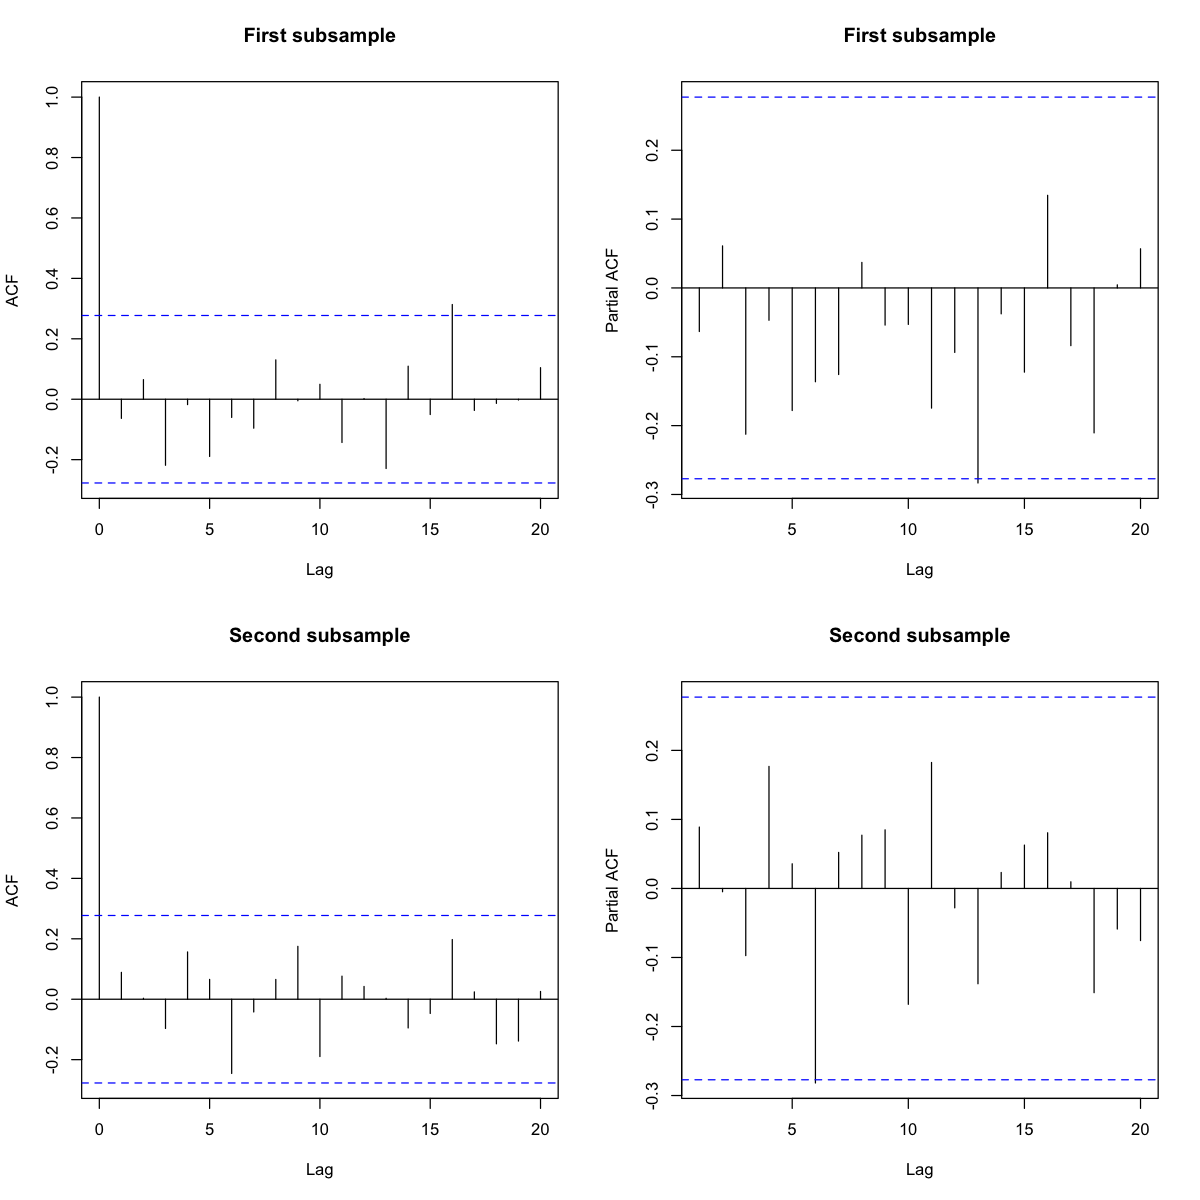

In [40]:
options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2, 2))

acf(model_sub1$residuals, main = "First subsample", lag = 20)
pacf(model_sub1$residuals, main = "First subsample", lag = 20)
acf(model_sub2$residuals, main = "Second subsample", lag = 20)
pacf(model_sub2$residuals, main = "Second subsample", lag = 20)

In [110]:
Box.test(model_sub1$residuals, type = "Ljung-Box", lag = 4)
Box.test(model_sub1$residuals, type = "Ljung-Box", lag = 8)
Box.test(model_sub1$residuals, type = "Ljung-Box", lag = 12)

Box.test(model_sub2$residuals, type = "Ljung-Box", lag = 4)
Box.test(model_sub2$residuals, type = "Ljung-Box", lag = 8)
Box.test(model_sub2$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  model_sub1$residuals
X-squared = 3.0994, df = 4, p-value = 0.5413



	Box-Ljung test

data:  model_sub1$residuals
X-squared = 6.9889, df = 8, p-value = 0.5378



	Box-Ljung test

data:  model_sub1$residuals
X-squared = 8.5152, df = 12, p-value = 0.7437



	Box-Ljung test

data:  model_sub2$residuals
X-squared = 2.321, df = 4, p-value = 0.677



	Box-Ljung test

data:  model_sub2$residuals
X-squared = 6.5064, df = 8, p-value = 0.5907



	Box-Ljung test

data:  model_sub2$residuals
X-squared = 11.297, df = 12, p-value = 0.5036


When we allow the coefficients to be different in first and second part of the sample, the dependence in residuals disappears. Note that we still estimate AR(2) process. Y3 is a realization of  AR(2) process specified as follows:

$$ y_t = 0.7 y_{t-1} - 0.49 y_{t-2} + \epsilon_t.$$

R has a built-in function for estimating the order of ARIMA processes. It goes through the set of possible lag (and differencing) combinations, and chooses the best one based on information criteria. One must be careful while using it, as the criteria might favor overfitted models. Successive model diagnostics is an essential part of estimation.

See what happens if we let auto.arima select the model for the three series we just examined.

In [111]:
auto.arima(y2)

Series: y2 
ARIMA(1,0,1) with zero mean 

Coefficients:
          ar1      ma1
      -0.7086  -0.6649
s.e.   0.0783   0.0947

sigma^2 estimated as 1.252:  log likelihood=-153.15
AIC=312.3   AICc=312.55   BIC=320.12

For y2, the function estimates the same model as we did. 

In [112]:
auto.arima(y3, approximation = FALSE, stepwise = FALSE)

Series: y3 
ARIMA(2,0,3) with zero mean 

Coefficients:
         ar1      ar2     ma1     ma2     ma3
      0.0135  -0.8331  0.7144  1.0270  0.3627
s.e.  0.0883   0.0727  0.1178  0.1027  0.1160

sigma^2 estimated as 0.08085:  log likelihood=-14.75
AIC=41.5   AICc=42.4   BIC=57.13

For y3, the machine prefers ARMA(2, 3), but look at the first AR coefficient. Let's compare all three of the criteria between AR(2) and ARMA(2, 3).

In [113]:
model <- Arima(y3, order = c(2, 0, 0), include.mean = FALSE)

models <- 2
criteria <- matrix(ncol = 3, nrow = models)
colnames(criteria) <- c('AIC', 'AICc', 'BIC')
rownames(criteria) <- c('AR(2)','ARMA(2, 3)')

criteria[1, 1] <- model$aic
criteria[1, 2] <- model$aicc
criteria[1, 3] <- model$bic
criteria[2, 1] <- 
auto.arima(y3)$aic
criteria[2, 2] <- auto.arima(y3)$aicc
criteria[2, 3] <- auto.arima(y3)$bic

criteria

AIC      AICc     BIC     
AR(2)      46.04844 46.29844 53.86395
ARMA(2, 3) 41.49562 42.39884 57.12664

The criteria do not send a clear message, but AR(2) may be more preferable due to its parsimony.

In [114]:
auto.arima(y1)

Series: y1 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.5873  -0.8709
s.e.  0.1499   0.0971

sigma^2 estimated as 0.8698:  log likelihood=-132.77
AIC=271.53   AICc=271.79   BIC=279.32

Here, R estimates the model with first difference. We get to drawbacks of possible over-differencing later. For now, let's tell R not to do that.

In [115]:
auto.arima(y1, max.d = 0)

Series: y1 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.7840
s.e.  0.0606

sigma^2 estimated as 0.8611:  log likelihood=-134.39
AIC=272.78   AICc=272.91   BIC=277.99

#### Spread

Now we will work with real-world data, thus we don't know what process the data come from. Start again by plotting the time series.

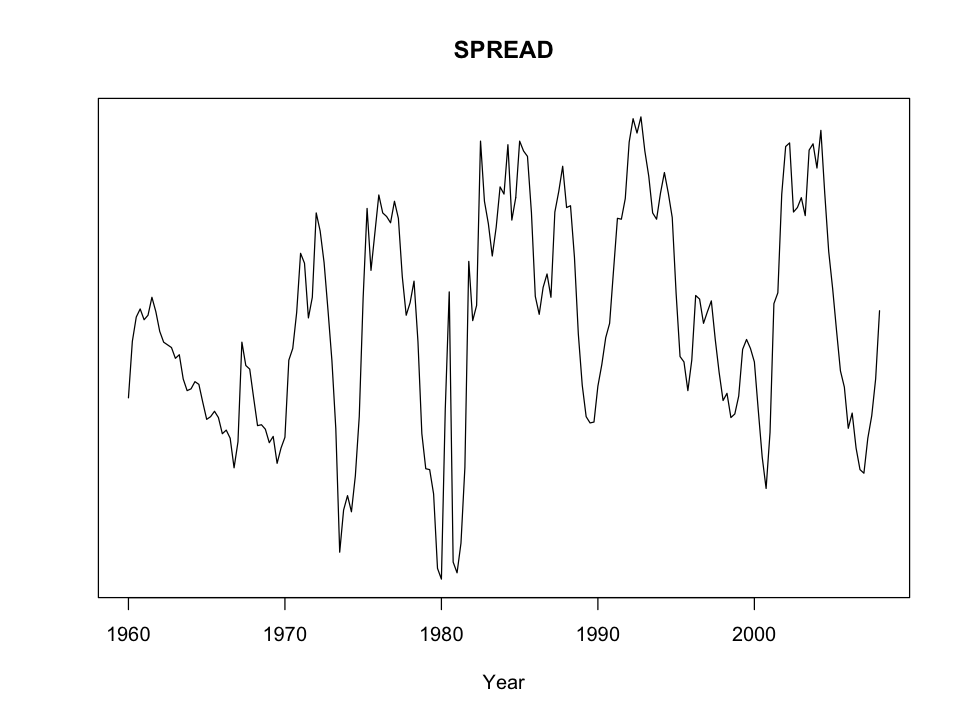

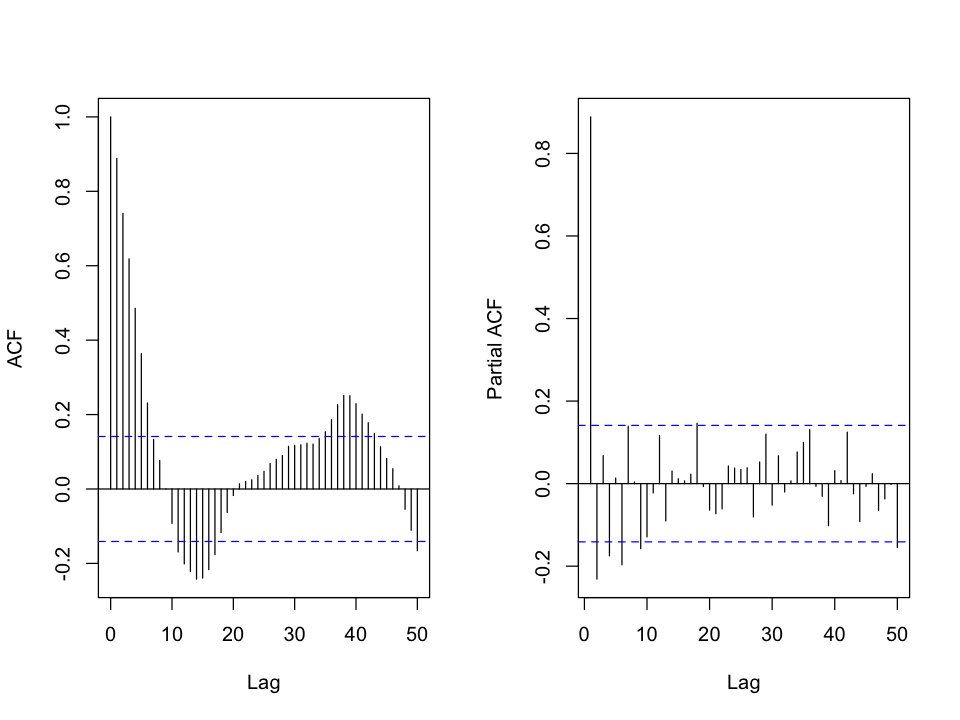

In [41]:
options(repr.plot.width = 8, repr.plot.height = 6)

plot.ts(spr$Value, xlab = 'Year', ylab = NA, main = 'SPREAD', axes = F)
axis(1, at = c(1, 41, 81, 121, 161), lab = c('1960', '1970', '1980', '1990', '2000'))
box()

par(mfrow = c(1, 2))
acf(spread, main = NA, lag = 50)
pacf(spread, main = NA, lag = 50)

Test for stationarity.

In [42]:
adf.test(spread, k = 1)
adf.test(spread, k = 5)
adf.test(spread, k = 10)

Warning message in adf.test(spread, k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.2663, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(spread, k = 5):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.9864, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(spread, k = 10):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  spread
Dickey-Fuller = -4.829, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


We reject non-stationarity based on ADF test. There seems to be a lot of dependence visible from the ACF and PACF. 

Series: spread 
ARIMA(1,0,3) with non-zero mean 

Coefficients:
         ar1     ma1      ma2     ma3    mean
      0.8084  0.3490  -0.0468  0.1491  1.3562
s.e.  0.0583  0.0896   0.0891  0.0690  0.2761

sigma^2 estimated as 0.276:  log likelihood=-148.03
AIC=308.06   AICc=308.51   BIC=327.64

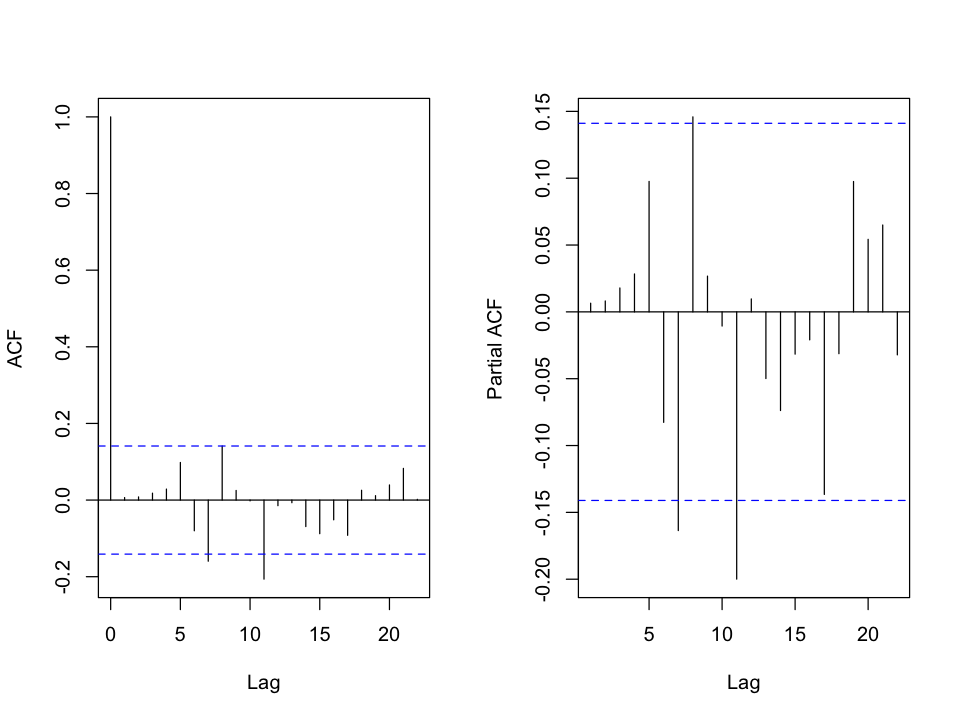

In [43]:
auto <- auto.arima(spread, max.d = 0)
auto

par(mfrow = c(1, 2))
acf(auto$residuals, main = NA)
pacf(auto$residuals, main = NA)

## -> the AR(2) works not that well in removing the dependencies - we can see it on the PACF plot, there are still significant correlations...


#### AR(7)

Series: spread 
ARIMA(7,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5      ar6     ar7    mean
      1.1717  -0.4615  0.3779  -0.3284  0.3095  -0.3673  0.1441  1.3681
s.e.  0.0713   0.1075  0.1102   0.1105  0.1093   0.1063  0.0708  0.2330

sigma^2 estimated as 0.2665:  log likelihood=-143.27
AIC=304.54   AICc=305.52   BIC=333.9

Training set error measures:
                      ME     RMSE       MAE      MPE     MAPE      MASE
Training set 0.004086152 0.505404 0.3641454 12.91438 71.88168 0.9234701
                     ACF1
Training set 0.0002657346


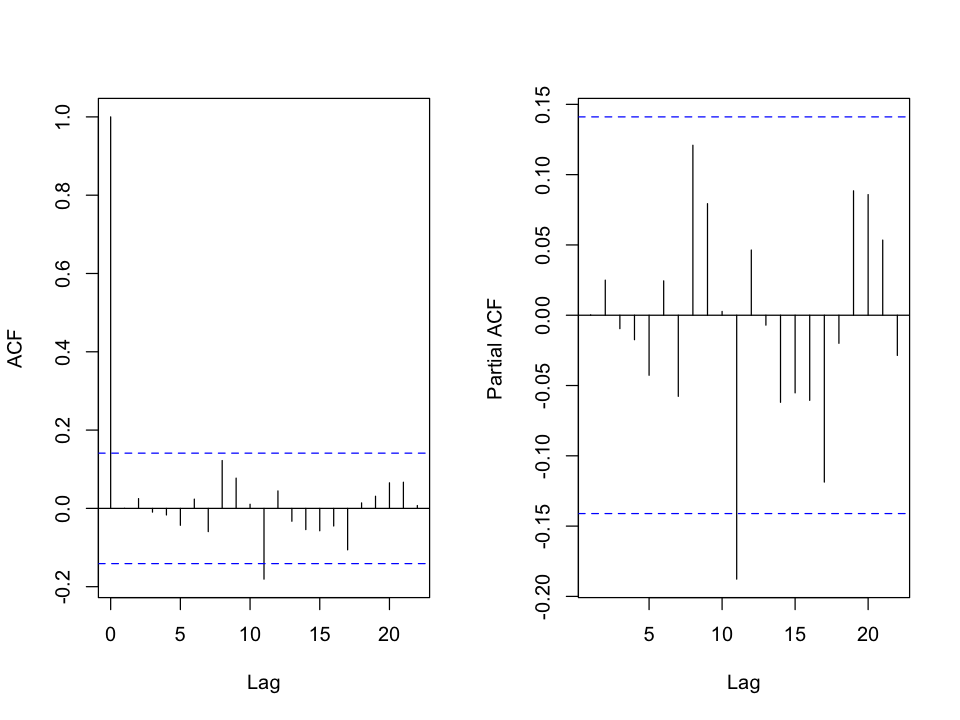

In [44]:
fit1 <- Arima(spread, order = c(7, 0, 0))
summary(fit1)

par(mfrow = c(1, 2))
acf(fit1$residuals, main = NA)
pacf(fit1$residuals, main = NA)

In [45]:
Box.test(fit1$residuals, type = "Ljung-Box", lag = 1)
Box.test(fit1$residuals, type = "Ljung-Box", lag = 8)
Box.test(fit1$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  fit1$residuals
X-squared = 1.3842e-05, df = 1, p-value = 0.997



	Box-Ljung test

data:  fit1$residuals
X-squared = 4.4315, df = 8, p-value = 0.8162



	Box-Ljung test

data:  fit1$residuals
X-squared = 12.836, df = 12, p-value = 0.3811


#### AR(2)

Series: spread 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2    mean
      1.1042  -0.2435  1.3584
s.e.  0.0700   0.0700  0.2691

sigma^2 estimated as 0.2882:  log likelihood=-153.11
AIC=314.23   AICc=314.44   BIC=327.28

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.004759627 0.5326216 0.3732799 10.66801 69.41077 0.9466351
                   ACF1
Training set 0.01694228


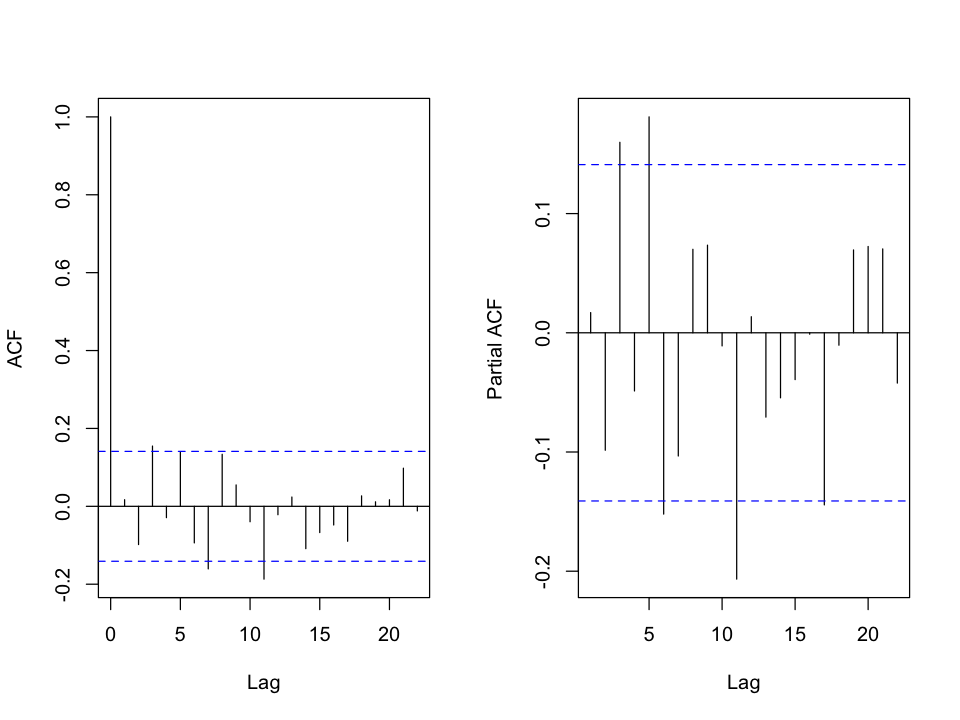

In [46]:
fit2 <- Arima(spread, order = c(2, 0, 0))
summary(fit2)

par(mfrow = c(1, 2))
acf(fit2$residuals, main = NA)
pacf(fit2$residuals, main = NA)

In [47]:
Box.test(fit2$residuals, type = "Ljung-Box", lag = 4)
Box.test(fit2$residuals, type = "Ljung-Box", lag = 8)
Box.test(fit2$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  fit2$residuals
X-squared = 6.8653, df = 4, p-value = 0.1432



	Box-Ljung test

data:  fit2$residuals
X-squared = 21.411, df = 8, p-value = 0.006132



	Box-Ljung test

data:  fit2$residuals
X-squared = 29.671, df = 12, p-value = 0.003129


#### AR(1; 2; 7)

To eliminate the "mirror" coefficients from AR(7) model, we fit the AR(7) again, but estimate only 1st, 2nd, and 7th coefficient, while the others are set to 0.

Note that fixing some paramaters of ARMA(p, q) to zero (or other value) while fitting a model using *Arima* is done using the *fixed* argument. The order of parameters is $(\phi_1, ..., \phi_p, \psi_1, ..., \psi_q, intercept)$, where $\phi_i$ denotes i-th autoregressive parameter and $\psi_j$ denotes j-th moving average parameter. To make R estimate the parameter enter *NA*. Also, you should have sufficient evidence from the stepwise model building, that restricting certain parameter to a particular value makes sense.

Series: spread 
ARIMA(7,0,0) with non-zero mean 

Coefficients:
         ar1      ar2  ar3  ar4  ar5  ar6      ar7    mean
      1.0843  -0.2094    0    0    0    0  -0.0443  1.3699
s.e.  0.0714   0.0748    0    0    0    0   0.0349  0.2231

sigma^2 estimated as 0.2872:  log likelihood=-152.32
AIC=314.63   AICc=314.95   BIC=330.94

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.004151988 0.5303707 0.3716481 9.791243 67.15656 0.9424967
                   ACF1
Training set 0.02532311


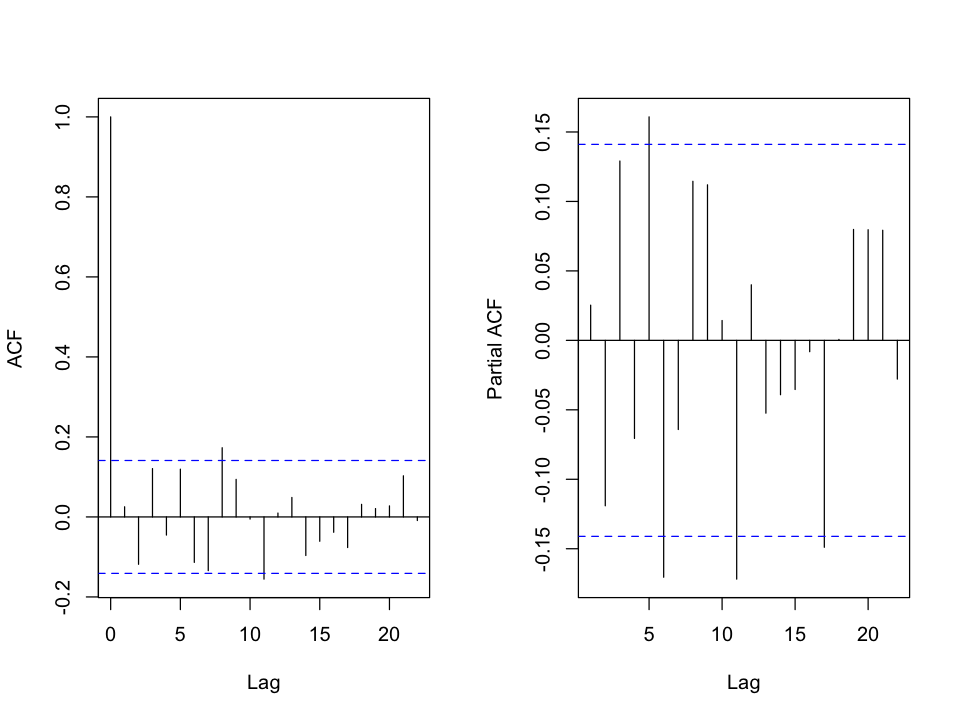

In [48]:
fit3 <- Arima(spread, order = c(7, 0, 0), fixed = c(NA, NA, 0, 0, 0, 0, NA, NA))
summary(fit3)

par(mfrow = c(1, 2))
acf(fit3$residuals, main = NA)
pacf(fit3$residuals, main = NA)

In [49]:
Box.test(fit3$residuals, type = "Ljung-Box", lag = 4)
Box.test(fit3$residuals, type = "Ljung-Box", lag = 8)
Box.test(fit3$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  fit3$residuals
X-squared = 6.1847, df = 4, p-value = 0.1858



	Box-Ljung test

data:  fit3$residuals
X-squared = 21.36, df = 8, p-value = 0.00625



	Box-Ljung test

data:  fit3$residuals
X-squared = 28.182, df = 12, p-value = 0.005202


#### ARMA(1, 1)

Series: spread 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1    mean
      0.8131  0.3664  1.3572
s.e.  0.0479  0.0960  0.2716

sigma^2 estimated as 0.2835:  log likelihood=-151.59
AIC=311.18   AICc=311.39   BIC=324.23

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.004721876 0.5283281 0.3785368 10.97913 72.63259 0.9599664
                    ACF1
Training set -0.03417062


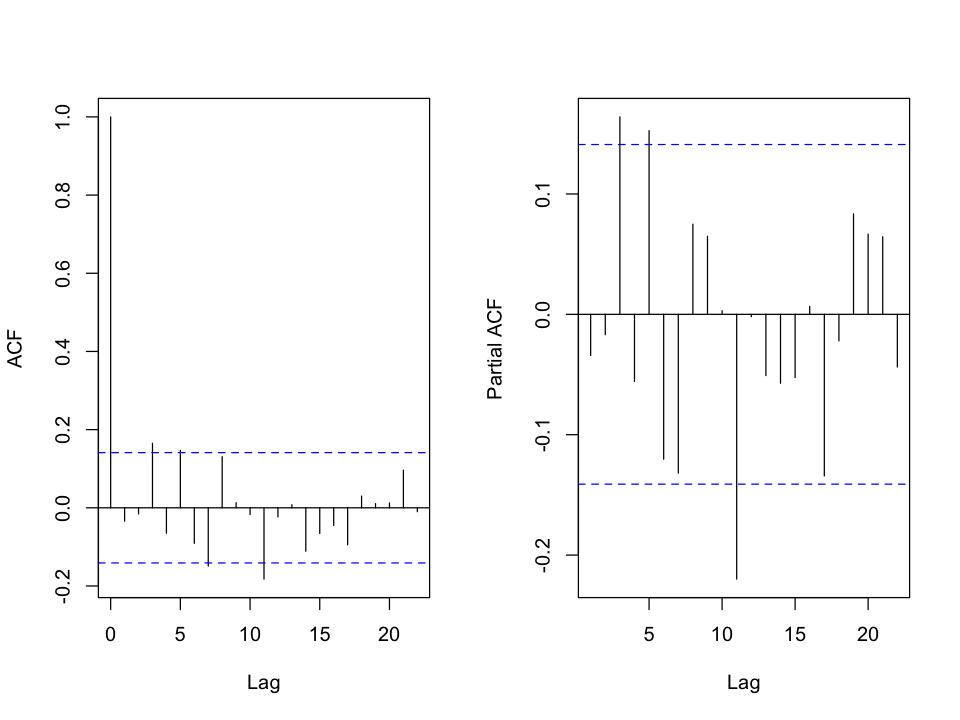

In [50]:
fit4 <- Arima(spread, order = c(1, 0, 1))
summary(fit4)

par(mfrow = c(1, 2))
acf(fit4$residuals, main = NA)
pacf(fit4$residuals, main = NA)

In [51]:
Box.test(fit4$residuals, type = "Ljung-Box", lag = 4)
Box.test(fit4$residuals, type = "Ljung-Box", lag = 8)
Box.test(fit4$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  fit4$residuals
X-squared = 6.5042, df = 4, p-value = 0.1645



	Box-Ljung test

data:  fit4$residuals
X-squared = 20.453, df = 8, p-value = 0.008752



	Box-Ljung test

data:  fit4$residuals
X-squared = 27.543, df = 12, p-value = 0.006449


#### ARMA(2, 1)

Series: spread 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1     ar2     ma1    mean
      0.4389  0.3494  0.7233  1.3517
s.e.  0.1214  0.1162  0.0876  0.2966

sigma^2 estimated as 0.2773:  log likelihood=-148.98
AIC=307.97   AICc=308.29   BIC=324.28

Training set error measures:
                      ME      RMSE       MAE    MPE     MAPE      MASE
Training set 0.005122011 0.5210981 0.3824834 10.848 76.75068 0.9699751
                    ACF1
Training set 0.008517384


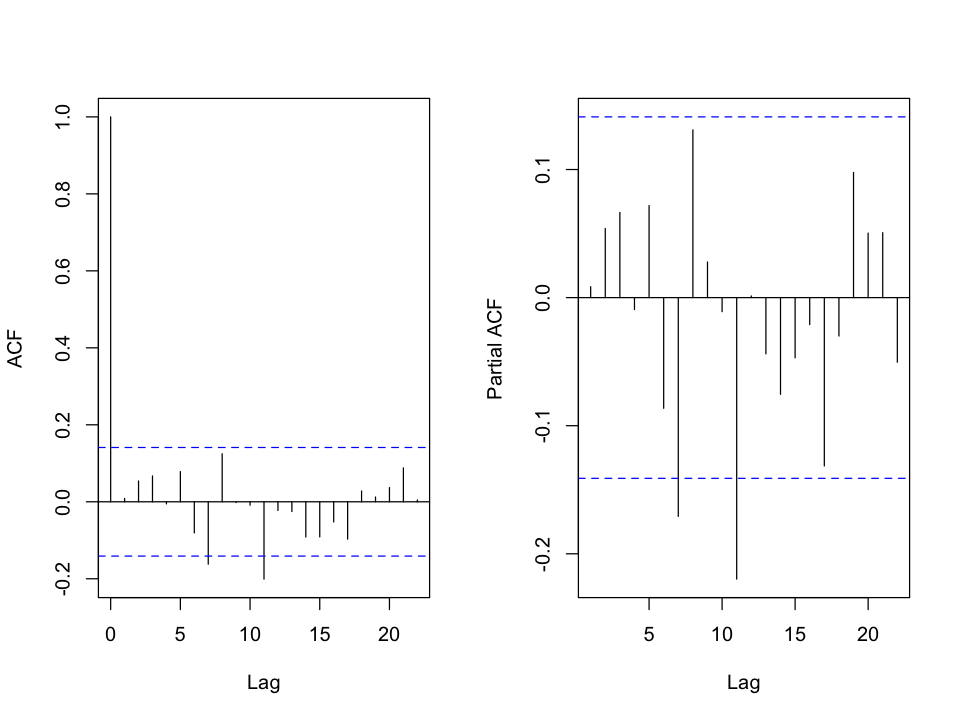

In [52]:
fit5 <- Arima(spread, order = c(2, 0, 1))
summary(fit5)

par(mfrow = c(1, 2))
acf(fit5$residuals, main = NA)
pacf(fit5$residuals, main = NA)

In [53]:
Box.test(fit5$residuals, type = "Ljung-Box", lag = 4)
Box.test(fit5$residuals, type = "Ljung-Box", lag = 8)
Box.test(fit5$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  fit5$residuals
X-squared = 1.4889, df = 4, p-value = 0.8286



	Box-Ljung test

data:  fit5$residuals
X-squared = 12.522, df = 8, p-value = 0.1294



	Box-Ljung test

data:  fit5$residuals
X-squared = 20.99, df = 12, p-value = 0.05053


#### ARMA(2, {1; 7})

Series: spread 
ARIMA(2,0,7) with non-zero mean 

Coefficients:
         ar1     ar2     ma1  ma2  ma3  ma4  ma5  ma6      ma7    mean
      0.2922  0.5011  0.8718    0    0    0    0    0  -0.1471  1.3556
s.e.  0.1258  0.1231  0.0856    0    0    0    0    0   0.0418  0.2952

sigma^2 estimated as 0.2636:  log likelihood=-143.87
AIC=299.73   AICc=300.18   BIC=319.31

Training set error measures:
                     ME      RMSE      MAE      MPE     MAPE      MASE
Training set 0.00469086 0.5066995 0.377934 15.08453 75.28714 0.9584379
                   ACF1
Training set 0.03846265


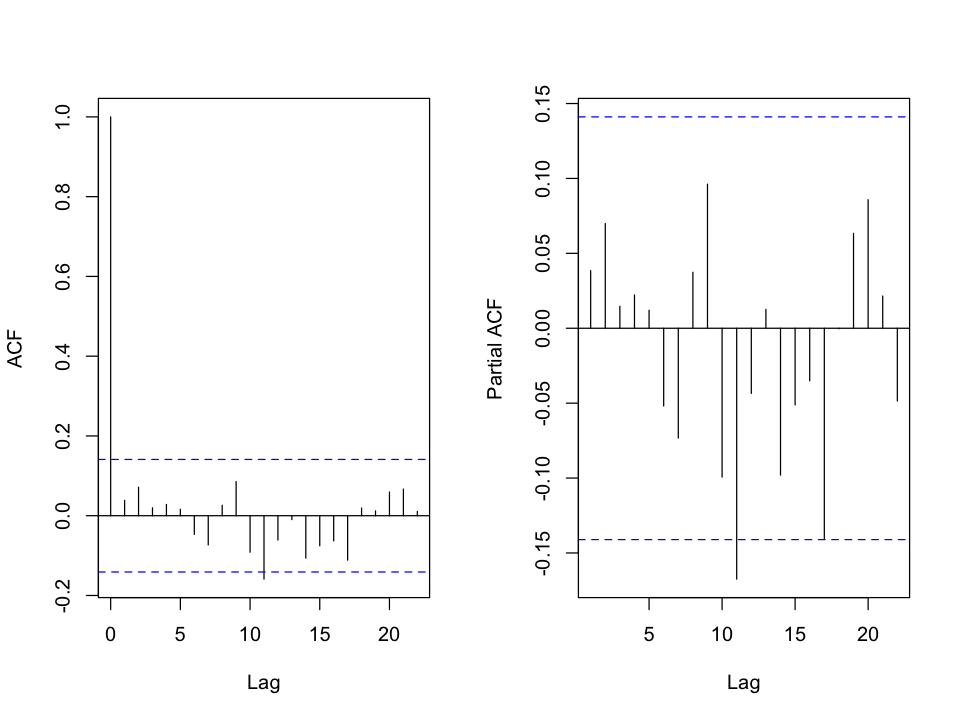

In [54]:
fit6 <- Arima(spread, order = c(2, 0, 7), fixed = c(NA, NA, NA, 0, 0, 0, 0, 0, NA, NA))
summary(fit6)

par(mfrow = c(1, 2))
acf(fit6$residuals, main = NA)
pacf(fit6$residuals, main = NA)

In [55]:
Box.test(fit6$residuals, type = "Ljung-Box", lag = 4)
Box.test(fit6$residuals, type = "Ljung-Box", lag = 8)
Box.test(fit6$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  fit6$residuals
X-squared = 1.5277, df = 4, p-value = 0.8217



	Box-Ljung test

data:  fit6$residuals
X-squared = 3.2452, df = 8, p-value = 0.918



	Box-Ljung test

data:  fit6$residuals
X-squared = 12.46, df = 12, p-value = 0.4095


There is a lot of possible models, let's see the information criteria.

In [56]:
models <- 7
criteria <- matrix(ncol = 2, nrow = models)
colnames(criteria) <- c('AIC', 'BIC')
rownames(criteria) <- c('AR(7)', 'AR(2)', 'AR(1; 2; 7)', 'ARMA(1, 1)', 'ARMA(2, 1)', 'ARMA(2, {1; 7})', 'automatic - ARMA(1, 3)')

criteria[1, 1] <- fit1$aic
criteria[1, 2] <- fit1$bic
criteria[2, 1] <- fit2$aic
criteria[2, 2] <- fit2$bic
criteria[3, 1] <- fit3$aic
criteria[3, 2] <- fit3$bic
criteria[4, 1] <- fit4$aic
criteria[4, 2] <- fit4$bic
criteria[5, 1] <- fit5$aic
criteria[5, 2] <- fit5$bic
criteria[6, 1] <- fit6$aic
criteria[6, 2] <- fit6$bic
criteria[7, 1] <- auto$aic
criteria[7, 2] <- auto$bic

criteria

AIC      BIC     
AR(7)                  304.5380 333.9023
AR(2)                  314.2274 327.2781
AR(1; 2; 7)            314.6309 330.9443
ARMA(1, 1)             311.1754 324.2262
ARMA(2, 1)             307.9696 324.2830
ARMA(2, {1; 7})        299.7318 319.3079
automatic - ARMA(1, 3) 308.0619 327.6381

## -> we would seelect the ARMA(2,1,7); and it also works well in removing the dependencies... though not fully

#### Subsetting?

The results do not provide a clear message, we might want to select ARMA(2, 1), but let's look at the data once again first.

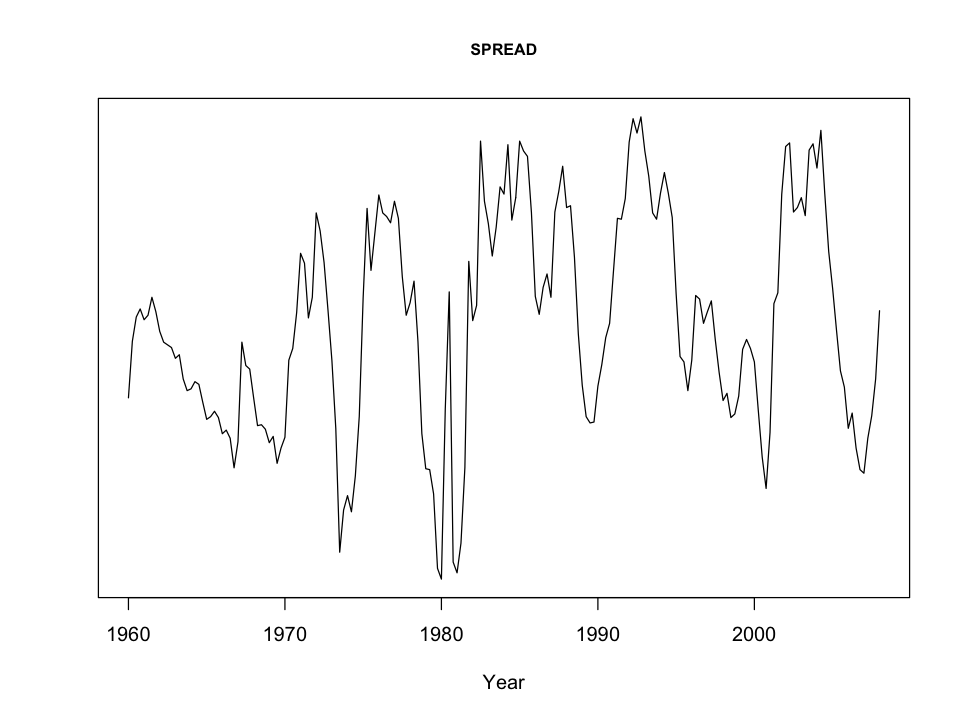

In [132]:
plot.ts(spr$Value, xlab = 'Year', ylab = NA, main = 'SPREAD', axes = F, cex.main = 0.8)
axis(1, at = c(1, 41, 81, 121, 161), lab = c('1960', '1970', '1980', '1990', '2000'))
box()

There is a suspicious jump around 1980. What if the process has a shift? Examine the data between 1980 and 1983

In [133]:
spr[spr[, 1] > as.Date("1980-01-01") & spr[, 1] < as.Date("1984-01-01"),]

Year       Value
82 1980-02-01  0.43
83 1980-03-01  1.72
84 1980-04-01 -1.29
85 1981-01-01 -1.41
86 1981-02-01 -1.08
87 1981-03-01 -0.24
88 1981-04-01  2.06
89 1982-01-01  1.40
90 1982-02-01  1.57
91 1982-03-01  3.40
92 1982-04-01  2.73
93 1983-01-01  2.48
94 1983-02-01  2.12
95 1983-03-01  2.44
96 1983-04-01  2.89

The jump occurs between 3rd and 4th quarter of 1981. Let's subsample the data.

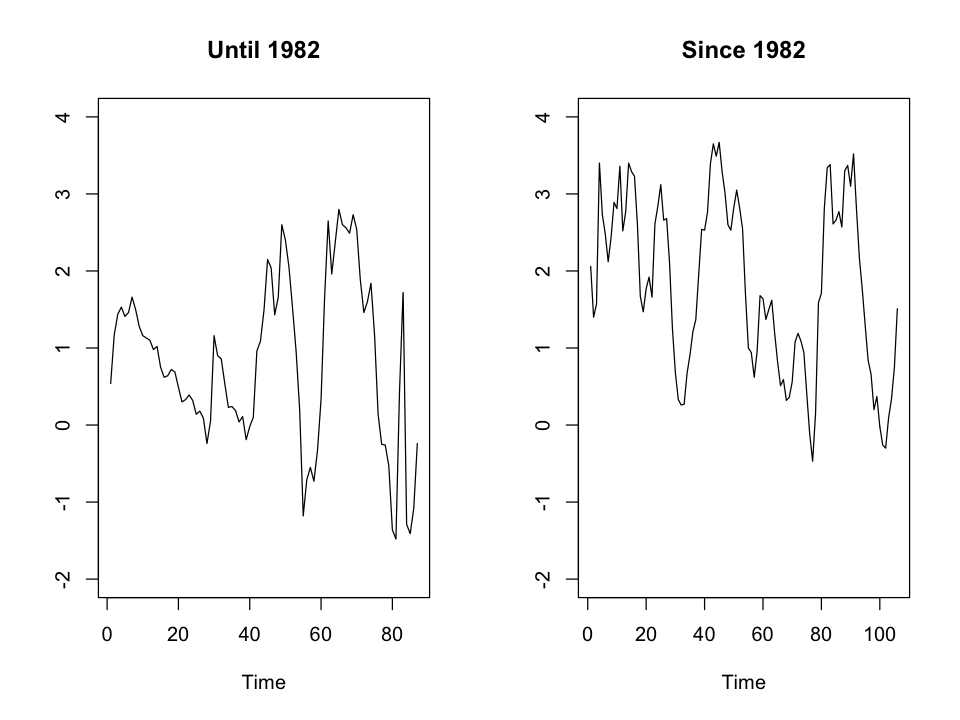

In [134]:
spread1 <- spr[spr[, 1] <= as.Date("1981-03-01"), 'Value']
spread2 <- spr[spr[, 1] > as.Date("1981-03-01"), 'Value']

par(mfrow = c(1, 2))
plot.ts(spread1, ylab = NA, main = 'Until 1982', ylim = c(-2, 4))
plot.ts(spread2, ylab = NA, main = 'Since 1982', ylim = c(-2, 4))

Examine ACF and PACF of both subsamples.

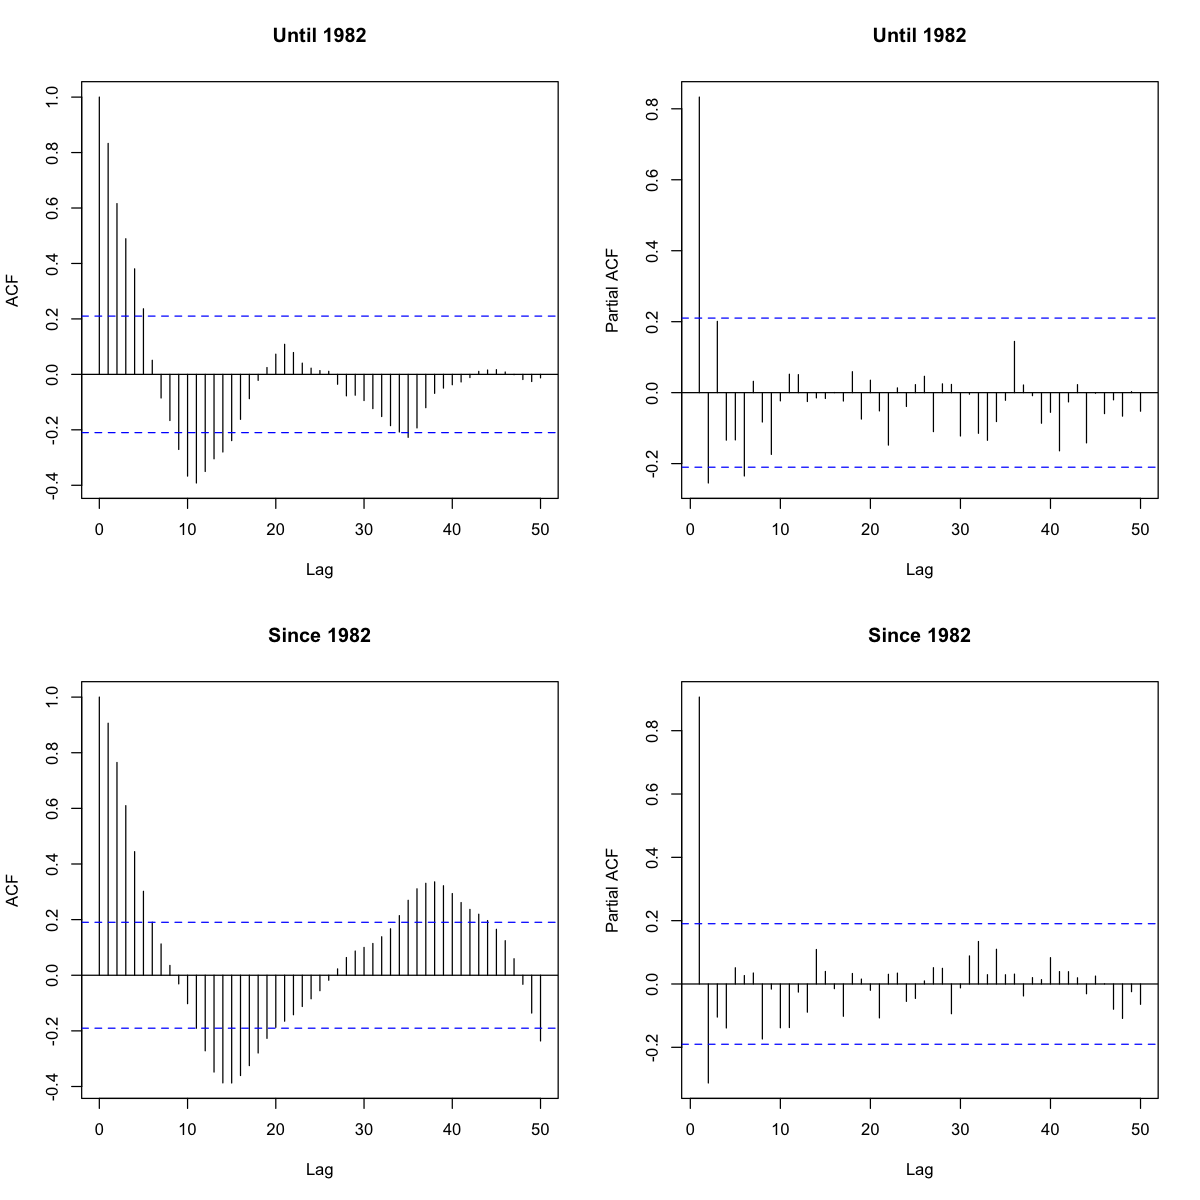

In [135]:
options(repr.plot.width = 10, repr.plot.height = 10)

par(mfrow = c(2, 2))

acf(spread1, main = 'Until 1982', lag = 50)
pacf(spread1, main = 'Until 1982', lag = 50)
acf(spread2, main = 'Since 1982', lag = 50)
pacf(spread2, main = 'Since 1982', lag = 50)

There are some differences in the correlation functions. Fit the same models as we did for the whole sample for both subsamples individually.

Series: spread1 
ARIMA(7,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5      ar6     ar7    mean
      1.0494  -0.4069  0.3173  -0.0253  0.1113  -0.4405  0.1658  0.7631
s.e.  0.1060   0.1568  0.1717   0.2045  0.2362   0.2222  0.1462  0.2403

sigma^2 estimated as 0.2879:  log likelihood=-66.35
AIC=150.7   AICc=153.04   BIC=172.89

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.004893198 0.5113048 0.3437529 -2.553925 68.78235 0.8835252
                   ACF1
Training set 0.01148925
Series: spread2 
ARIMA(7,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5     ar6     ar7    mean
      1.1378  -0.2055  0.0660  -0.1858  0.0165  0.0021  0.0242  1.8517
s.e.  0.0983   0.1495  0.1575   0.1718  0.1732  0.1706  0.1094  0.2879

sigma^2 estimated as 0.2099:  log likelihood=-64.53
AIC=147.06   AICc=148.94   BIC=171.03

Training set error measures:
    

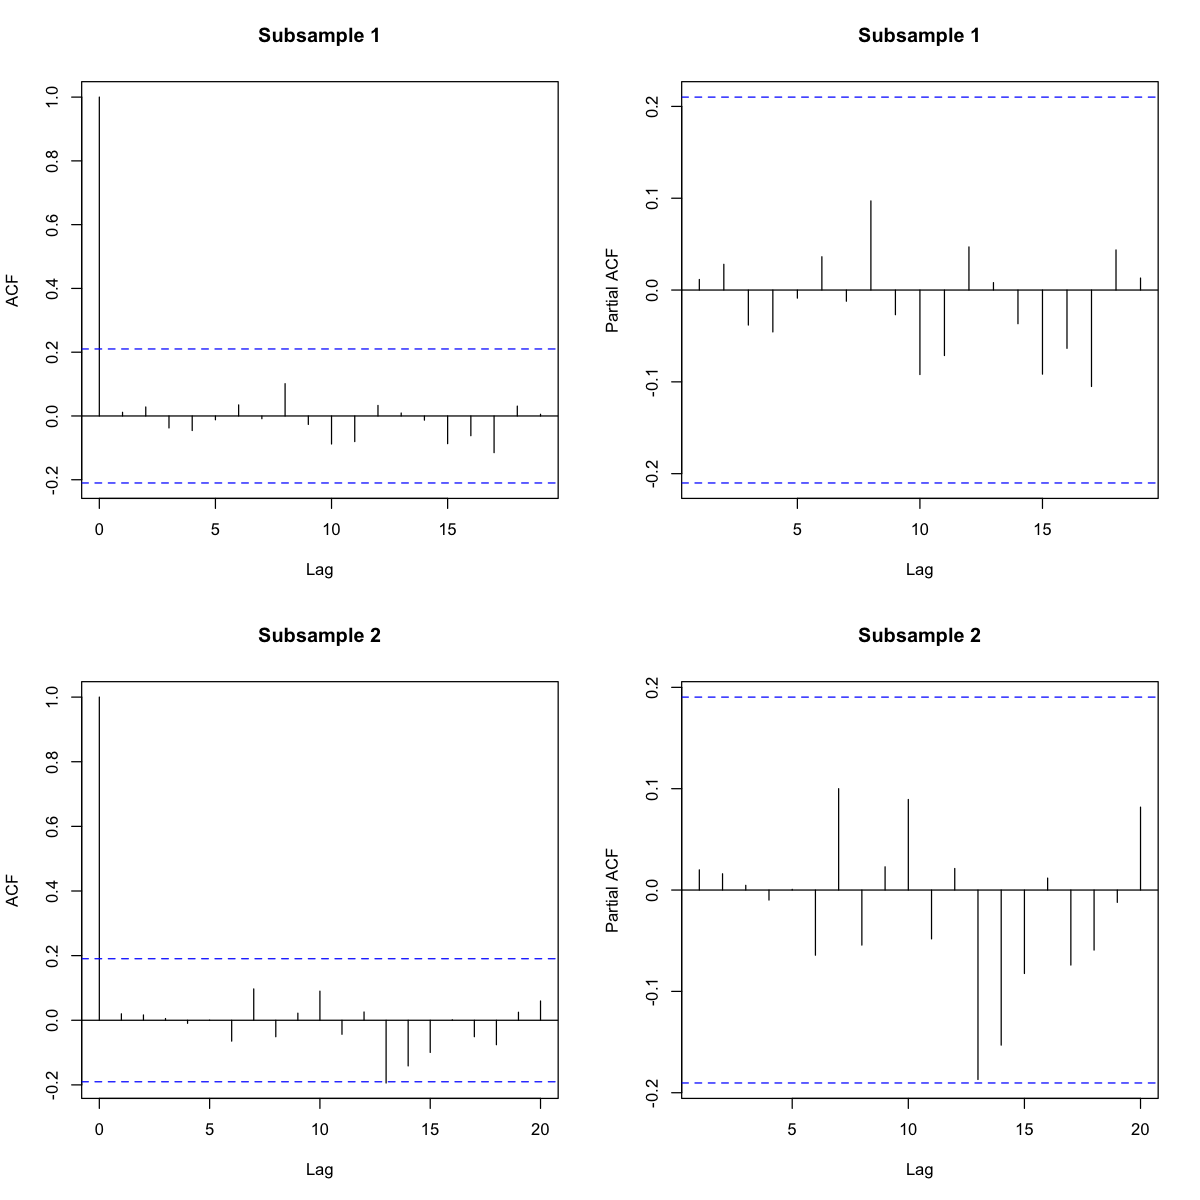

In [136]:
sub1_fit1 <- Arima(spread1, order = c(7, 0, 0))
sub2_fit1 <- Arima(spread2, order = c(7, 0, 0))

summary(sub1_fit1)
summary(sub2_fit1)

par(mfrow = c(2, 2))
acf(sub1_fit1$residuals, main = 'Subsample 1')
pacf(sub1_fit1$residuals, main = 'Subsample 1')
acf(sub2_fit1$residuals, main = 'Subsample 2')
pacf(sub2_fit1$residuals, main = 'Subsample 2')

In [137]:
Box.test(sub1_fit1$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub1_fit1$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub1_fit1$residuals, type = "Ljung-Box", lag = 12)

Box.test(sub2_fit1$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub2_fit1$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub2_fit1$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  sub1_fit1$residuals
X-squared = 0.40716, df = 4, p-value = 0.9819



	Box-Ljung test

data:  sub1_fit1$residuals
X-squared = 1.547, df = 8, p-value = 0.9919



	Box-Ljung test

data:  sub1_fit1$residuals
X-squared = 3.162, df = 12, p-value = 0.9943



	Box-Ljung test

data:  sub2_fit1$residuals
X-squared = 0.08581, df = 4, p-value = 0.9991



	Box-Ljung test

data:  sub2_fit1$residuals
X-squared = 1.9514, df = 8, p-value = 0.9825



	Box-Ljung test

data:  sub2_fit1$residuals
X-squared = 3.2805, df = 12, p-value = 0.9932


Series: spread1 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2    mean
      1.0373  -0.2442  0.7817
s.e.  0.1041   0.1059  0.2831

sigma^2 estimated as 0.3268:  log likelihood=-73.93
AIC=155.85   AICc=156.34   BIC=165.72

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.003810937 0.5617289 0.3592428 -6.50108 69.79059 0.9233377
                   ACF1
Training set 0.05861114
Series: spread2 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2    mean
      1.1902  -0.3188  1.8555
s.e.  0.0929   0.0932  0.3248

sigma^2 estimated as 0.2057:  log likelihood=-66.02
AIC=140.04   AICc=140.44   BIC=150.69

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.003314685 0.4470579 0.3469712 31.47942 65.61108 0.9119393
                    ACF1
Training set -0.02810824


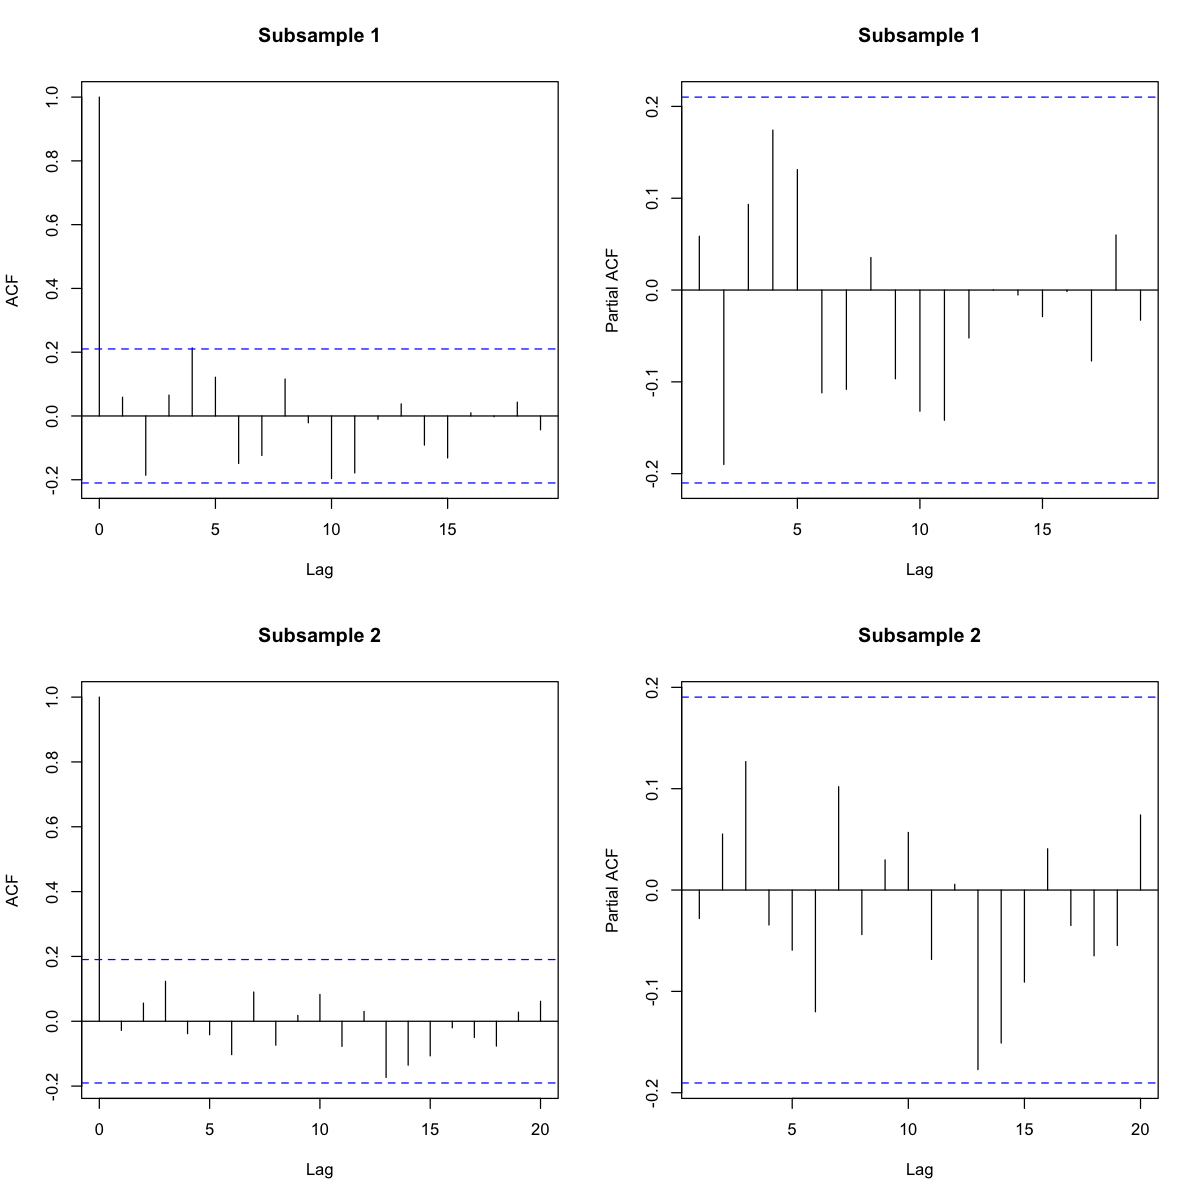

In [138]:
sub1_fit2 <- Arima(spread1, order = c(2, 0, 0))
sub2_fit2 <- Arima(spread2, order = c(2, 0, 0))

summary(sub1_fit2)
summary(sub2_fit2)

par(mfrow = c(2, 2))
acf(sub1_fit2$residuals, main = 'Subsample 1')
pacf(sub1_fit2$residuals, main = 'Subsample 1')
acf(sub2_fit2$residuals, main = 'Subsample 2')
pacf(sub2_fit2$residuals, main = 'Subsample 2')

In [139]:
Box.test(sub1_fit2$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub1_fit2$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub1_fit2$residuals, type = "Ljung-Box", lag = 12)

Box.test(sub2_fit2$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub2_fit2$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub2_fit2$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  sub1_fit2$residuals
X-squared = 8.1045, df = 4, p-value = 0.08782



	Box-Ljung test

data:  sub1_fit2$residuals
X-squared = 14.418, df = 8, p-value = 0.07151



	Box-Ljung test

data:  sub1_fit2$residuals
X-squared = 21.601, df = 12, p-value = 0.04225



	Box-Ljung test

data:  sub2_fit2$residuals
X-squared = 2.282, df = 4, p-value = 0.684



	Box-Ljung test

data:  sub2_fit2$residuals
X-squared = 5.2676, df = 8, p-value = 0.7286



	Box-Ljung test

data:  sub2_fit2$residuals
X-squared = 6.9586, df = 12, p-value = 0.8603


Series: spread1 
ARIMA(7,0,0) with non-zero mean 

Coefficients:
         ar1      ar2  ar3  ar4  ar5  ar6      ar7    mean
      0.9940  -0.1892    0    0    0    0  -0.0915  0.8065
s.e.  0.1074   0.1119    0    0    0    0   0.0642  0.2084

sigma^2 estimated as 0.3227:  log likelihood=-72.93
AIC=155.87   AICc=156.61   BIC=168.2

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.005873055 0.5548675 0.3490484 -6.422412 65.01294 0.8971357
                   ACF1
Training set 0.05770643
Series: spread2 
ARIMA(7,0,0) with non-zero mean 

Coefficients:
         ar1      ar2  ar3  ar4  ar5  ar6      ar7    mean
      1.1790  -0.3008    0    0    0    0  -0.0258  1.8633
s.e.  0.0946   0.0980    0    0    0    0   0.0439  0.2868

sigma^2 estimated as 0.207:  log likelihood=-65.85
AIC=141.69   AICc=142.29   BIC=155.01

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Traini

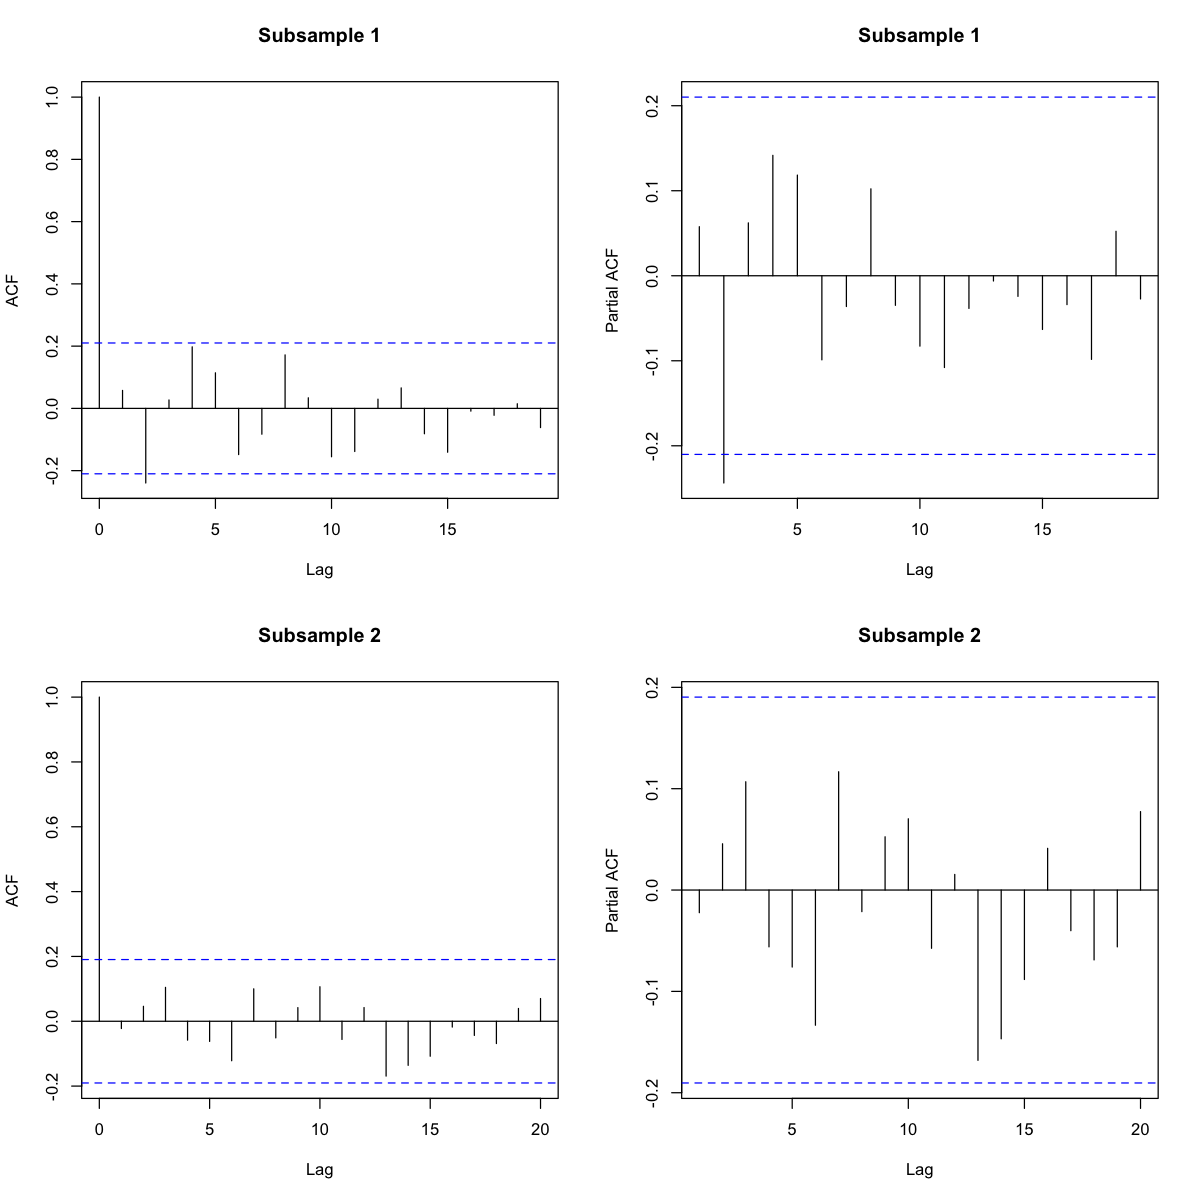

In [140]:
sub1_fit3 <- Arima(spread1, order = c(7, 0, 0), fixed = c(NA, NA, 0, 0 ,0, 0, NA, NA))
sub2_fit3 <- Arima(spread2, order = c(7, 0, 0), fixed = c(NA, NA, 0, 0 ,0, 0, NA, NA))

summary(sub1_fit3)
summary(sub2_fit3)

par(mfrow = c(2, 2))
acf(sub1_fit3$residuals, main = 'Subsample 1')
pacf(sub1_fit3$residuals, main = 'Subsample 1')
acf(sub2_fit3$residuals, main = 'Subsample 2')
pacf(sub2_fit3$residuals, main = 'Subsample 2')

In [141]:
Box.test(sub1_fit3$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub1_fit3$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub1_fit3$residuals, type = "Ljung-Box", lag = 12)

Box.test(sub2_fit3$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub2_fit3$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub2_fit3$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  sub1_fit3$residuals
X-squared = 9.2413, df = 4, p-value = 0.05534



	Box-Ljung test

data:  sub1_fit3$residuals
X-squared = 16.137, df = 8, p-value = 0.04046



	Box-Ljung test

data:  sub1_fit3$residuals
X-squared = 20.721, df = 12, p-value = 0.05462



	Box-Ljung test

data:  sub2_fit3$residuals
X-squared = 1.8834, df = 4, p-value = 0.7572



	Box-Ljung test

data:  sub2_fit3$residuals
X-squared = 5.4801, df = 8, p-value = 0.7052



	Box-Ljung test

data:  sub2_fit3$residuals
X-squared = 7.6361, df = 12, p-value = 0.8129


Series: spread1 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1    mean
      0.7107  0.4298  0.7826
s.e.  0.0870  0.1238  0.2833

sigma^2 estimated as 0.3139:  log likelihood=-72.24
AIC=152.49   AICc=152.98   BIC=162.35

Training set error measures:
                      ME     RMSE       MAE       MPE     MAPE     MASE
Training set 0.003575199 0.550553 0.3670266 -9.573946 74.49711 0.943344
                    ACF1
Training set -0.01741404
Series: spread2 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1    mean
      0.8524  0.2938  1.8416
s.e.  0.0521  0.0952  0.3646

sigma^2 estimated as 0.2101:  log likelihood=-67.12
AIC=142.24   AICc=142.63   BIC=152.89

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.003157617 0.4518513 0.3509155 31.51629 66.54684 0.9223061
                   ACF1
Training set 0.03267958


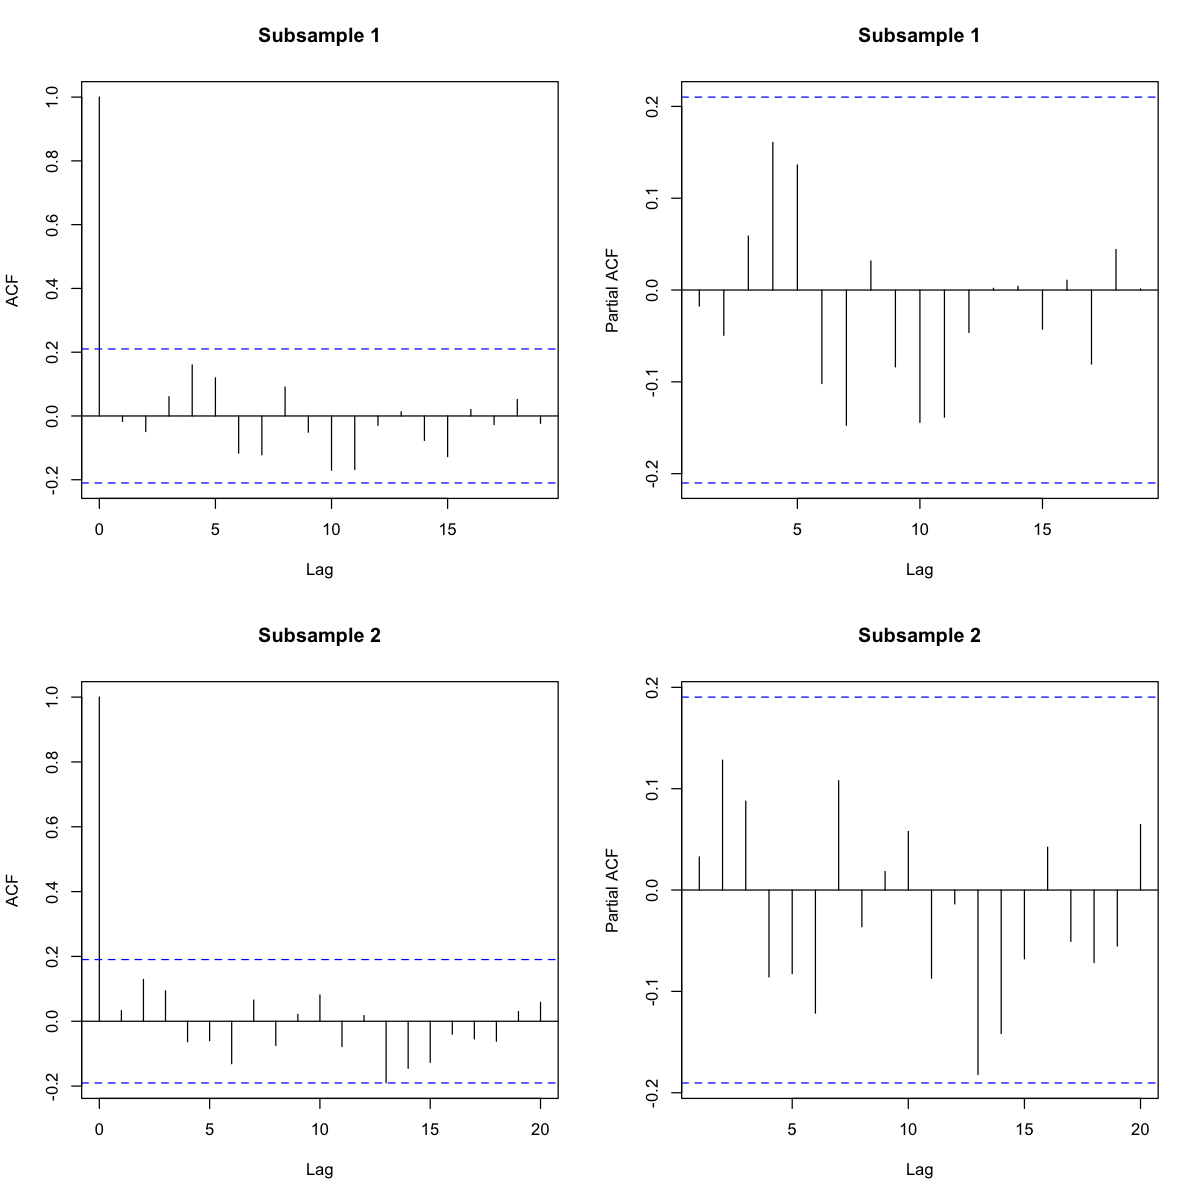

In [142]:
sub1_fit4 <- Arima(spread1, order = c(1, 0, 1))
sub2_fit4 <- Arima(spread2, order = c(1, 0, 1))

summary(sub1_fit4)
summary(sub2_fit4)

par(mfrow = c(2, 2))
acf(sub1_fit4$residuals, main = 'Subsample 1')
pacf(sub1_fit4$residuals, main = 'Subsample 1')
acf(sub2_fit4$residuals, main = 'Subsample 2')
pacf(sub2_fit4$residuals, main = 'Subsample 2')

In [143]:
Box.test(sub1_fit4$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub1_fit4$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub1_fit4$residuals, type = "Ljung-Box", lag = 12)

Box.test(sub2_fit4$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub2_fit4$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub2_fit4$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  sub1_fit4$residuals
X-squared = 2.9782, df = 4, p-value = 0.5615



	Box-Ljung test

data:  sub1_fit4$residuals
X-squared = 7.8738, df = 8, p-value = 0.4459



	Box-Ljung test

data:  sub1_fit4$residuals
X-squared = 14.006, df = 12, p-value = 0.3003



	Box-Ljung test

data:  sub2_fit4$residuals
X-squared = 3.3782, df = 4, p-value = 0.4966



	Box-Ljung test

data:  sub2_fit4$residuals
X-squared = 6.8895, df = 8, p-value = 0.5486



	Box-Ljung test

data:  sub2_fit4$residuals
X-squared = 8.4997, df = 12, p-value = 0.745


Series: spread1 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1     ar2     ma1    mean
      0.5392  0.1616  0.5786  0.7788
s.e.  0.2529  0.2279  0.2215  0.2999

sigma^2 estimated as 0.3158:  log likelihood=-71.99
AIC=153.98   AICc=154.72   BIC=166.31

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.003519303 0.5489179 0.3684415 -10.86572 75.97378 0.9469806
                    ACF1
Training set 0.001329895
Series: spread2 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1      ar2      ma1    mean
      1.5671  -0.6570  -0.4332  1.8654
s.e.  0.2262   0.1998   0.2833  0.2666

sigma^2 estimated as 0.204:  log likelihood=-65.11
AIC=140.22   AICc=140.82   BIC=153.54

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.001696198 0.4431004 0.3445753 30.89113 63.00577 0.9056423
                   ACF1
Training set 0.01630294


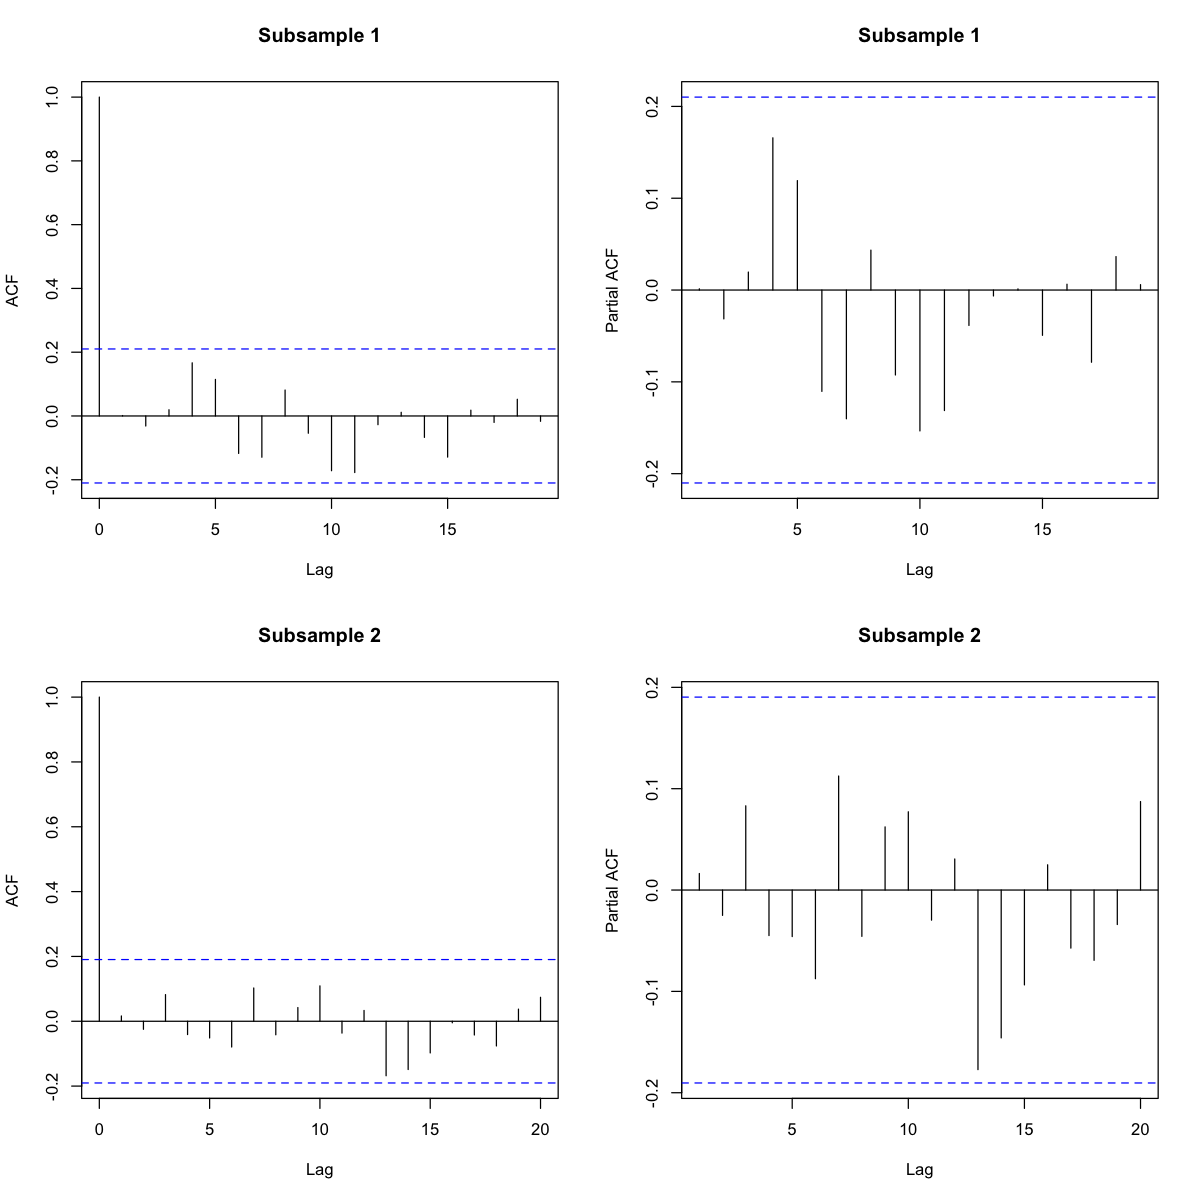

In [144]:
sub1_fit5 <- Arima(spread1, order = c(2, 0, 1))
sub2_fit5 <- Arima(spread2, order = c(2, 0, 1))

summary(sub1_fit5)
summary(sub2_fit5)

par(mfrow = c(2, 2))
acf(sub1_fit5$residuals, main = 'Subsample 1')
pacf(sub1_fit5$residuals, main = 'Subsample 1')
acf(sub2_fit5$residuals, main = 'Subsample 2')
pacf(sub2_fit5$residuals, main = 'Subsample 2')

In [145]:
Box.test(sub1_fit5$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub1_fit5$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub1_fit5$residuals, type = "Ljung-Box", lag = 12)

Box.test(sub2_fit5$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub2_fit5$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub2_fit5$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  sub1_fit5$residuals
X-squared = 2.7139, df = 4, p-value = 0.6068



	Box-Ljung test

data:  sub1_fit5$residuals
X-squared = 7.541, df = 8, p-value = 0.4795



	Box-Ljung test

data:  sub1_fit5$residuals
X-squared = 14.077, df = 12, p-value = 0.2958



	Box-Ljung test

data:  sub2_fit5$residuals
X-squared = 1.0358, df = 4, p-value = 0.9043



	Box-Ljung test

data:  sub2_fit5$residuals
X-squared = 3.478, df = 8, p-value = 0.9009



	Box-Ljung test

data:  sub2_fit5$residuals
X-squared = 5.4029, df = 12, p-value = 0.9431


Series: spread1 
ARIMA(2,0,7) with non-zero mean 

Coefficients:
         ar1     ar2     ma1  ma2  ma3  ma4  ma5  ma6      ma7    mean
      0.6137  0.1179  0.4959    0    0    0    0    0  -0.2187  0.7796
s.e.  0.2625  0.2298  0.2499    0    0    0    0    0   0.1428  0.2677

sigma^2 estimated as 0.3063:  log likelihood=-70.36
AIC=152.71   AICc=153.76   BIC=167.51

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.00369038 0.5373371 0.3551827 1.355244 66.84033 0.9129023
                      ACF1
Training set -0.0003136288
Series: spread2 
ARIMA(2,0,7) with non-zero mean 

Coefficients:
         ar1      ar2     ma1  ma2  ma3  ma4  ma5  ma6      ma7    mean
      0.9834  -0.1178  4.9154    0    0    0    0    0  -0.5531  1.8439
s.e.  0.1860   0.1756  3.6529    0    0    0    0    0   0.6481  0.3370

sigma^2 estimated as 0.008679:  log likelihood=-66.03
AIC=144.06   AICc=144.91   BIC=160.04

Training set error measures:

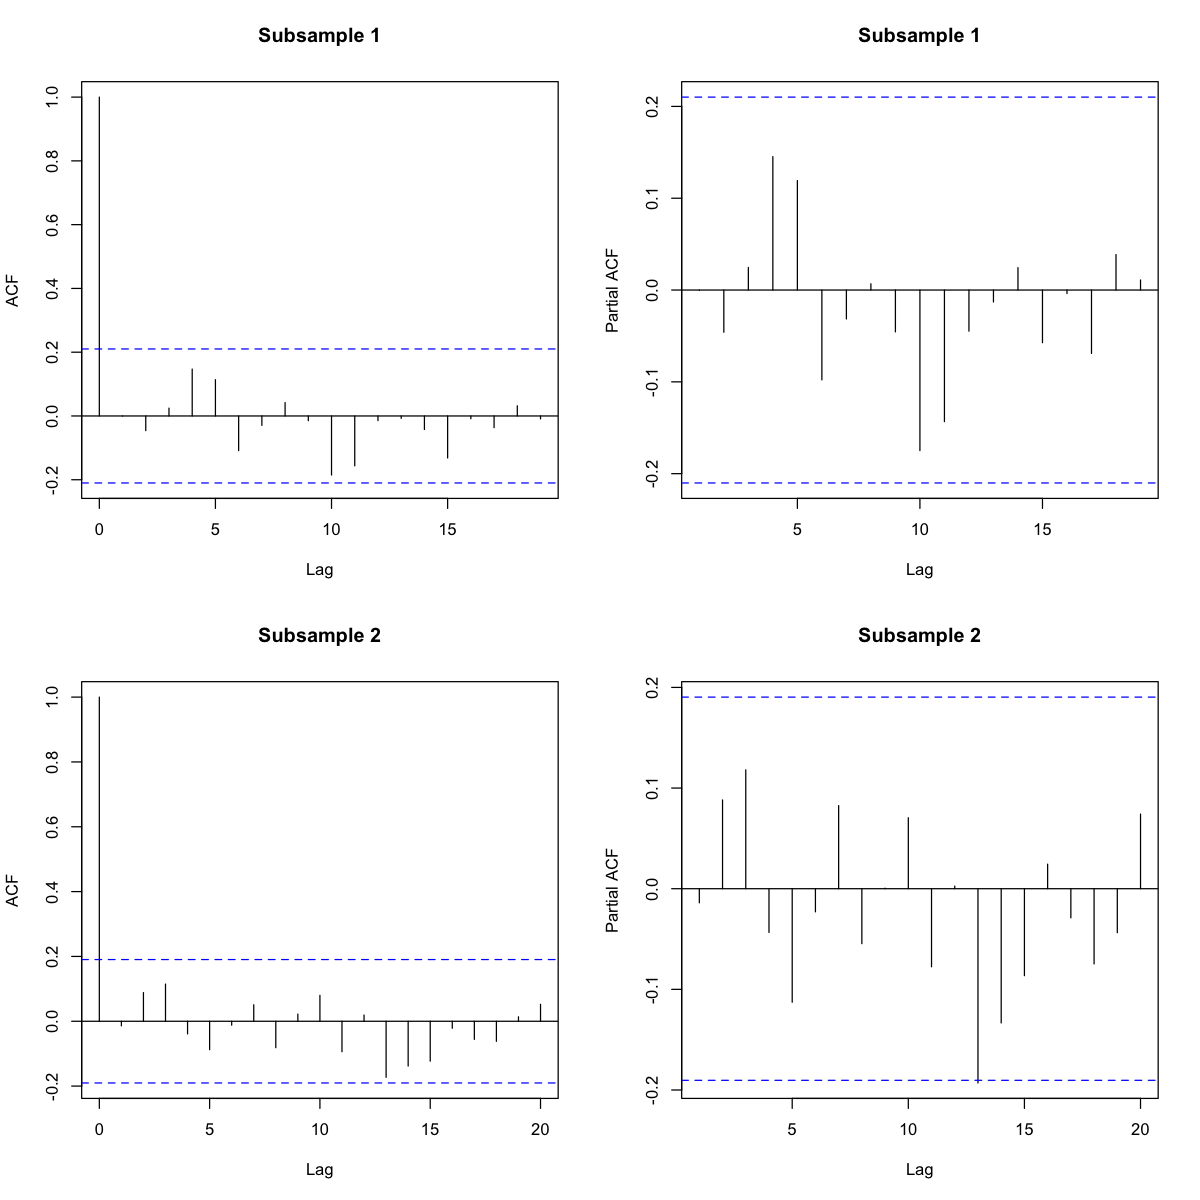

In [146]:
sub1_fit6 <- Arima(spread1, order = c(2, 0, 7), fixed = c(NA, NA, NA, 0, 0, 0, 0, 0, NA, NA))
sub2_fit6 <- Arima(spread2, order = c(2, 0, 7), fixed = c(NA, NA, NA, 0, 0, 0, 0, 0, NA, NA))

summary(sub1_fit6)
summary(sub2_fit6)

par(mfrow = c(2, 2))
acf(sub1_fit6$residuals, main = 'Subsample 1')
pacf(sub1_fit6$residuals, main = 'Subsample 1')
acf(sub2_fit6$residuals, main = 'Subsample 2')
pacf(sub2_fit6$residuals, main = 'Subsample 2')

In [147]:
Box.test(sub1_fit6$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub1_fit6$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub1_fit6$residuals, type = "Ljung-Box", lag = 12)

Box.test(sub2_fit6$residuals, type = "Ljung-Box", lag = 4)
Box.test(sub2_fit6$residuals, type = "Ljung-Box", lag = 8)
Box.test(sub2_fit6$residuals, type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  sub1_fit6$residuals
X-squared = 2.2645, df = 4, p-value = 0.6872



	Box-Ljung test

data:  sub1_fit6$residuals
X-squared = 4.8728, df = 8, p-value = 0.7711



	Box-Ljung test

data:  sub1_fit6$residuals
X-squared = 10.853, df = 12, p-value = 0.5416



	Box-Ljung test

data:  sub2_fit6$residuals
X-squared = 2.5149, df = 4, p-value = 0.642



	Box-Ljung test

data:  sub2_fit6$residuals
X-squared = 4.4791, df = 8, p-value = 0.8115



	Box-Ljung test

data:  sub2_fit6$residuals
X-squared = 6.4045, df = 12, p-value = 0.8943


In [148]:
models <- 6
criteria <- matrix(ncol = 4, nrow = models)
colnames(criteria) <- c('AIC 1', 'BIC 1', 'AIC 2', 'BIC 2')
rownames(criteria) <- c('AR(7)', 'AR(2)', 'AR(1)', 'ARMA(1,1)', 'ARMA(2,1)', 'ARMA(2,7)')

criteria[1, 1] <- sub1_fit1$aic
criteria[1, 2] <- sub1_fit1$bic
criteria[2, 1] <- sub1_fit2$aic
criteria[2, 2] <- sub1_fit2$bic
criteria[3, 1] <- sub1_fit3$aic
criteria[3, 2] <- sub1_fit3$bic
criteria[4, 1] <- sub1_fit4$aic
criteria[4, 2] <- sub1_fit4$bic
criteria[5, 1] <- sub1_fit5$aic
criteria[5, 2] <- sub1_fit5$bic
criteria[6, 1] <- sub1_fit6$aic
criteria[6, 2] <- sub1_fit6$bic

criteria[1, 3] <- sub2_fit1$aic
criteria[1, 4] <- sub2_fit1$bic
criteria[2, 3] <- sub2_fit2$aic
criteria[2, 4] <- sub2_fit2$bic
criteria[3, 3] <- sub2_fit3$aic
criteria[3, 4] <- sub2_fit3$bic
criteria[4, 3] <- sub2_fit4$aic
criteria[4, 4] <- sub2_fit4$bic
criteria[5, 3] <- sub2_fit5$aic
criteria[5, 4] <- sub2_fit5$bic
criteria[6, 3] <- sub2_fit6$aic
criteria[6, 4] <- sub2_fit6$bic

criteria

AIC 1    BIC 1    AIC 2    BIC 2   
AR(7)     150.7011 172.8943 147.0608 171.0318
AR(2)     155.8538 165.7175 140.0395 150.6932
AR(1)     155.8668 168.1963 141.6940 155.0112
ARMA(1,1) 152.4874 162.3510 142.2355 152.8893
ARMA(2,1) 153.9820 166.3115 140.2201 153.5373
ARMA(2,7) 152.7125 167.5079 144.0579 160.0385

Different models would be selected for period 1 and period 2.

In [149]:
auto.arima(spread1)
auto.arima(spread2)
auto.arima(spread2, max.d = 0)

Series: spread1 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1     ma1    mean
      0.7107  0.4298  0.7826
s.e.  0.0870  0.1238  0.2833

sigma^2 estimated as 0.3139:  log likelihood=-72.24
AIC=152.49   AICc=152.98   BIC=162.35

Series: spread2 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.2571
s.e.  0.0958

sigma^2 estimated as 0.2221:  log likelihood=-69.53
AIC=143.07   AICc=143.18   BIC=148.37

Series: spread2 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2    mean
      1.1902  -0.3188  1.8555
s.e.  0.0929   0.0932  0.3248

sigma^2 estimated as 0.2057:  log likelihood=-66.02
AIC=140.04   AICc=140.44   BIC=150.69

### Caveats of auto.arima function

To illustrate the problem with automatic fitting with the auto.arima function, simulate a realization of AR(1) with coefficient 0.5 under the following seed.

Series: ar 
ARIMA(2,0,3) with zero mean 

Coefficients:
          ar1     ar2     ma1      ma2      ma3
      -0.2440  0.6576  0.7132  -0.3472  -0.1536
s.e.   0.1661  0.1420  0.1746   0.2315   0.0960

sigma^2 estimated as 1.14:  log likelihood=-739.77
AIC=1491.55   AICc=1491.72   BIC=1516.83

Series: ar 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.4612  0.1127
s.e.  0.0398  0.0882

sigma^2 estimated as 1.138:  log likelihood=-740.88
AIC=1487.75   AICc=1487.8   BIC=1500.39

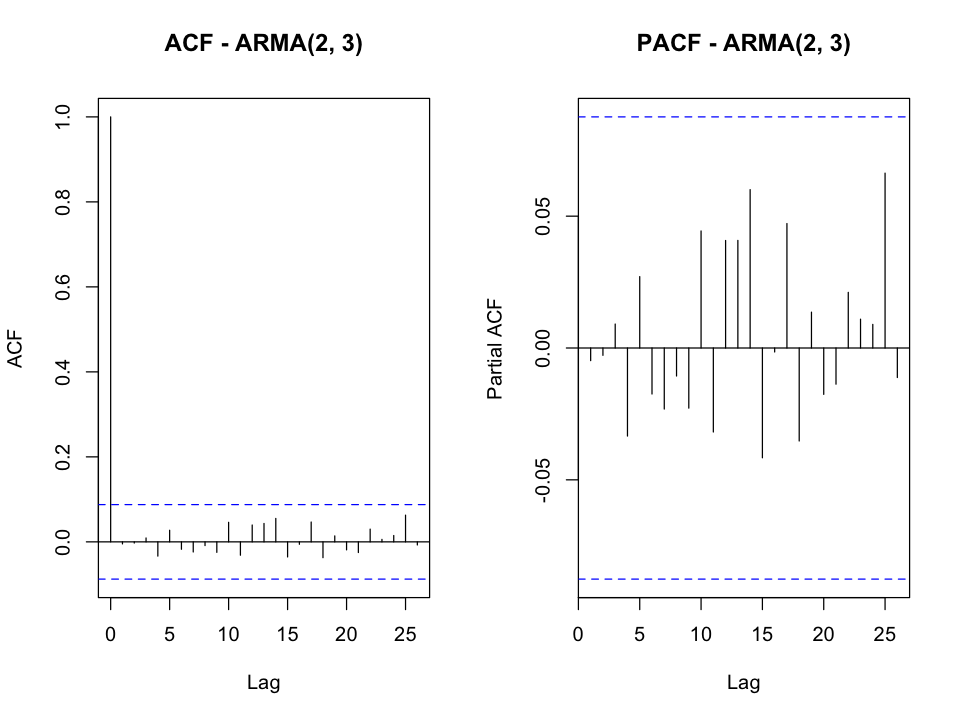

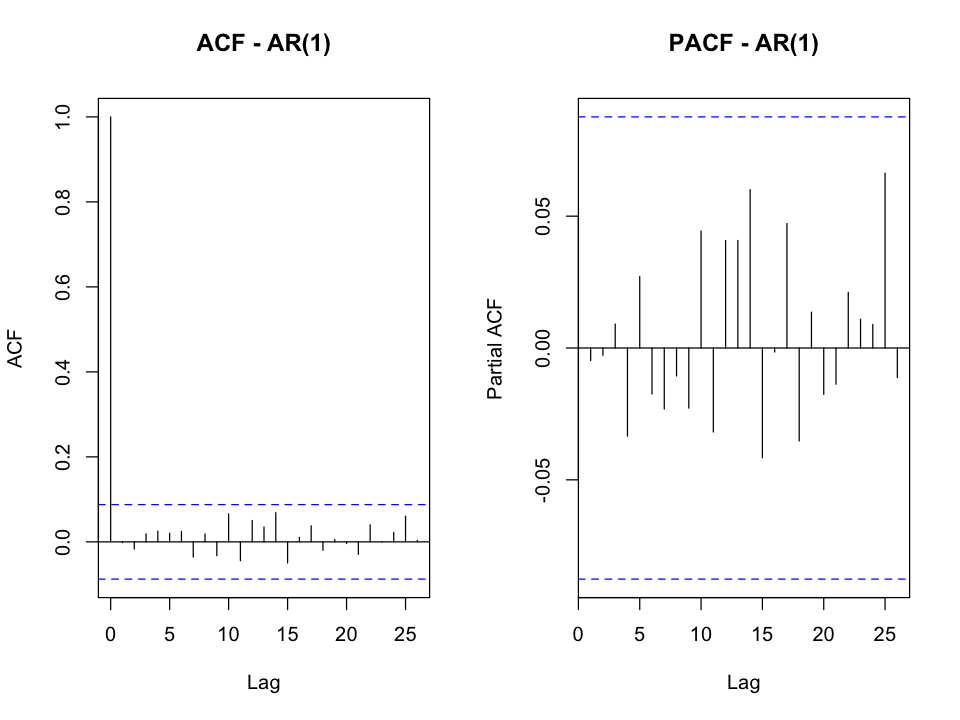

In [66]:
set.seed(2083)
ar <- arima.sim(n = 500, model = list(ar = c(0.5)))

autofit <- auto.arima(ar)
fit <- Arima(ar, order = c(1, 0, 0))

autofit
fit

par(mfrow = c(1, 2))
acf(autofit$residuals, main = 'ACF - ARMA(2, 3)')
pacf(autofit$residuals, main = 'PACF - ARMA(2, 3)')

acf(fit$residuals, main = 'ACF - AR(1)')
pacf(autofit$residuals, main = 'PACF - AR(1)')

AIC      BIC     
AR(1)      1487.751 1500.395
ARMA(2, 3) 1491.546 1516.833

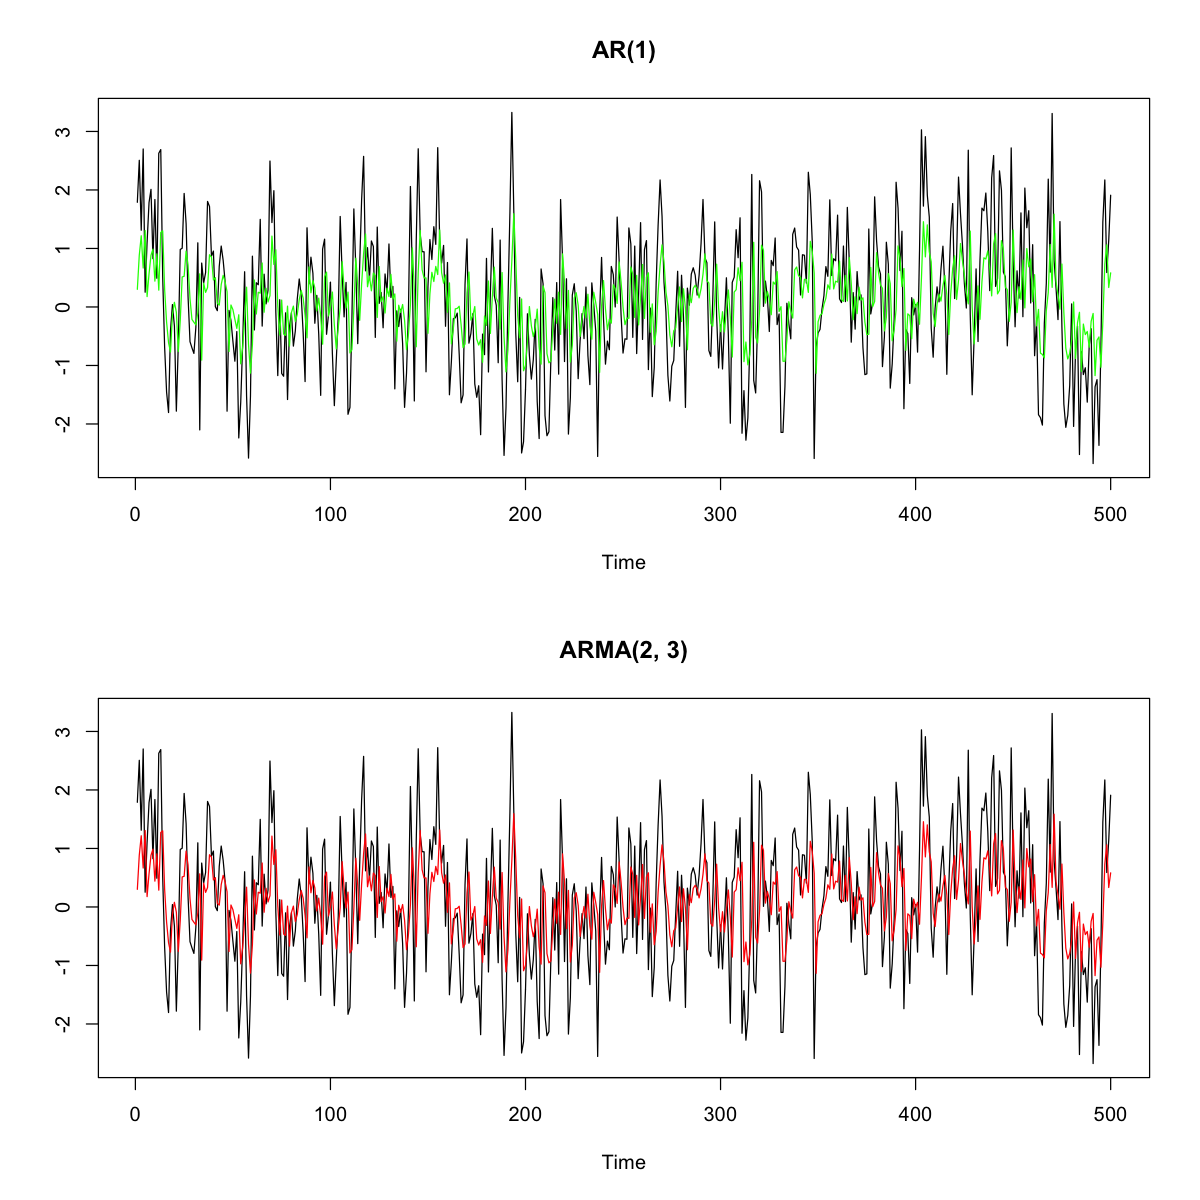

In [151]:
models <- 2
criteria <- matrix(ncol = 2, nrow = models)
colnames(criteria) <- c('AIC', 'BIC')
rownames(criteria) <- c( 'AR(1)', 'ARMA(2, 3)')

criteria[1, 1] <- fit$aic
criteria[1, 2] <- fit$bic
criteria[2, 1] <- autofit$aic
criteria[2, 2] <- autofit$bic

criteria

par(mfrow = c(2, 1))

plot.ts(ar, ylab = NA, main = 'AR(1)')
lines(fit$fitted, col = 'green')

plot.ts(ar, ylab = NA, main = 'ARMA(2, 3)')
lines(fit$fitted, col = 'red')

On this example we can see, that although the sequence is a realization of AR(1), automatical R estimation fits ARMA(2, 3). However, looking at the criteria, residuals, and fit there is no particular reason to prefer ARMA(2, 3) over AR(1).

### Addition of two processes

#### MA($q_1$) + MA($q_2$) 

Simulate realizations of MA(1) and MA(2) processes of length 500.

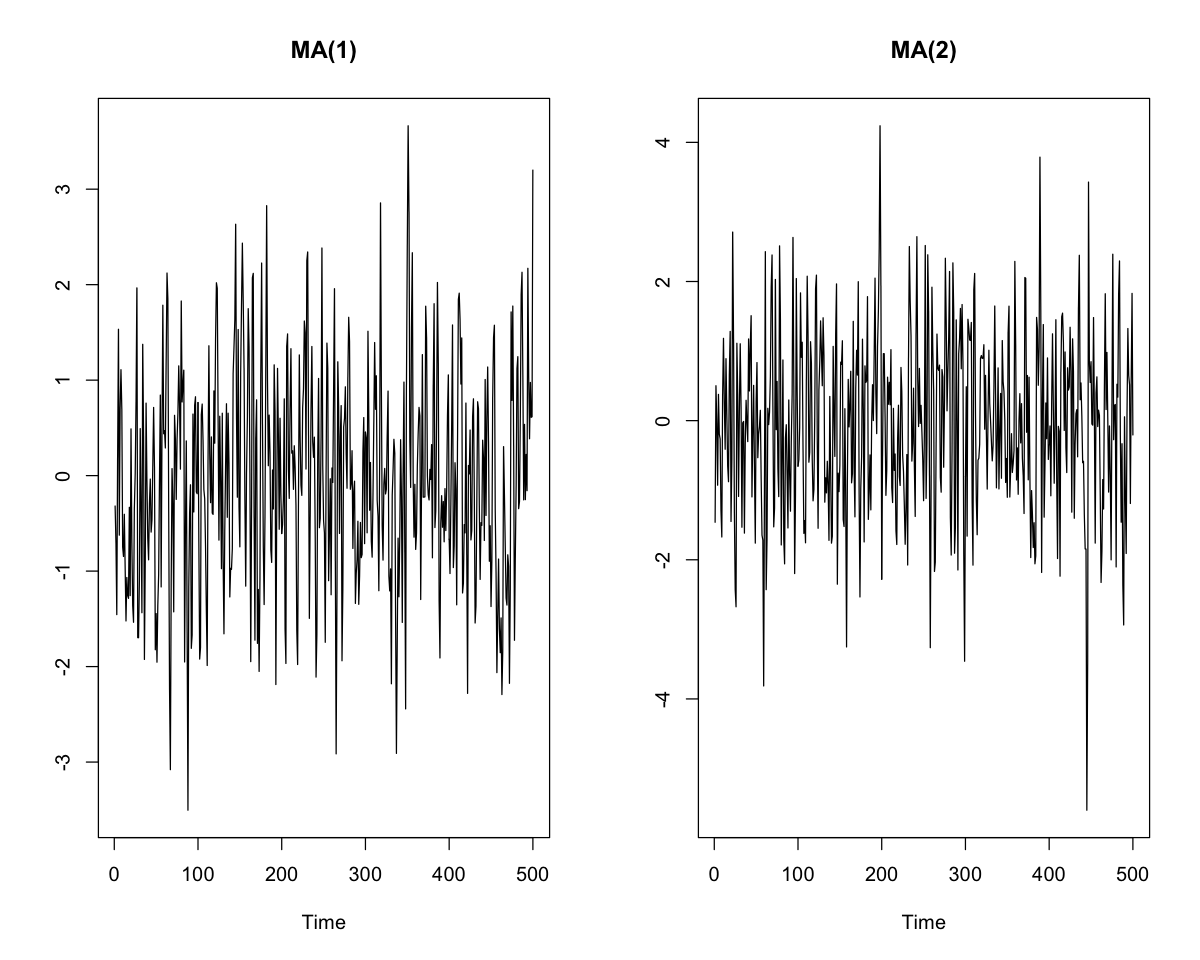

Series: ma1 
ARIMA(0,0,1) with zero mean 

Coefficients:
         ma1
      0.6443
s.e.  0.0350

sigma^2 estimated as 0.8947:  log likelihood=-681.41
AIC=1366.82   AICc=1366.85   BIC=1375.25

Series: ma2 
ARIMA(0,0,2) with zero mean 

Coefficients:
         ma1      ma2
      0.5185  -0.2409
s.e.  0.0443   0.0459

sigma^2 estimated as 1.221:  log likelihood=-758.69
AIC=1523.39   AICc=1523.44   BIC=1536.03

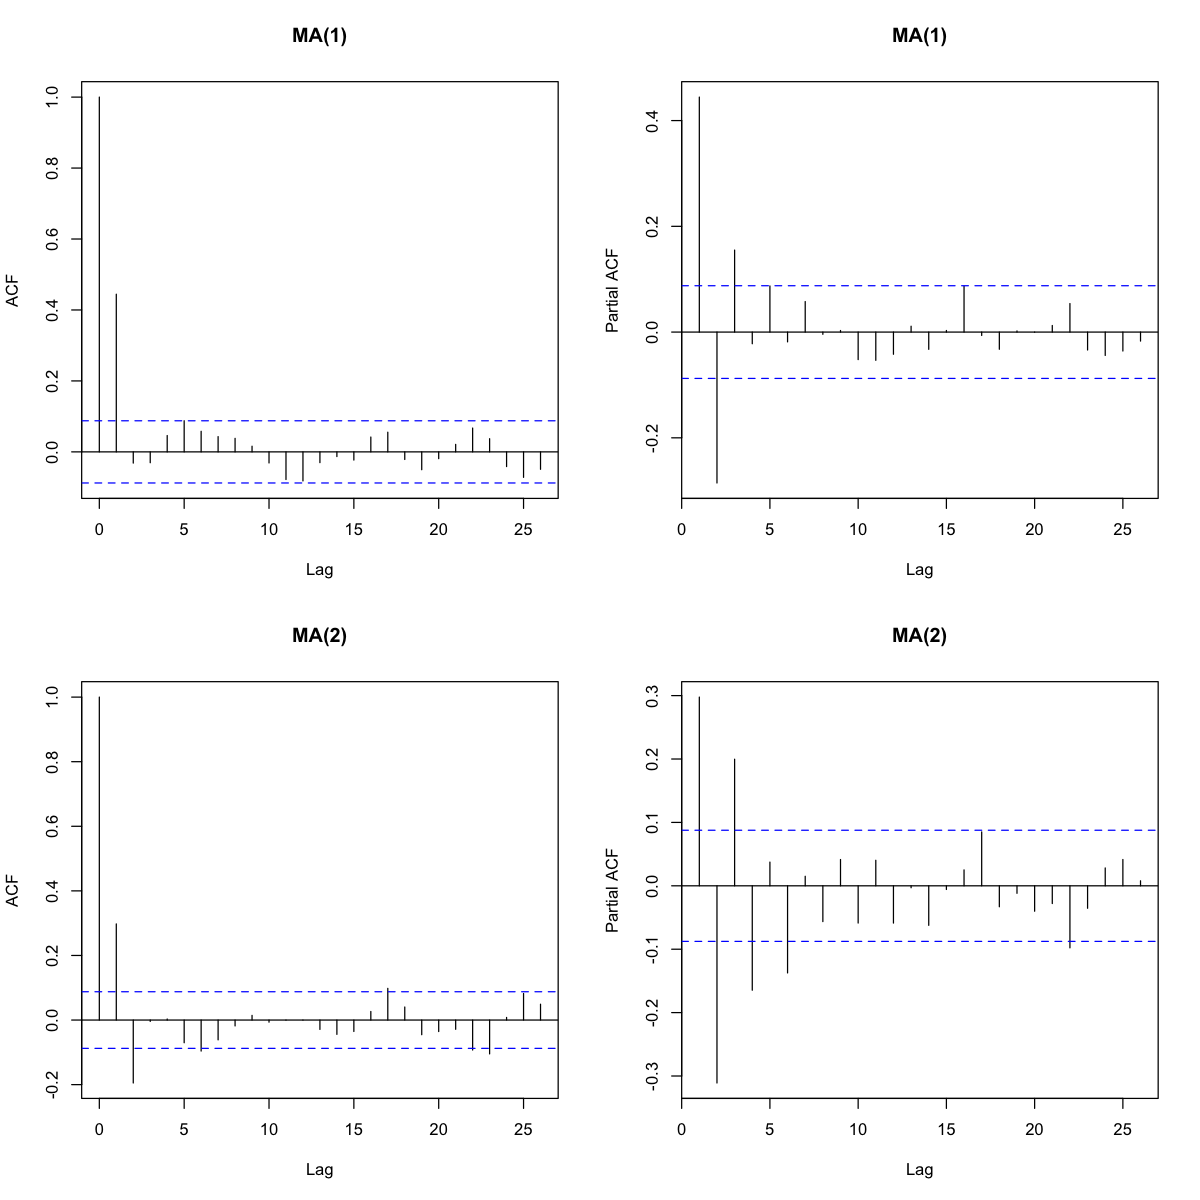

In [68]:
set.seed(1450)
ma1 <- arima.sim(n = 500, model = list(ma = 0.6))
ma2 <- arima.sim(n = 500, model = list(ma = c(0.7, -0.5)))

options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow = c(1, 2))
plot.ts(ma1, ylab = NA, main = 'MA(1)')
plot.ts(ma2, ylab = NA, main = 'MA(2)')

options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2, 2))
acf(ma1, main = 'MA(1)')
pacf(ma1, main = 'MA(1)')

acf(ma2, main = 'MA(2)')
pacf(ma2, main = 'MA(2)')

auto.arima(ma1)
auto.arima(ma2)

Now sum these two simulated processes. What will be the properties of the resulting process?

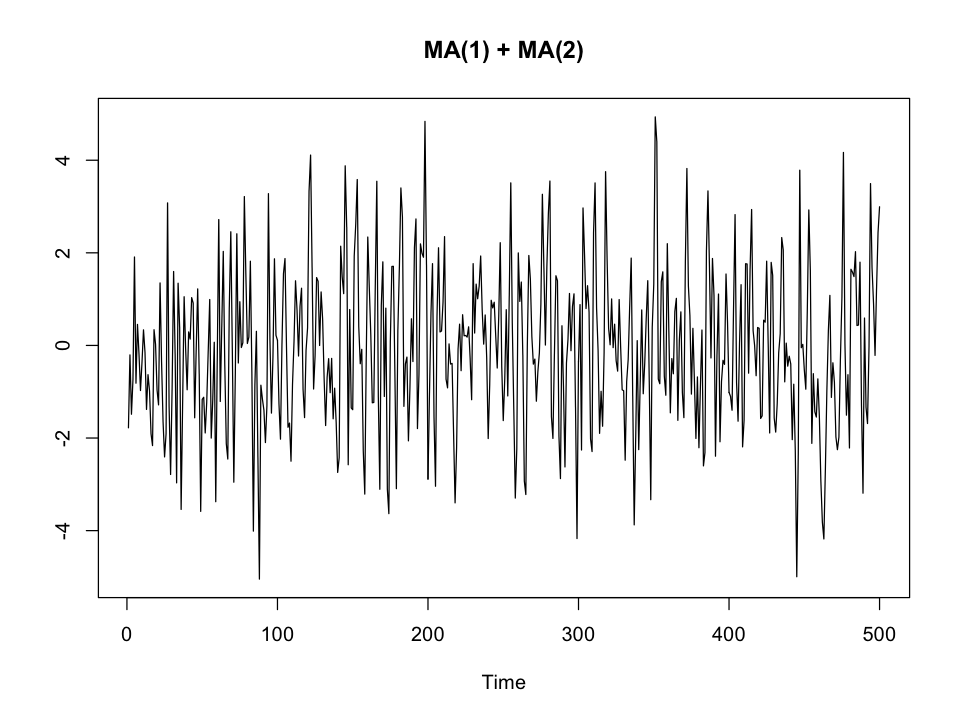

Series: MA 
ARIMA(0,0,2) with zero mean 

Coefficients:
         ma1      ma2
      0.5419  -0.1628
s.e.  0.0457   0.0474

sigma^2 estimated as 2.197:  log likelihood=-905.48
AIC=1816.97   AICc=1817.01   BIC=1829.61

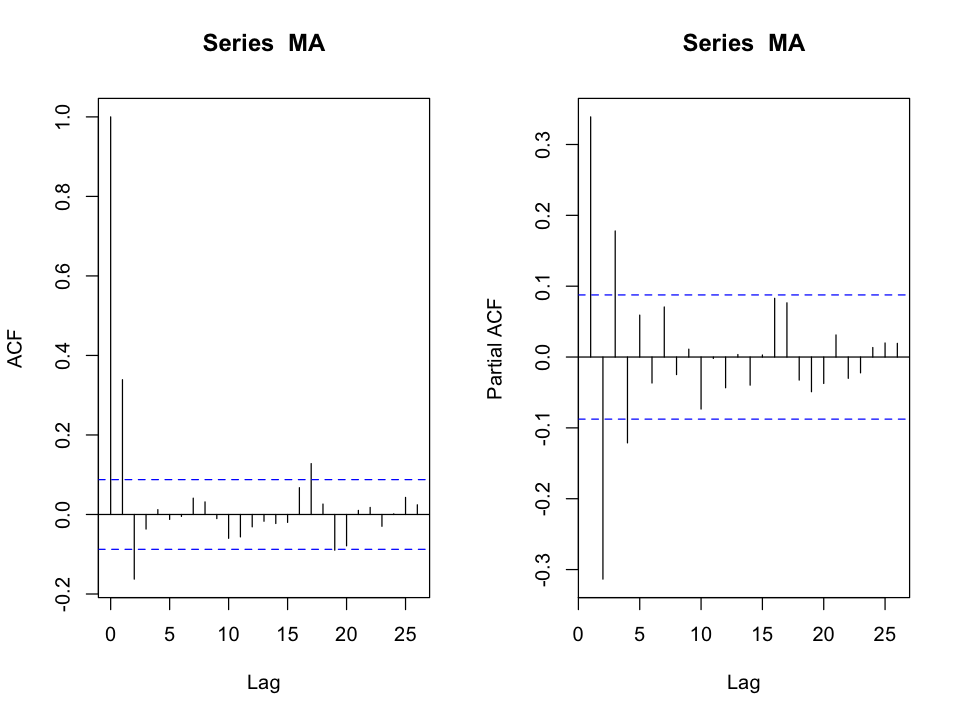

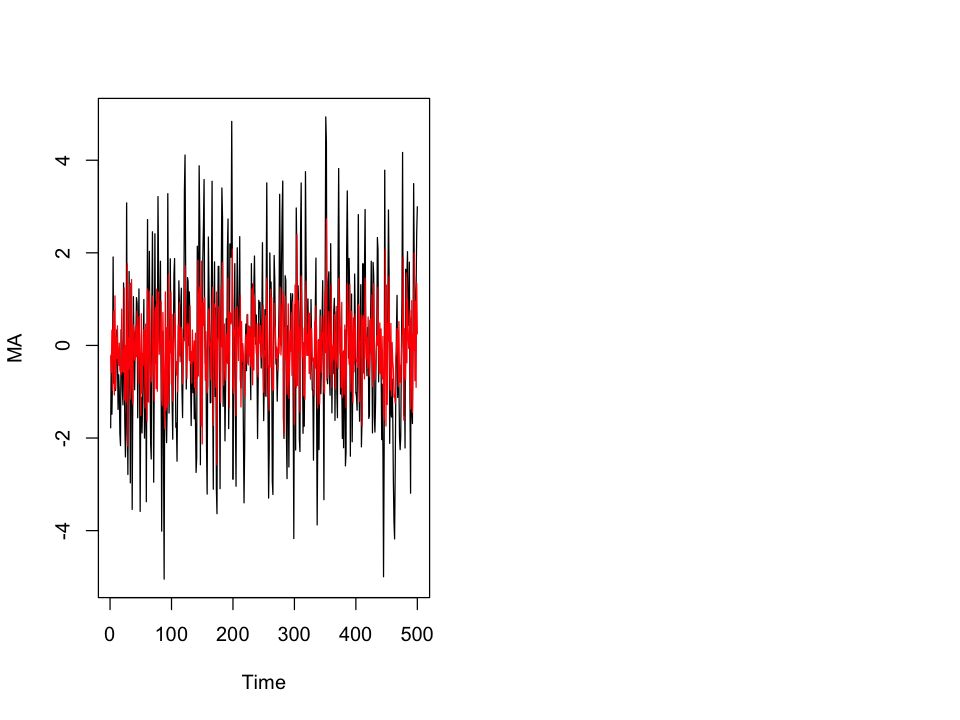

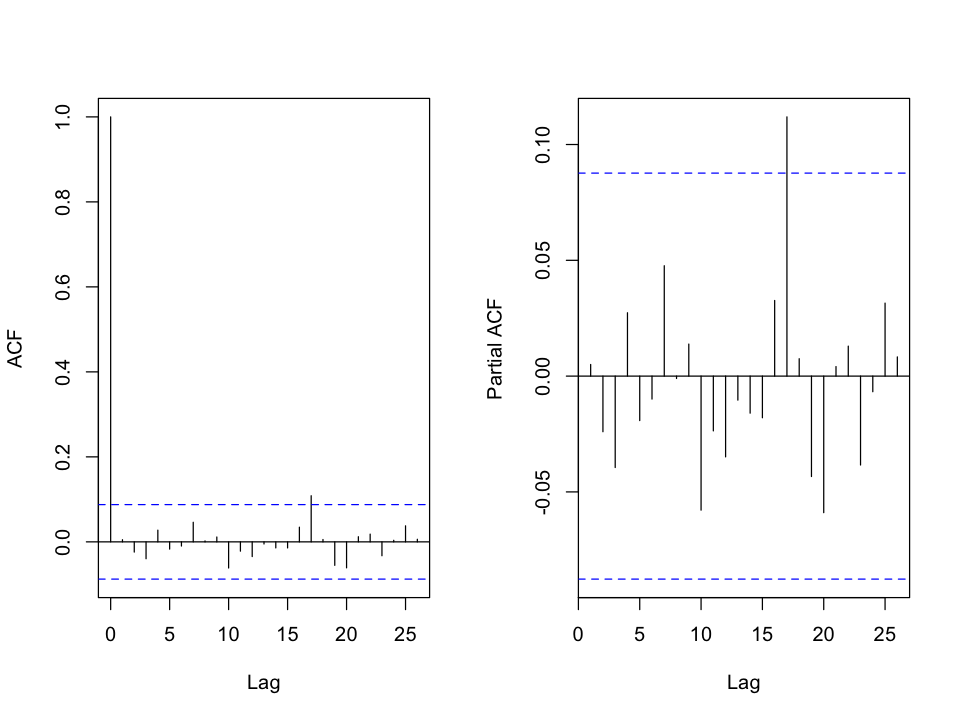

In [69]:
MA <- ma1 + ma2

options(repr.plot.width = 8, repr.plot.height = 6)
plot.ts(MA, ylab = NA, main = 'MA(1) + MA(2)')

par(mfrow = c(1, 2))
acf(MA)
pacf(MA)

MAfit <- auto.arima(MA)
MAfit

plot.ts(MA)
lines(MAfit$fitted, col = 'red')

par(mfrow = c(1,2))
acf(MAfit$residuals, main = NA)
pacf(MAfit$residuals, main = NA)

If we sum $MA(q_1)$, and $MA(q_2)$ process, the resulting process will be $MA(max \{ q_1, q_2 \})$. In this particular case, we get a very decent fit by the MA(2) from the automatic fitting function.

#### AR(p) + AR(q)

Simulate realizations of two AR(1) processes with coefficients 0.5 and 0.4.

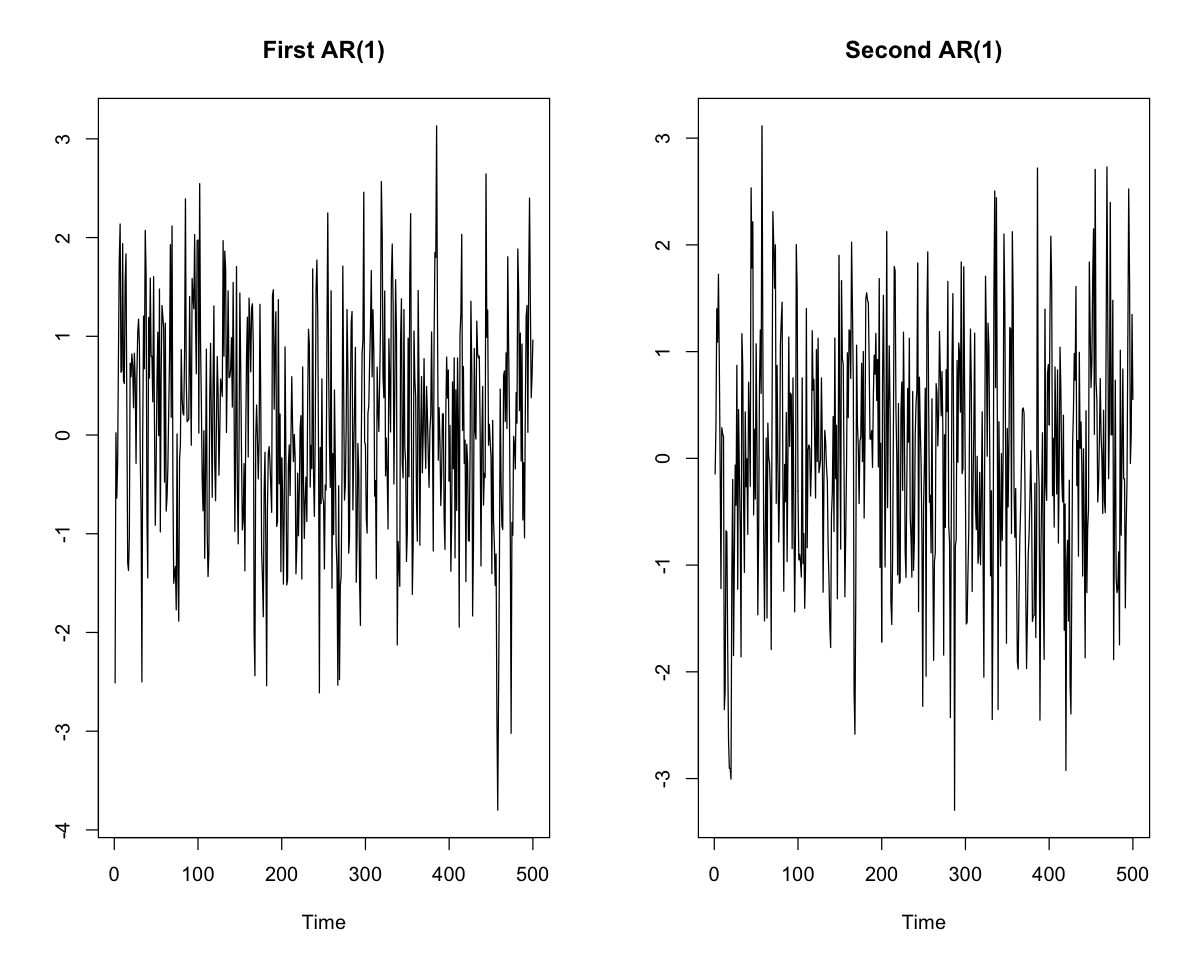

Series: ar1 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.4321
s.e.  0.0405

sigma^2 estimated as 0.9382:  log likelihood=-693.11
AIC=1390.23   AICc=1390.25   BIC=1398.65

Series: ar2 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.3757
s.e.  0.0414

sigma^2 estimated as 1.059:  log likelihood=-723.44
AIC=1450.88   AICc=1450.91   BIC=1459.31

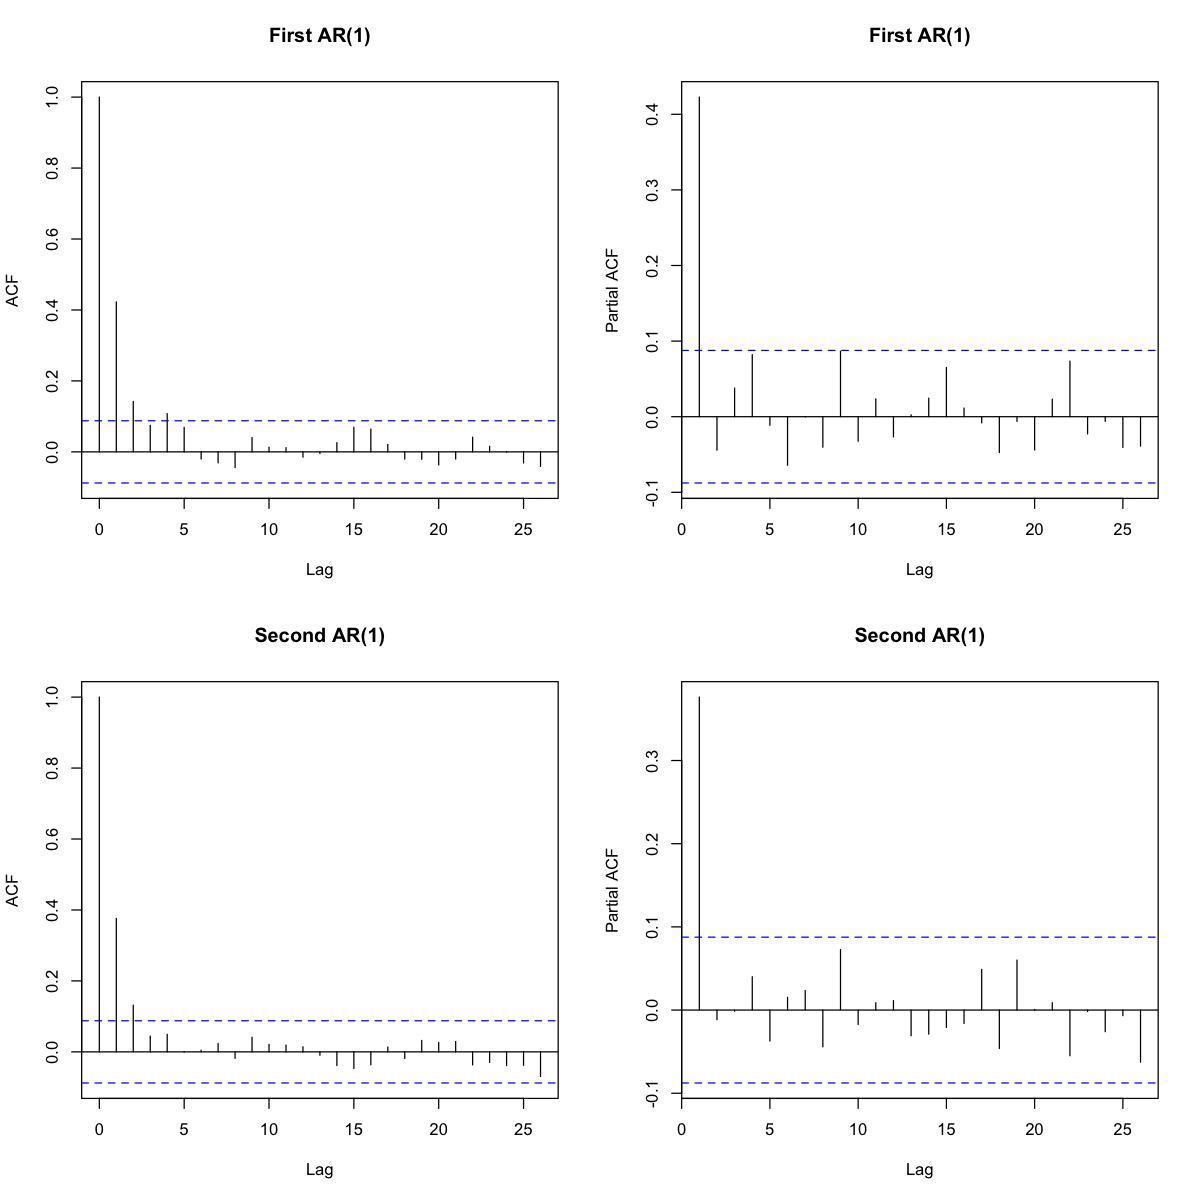

In [70]:
set.seed(5683)
ar1 <- arima.sim(n = 500, model = list(ar = 0.5))
ar2 <- arima.sim(n = 500, model = list (ar = 0.4))

options(repr.plot.width = 10, repr.plot.height = 8)
par(mfrow = c(1, 2))
plot.ts(ar1, ylab = NA, main = 'First AR(1)')
plot.ts(ar2, ylab = NA, main = 'Second AR(1)')

options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2, 2))
acf(ar1, main = 'First AR(1)')
pacf(ar1, main = 'First AR(1)')

acf(ar2, main = 'Second AR(1)')
pacf(ar2, main = 'Second AR(1)')

auto.arima(ar1)
auto.arima(ar2)

Now sum these two processes. What will be the result?

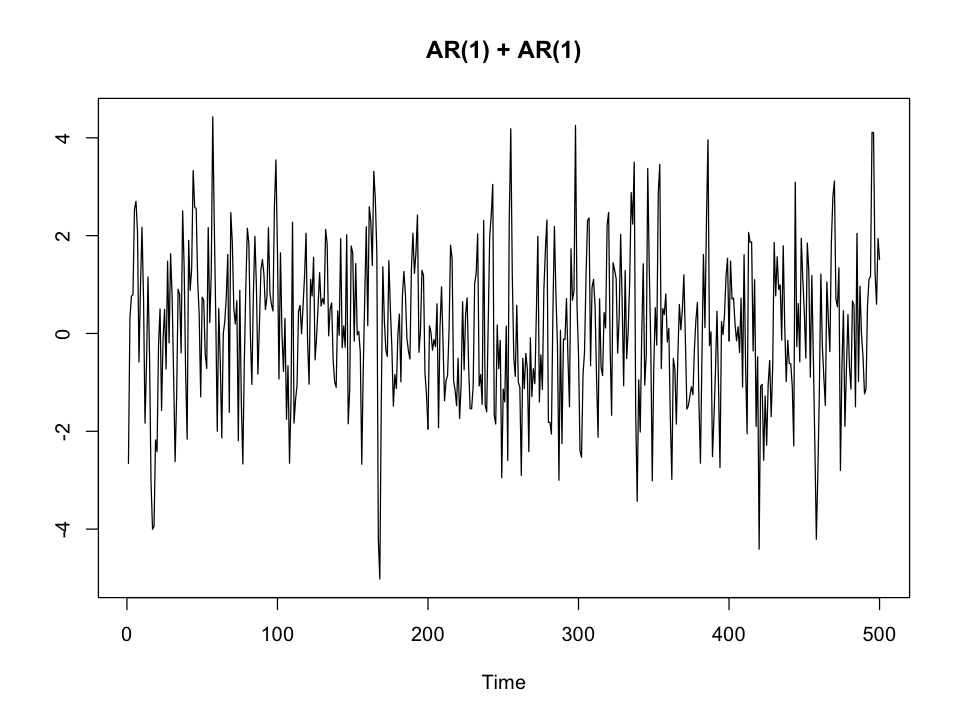

Series: AR 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      1.2252  -0.3566  -0.8362
s.e.  0.1307   0.0544   0.1302

sigma^2 estimated as 2.043:  log likelihood=-886.67
AIC=1781.34   AICc=1781.42   BIC=1798.2

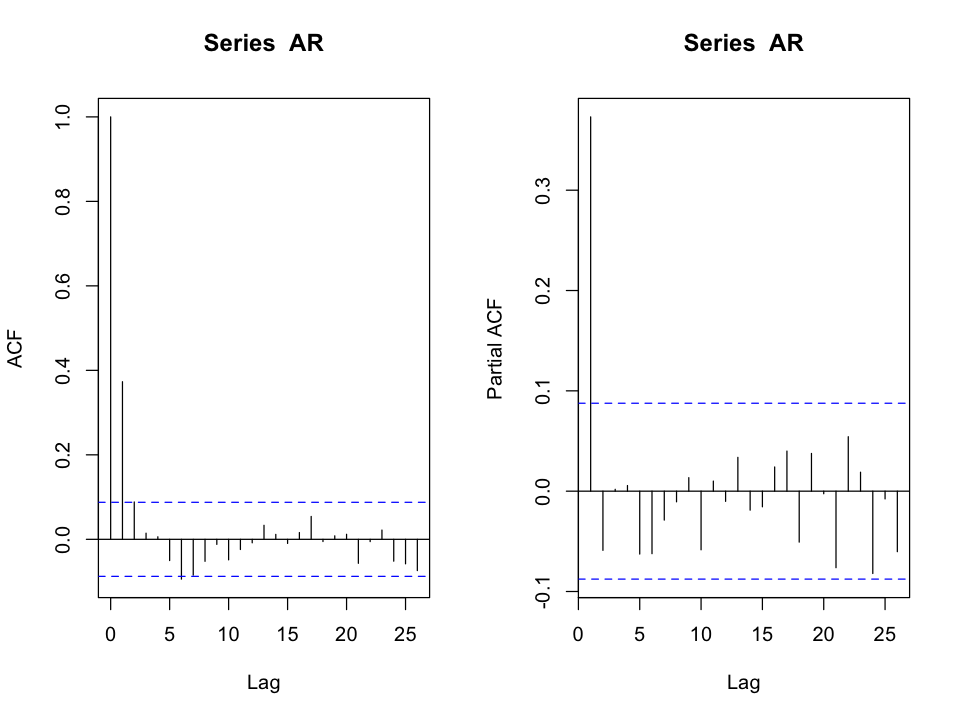

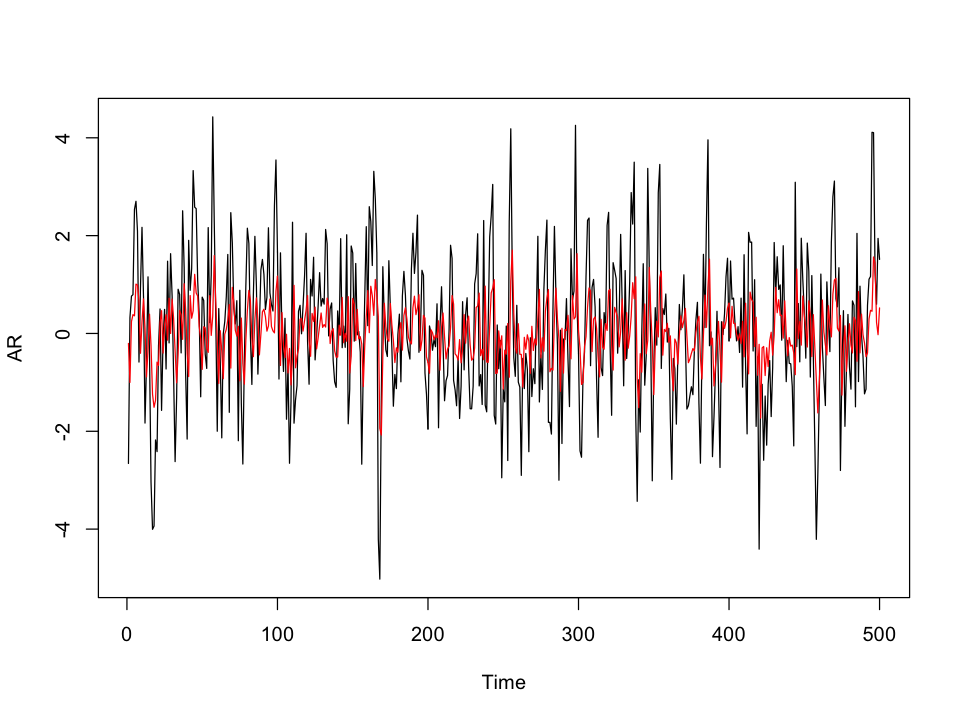

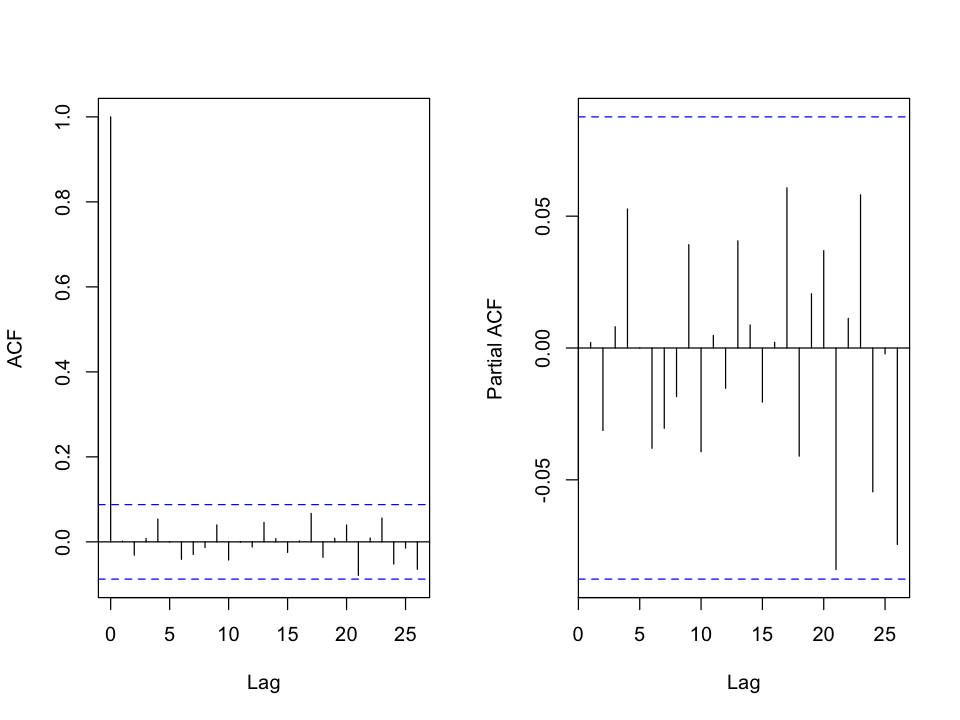

In [71]:
AR <- ar1 + ar2

options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow = c(1, 1))
plot.ts(AR, ylab = NA, main = 'AR(1) + AR(1)')

par(mfrow = c(1, 2))
acf(AR)
pacf(AR)

ARfit <- auto.arima(AR)
ARfit

par(mfrow = c(1, 1))
plot.ts(AR)
lines(ARfit$fitted, col = 'red')

par(mfrow = c(1, 2))
acf(ARfit$residuals, main = NA)
pacf(ARfit$residuals, main = NA)

If $AR(p_1)$ nad $AR(p_2)$ processes are summed, the resulting process is $ARMA(p_1 + p_2, max \{ p_1, p_2 \})$.

### Over-differencing

Simulate a realization of AR(2) process with $\phi_1 = 1.5$, $\phi_2 = -0.5$.

In [72]:
set.seed(555)
y <- arima.sim(n = 500, model = list(ar = c(1.5, -0.5)))
plot.ts(y, ylab = NA)

ERROR: Error in arima.sim(n = 500, model = list(ar = c(1.5, -0.5))): 'ar' part of model is not stationary


The pre-built function won't let us do the simulation, as the process wouldn't be stationary. We have to perform the simulation ourselves.


	Augmented Dickey-Fuller Test

data:  y
Dickey-Fuller = -1.561, Lag order = 1, p-value = 0.7641
alternative hypothesis: stationary


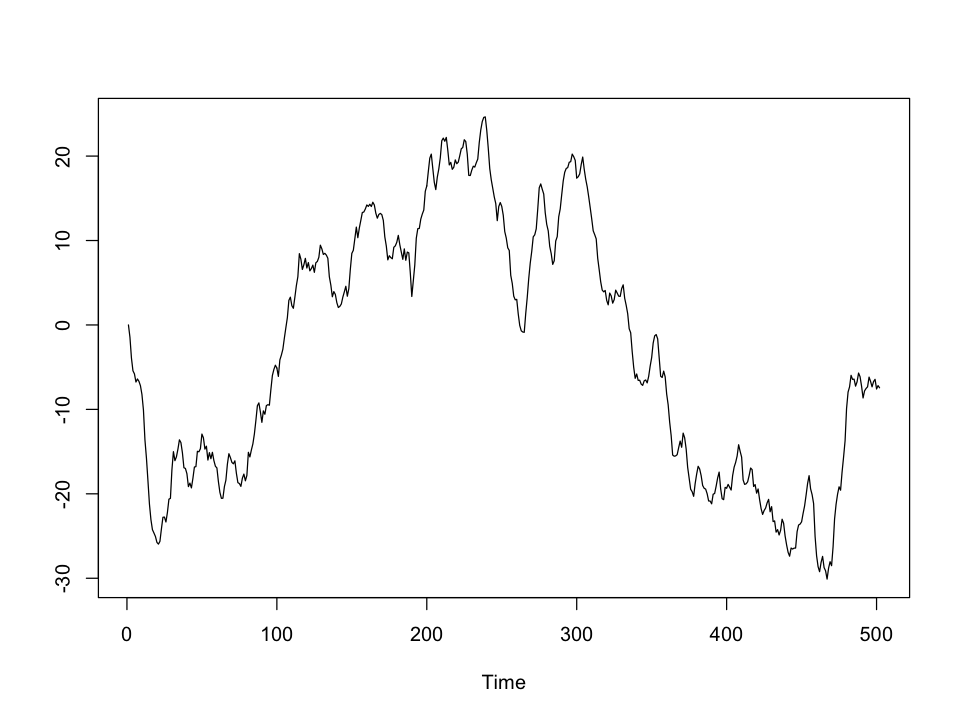

In [74]:
set.seed(355)
l <- 502
e <- rnorm(l)
y <- vector()
phi1 <- 1.5
phi2 <- -0.5
y[1] <- 0
y[2] <- phi1 * e[1]
for (i in 3 : l){
    y[i] <- phi1 * y[i - 1] + phi2 * y[i - 2] + e[i]
}

plot.ts(y, ylab = NA)

adf.test(y, k = 1)

Non-stationarity is not rejected. Common procedure in such cases is to remove non-stationarity by differencing. Compute first and second difference.

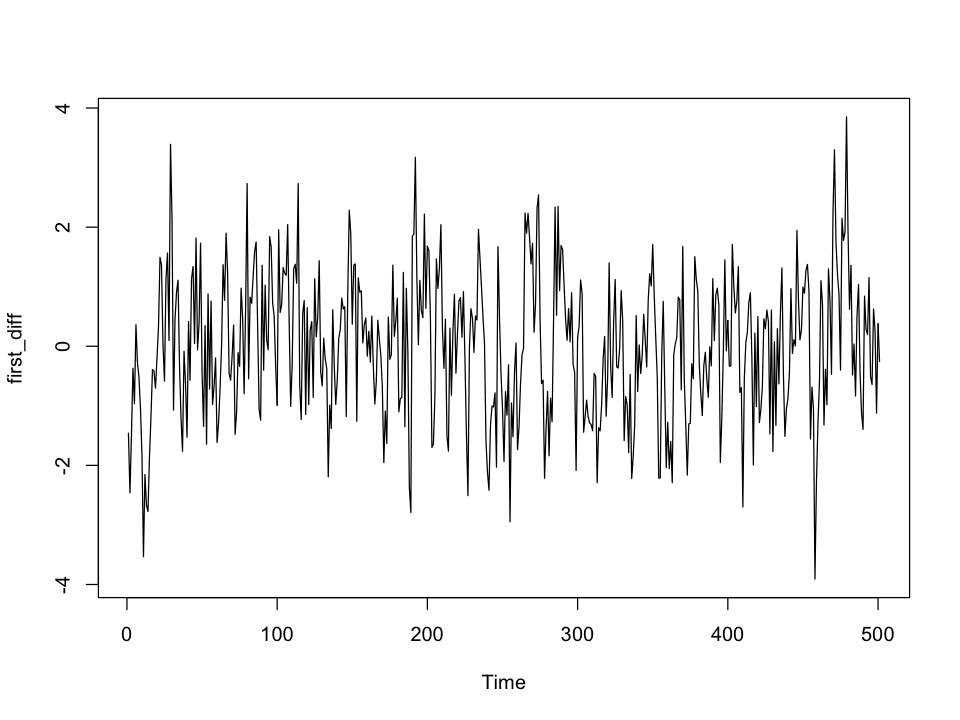

Warning message in adf.test(first_diff, k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  first_diff
Dickey-Fuller = -10.516, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(second_diff, k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  second_diff
Dickey-Fuller = -22.212, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


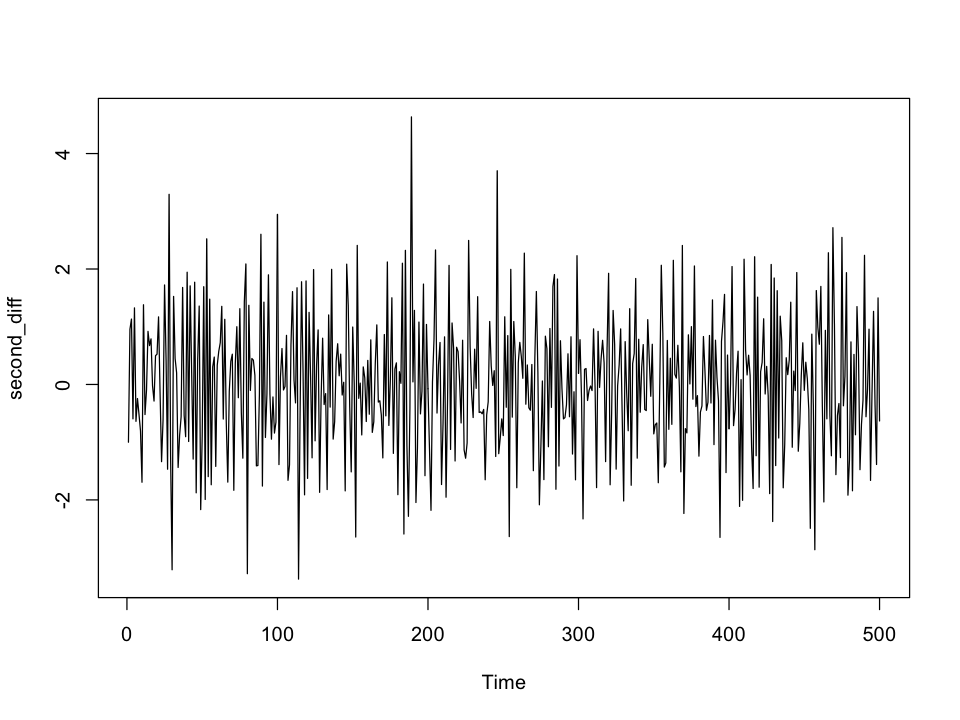

In [75]:
first_diff <- diff(y)
second_diff <- diff(y, differences = 2)

plot.ts(first_diff)
plot.ts(second_diff)

adf.test(first_diff, k = 1)
adf.test(second_diff, k = 1)

ADF test suggest stationarity of both first and second difference. Let's see how we would estimate each series.

In [76]:
fit_y <- auto.arima(y)
fit_y

fit_fd <- auto.arima(first_diff)
fit_fd

autofit_sd <- auto.arima(second_diff)
autofit_sd

Series: y 
ARIMA(2,1,0) 

Coefficients:
         ar1     ar2
      0.4388  0.0879
s.e.  0.0444  0.0446

sigma^2 estimated as 1.106:  log likelihood=-735.27
AIC=1476.54   AICc=1476.59   BIC=1489.19

Series: first_diff 
ARIMA(2,0,0) with zero mean 

Coefficients:
         ar1     ar2
      0.4388  0.0879
s.e.  0.0444  0.0446

sigma^2 estimated as 1.106:  log likelihood=-735.27
AIC=1476.54   AICc=1476.59   BIC=1489.19

Series: second_diff 
ARIMA(0,0,2) with non-zero mean 

Coefficients:
          ma1      ma2    mean
      -0.5634  -0.3093  0.0024
s.e.   0.0507   0.0681  0.0063

sigma^2 estimated as 1.193:  log likelihood=-752.74
AIC=1513.47   AICc=1513.55   BIC=1530.33

Is this "correct"? Examine the individual processes.

The **original process** is AR(2) with unit-root 

$$y_t = 1.5 y_{t-1} - 0.5 y_{t-2} + \epsilon_t .$$

After **first differencing** 

$$y_t - y_{t-1} = \Delta y_t = 1.5 y_{t-1} - 0.5 y_{t-2} + \epsilon_t - y_{t-1} = 0.5 y_{t-1} - 0.5 y_{t-2} + \epsilon_t \\ = 0.5 \Delta y_{t-1} + \epsilon_t.$$

Hence, first differenced series becomes an AR(1) process with $\phi_1 = 0.5$. 

Subtract $\Delta y_{t-1}$ to obtain **second difference**. 

Hint: After subtracting $\Delta y_{t-1}$, express $\Delta y_{t-1}$ in terms of $\Delta y_{t-2}$ and epsilon using the first differenced formula.

$$ \Delta y_t - \Delta y_{t-1} = \Delta^2 y_t = 0.5 \Delta y_{t-1} + \epsilon_t - \Delta y_{t-1} = 0.5 \Delta y_{t-1} + \epsilon_t - 0.5 \Delta y_{t-2} - \epsilon_{t-1} \\ = 0.5 \Delta^2 y_{t-1} + \epsilon_t - \epsilon_{t-1}.$$

Hence the over-differenced series is an ARMA(1, 1), and has an invertible error-term.

Series: second_diff 
ARIMA(1,0,1) with zero mean 

Coefficients:
         ar1      ma1
      0.4836  -1.0000
s.e.  0.0393   0.0081

sigma^2 estimated as 1.117:  log likelihood=-738.66
AIC=1483.33   AICc=1483.38   BIC=1495.97

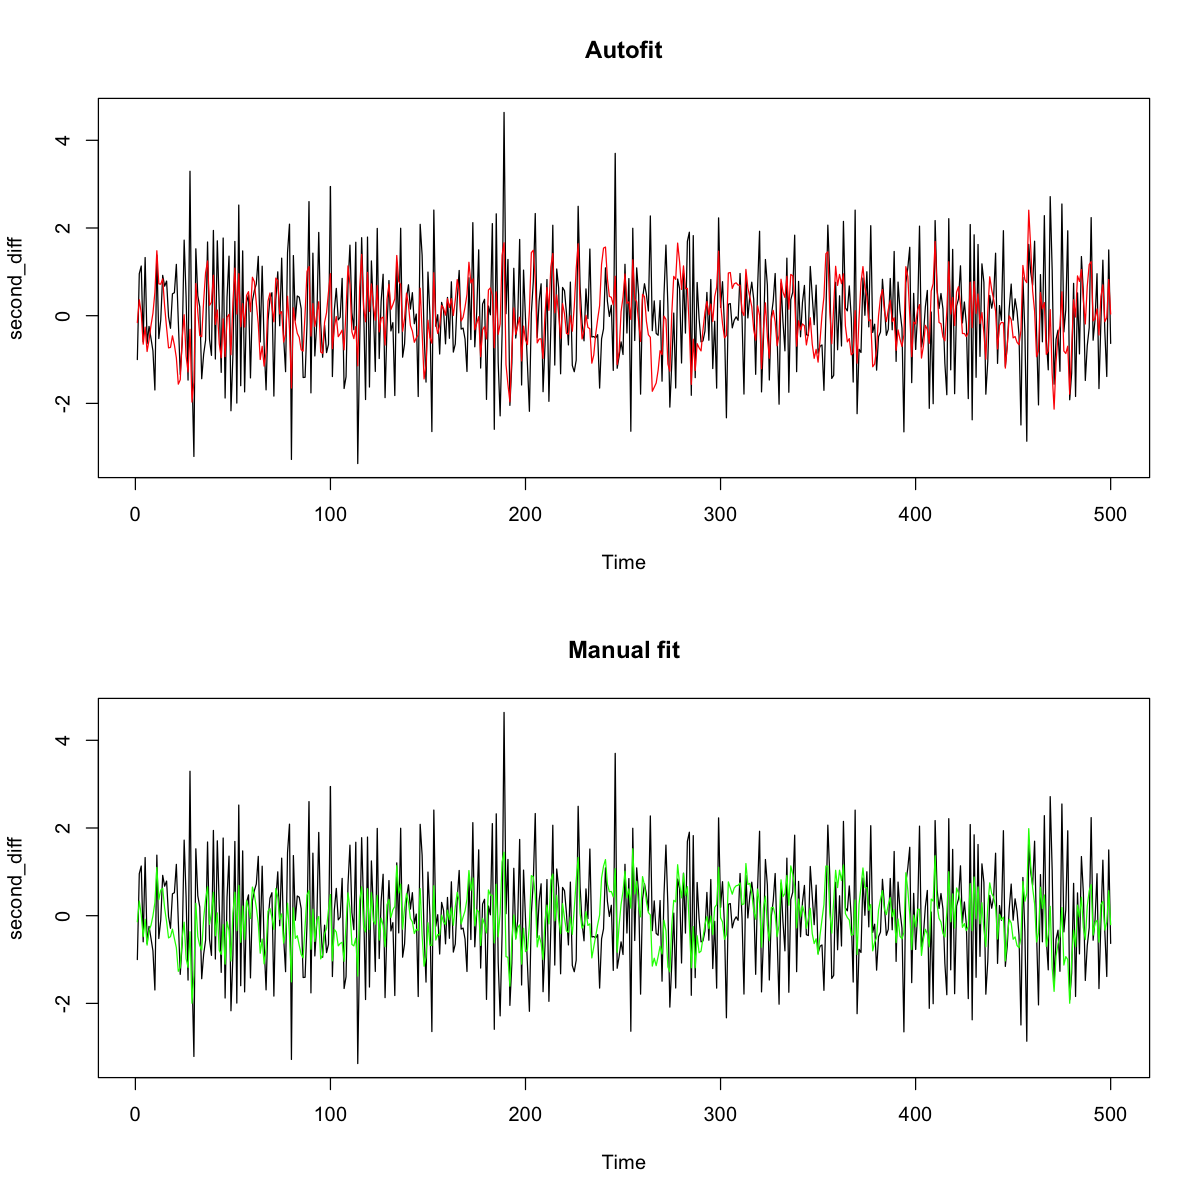

In [77]:
fit_sd <- Arima(second_diff, order = c(1, 0 , 1), include.mean = FALSE)
fit_sd

options(repr.plot.width = 10, repr.plot.height = 10)
par(mfrow = c(2, 1))
plot.ts(second_diff, main = 'Autofit')
lines(autofit_sd$fitted, col = 'red')
plot.ts(second_diff, main = 'Manual fit')
lines(fit_sd$fitted, col = 'green')

### Common factor problem

Consider a process
$$y_t = 0.4 y_{t -1} + 0.45 y_{t - 2} + \epsilon_t + \epsilon_{t - 1} + 0.25 \epsilon_{t - 2}.$$
In the lag operator form, we have 
$$(1 - 0.4 L - 0.45 L^2)y_t = (1 + L + 0.25 L^2) \epsilon_t.$$

Let's simulate this ARMA(2, 2) process

In [78]:
set.seed(389745847)
phi1 <- .4
phi2 <- .45
theta1 <- 1
theta2 <- .25
T <- 1000
O <- 2
eps <- rnorm(T + O)
arma22 <- vector()
arma22[1] <- 0
arma22[2] <- 0
for (t in (O + 1): (T + O)){
    arma22[t] <- phi1 * arma22[t - 1] + phi2 * arma22[t - 2] + eps[t] + theta1 * eps[t - 1] + theta2 * eps[t - 2]
}

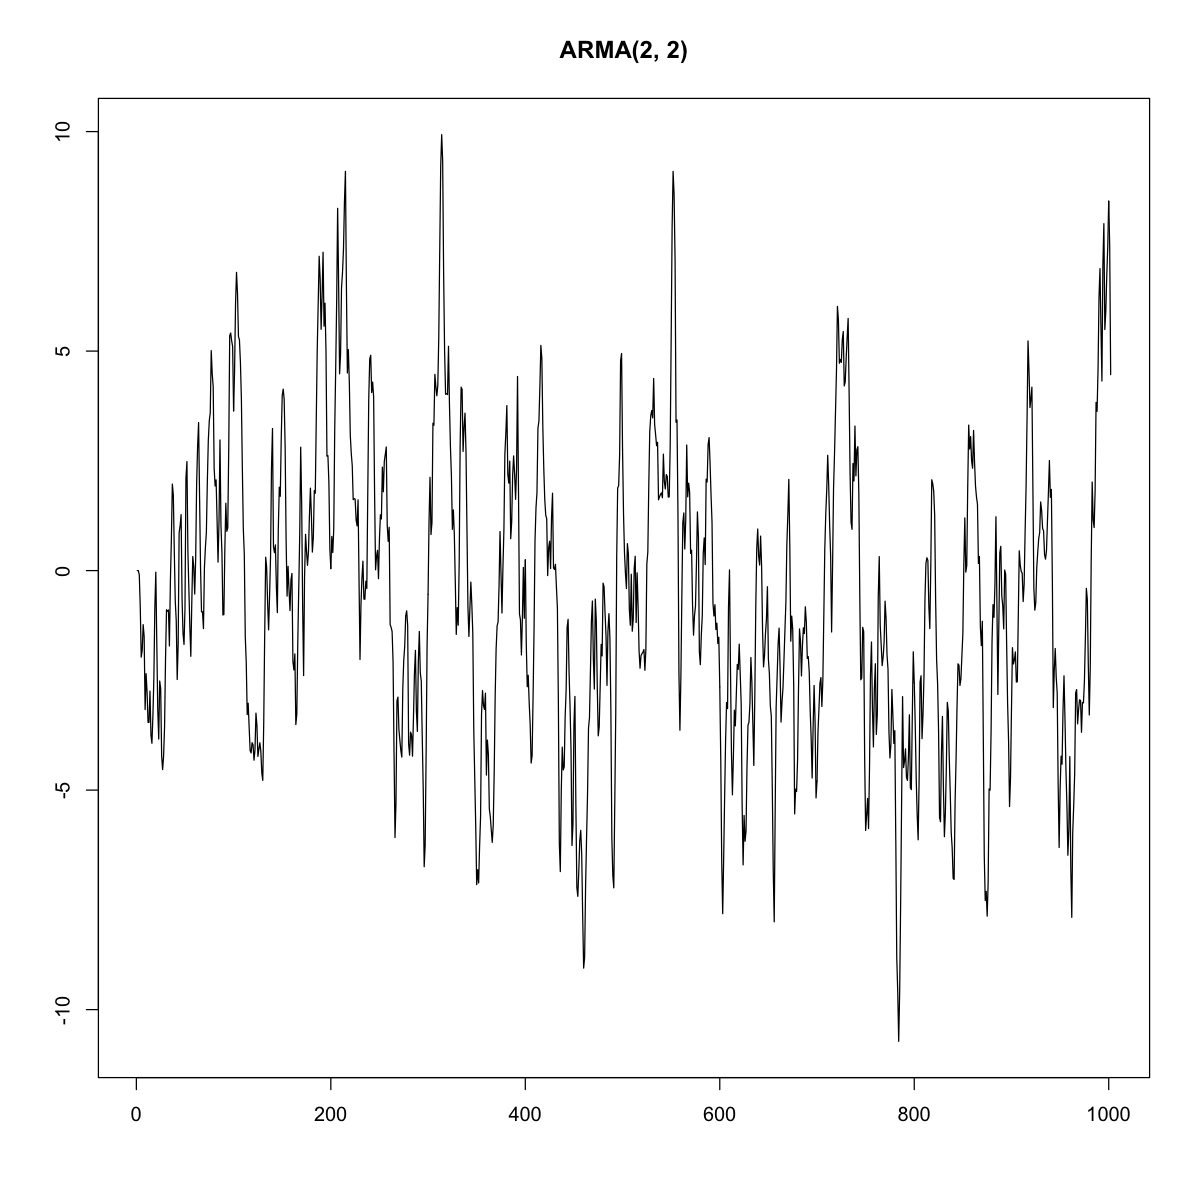

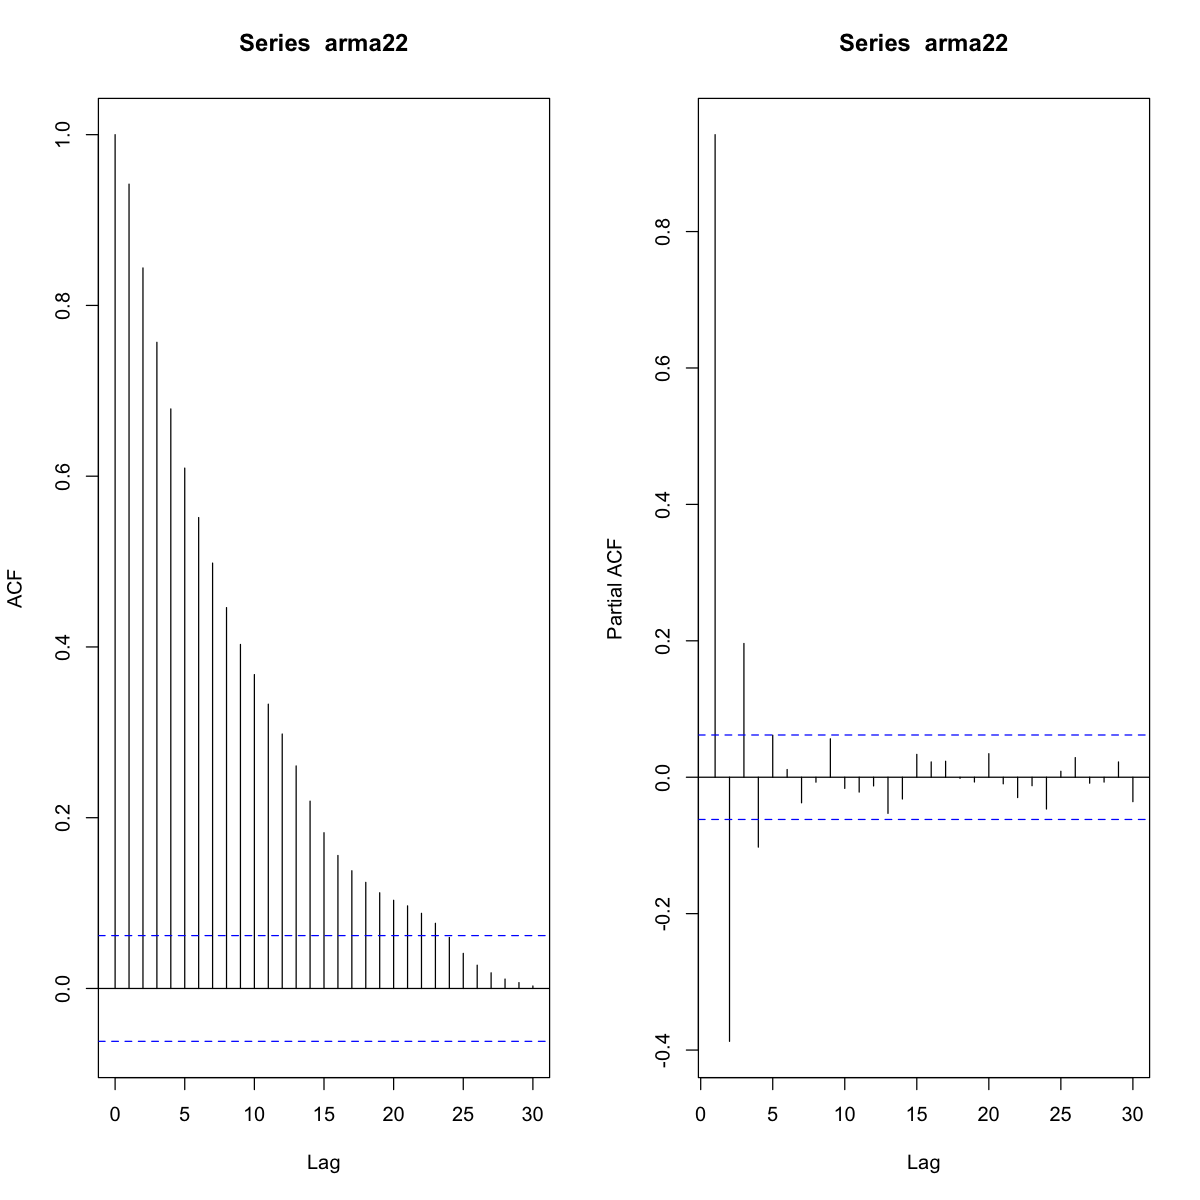

In [79]:
plot.ts(arma22, main = 'ARMA(2, 2)', ylab = NA, xlab = NA)
par(mfrow = c(1, 2))
acf(arma22)
pacf(arma22)

The associated polynomials have a common factor, we can write
$$(1 - 0.4 L - 0.45 L^2)y_t = (1 + 0.5L)(1 - 0.9L)y_t,$$
and
$$(1 + L + 0.25 L^2) \epsilon_t = (1 + 0.5L) (1 + 0.5L) \epsilon_t.$$
The common factor $(1 + 0.5L)$ can be cancelled, hence we have
$$(1 - 0.9L)y_t = (1 + 0.5L) \epsilon_t,$$
which is an ARMA(1, 1). Let us simulate that too.

In [80]:
set.seed(389745847)
phi1 <- .9
theta1 <- .5
T <- 1000
O <- 2
eps <- rnorm(T + O)
arma11 <- vector()
arma11[1] <- 0
arma11[2] <- 0
for (t in (O + 1): (T + O)){
    arma11[t] <- phi1 * arma11[t - 1] + eps[t] + theta1 * eps[t - 1] 
}

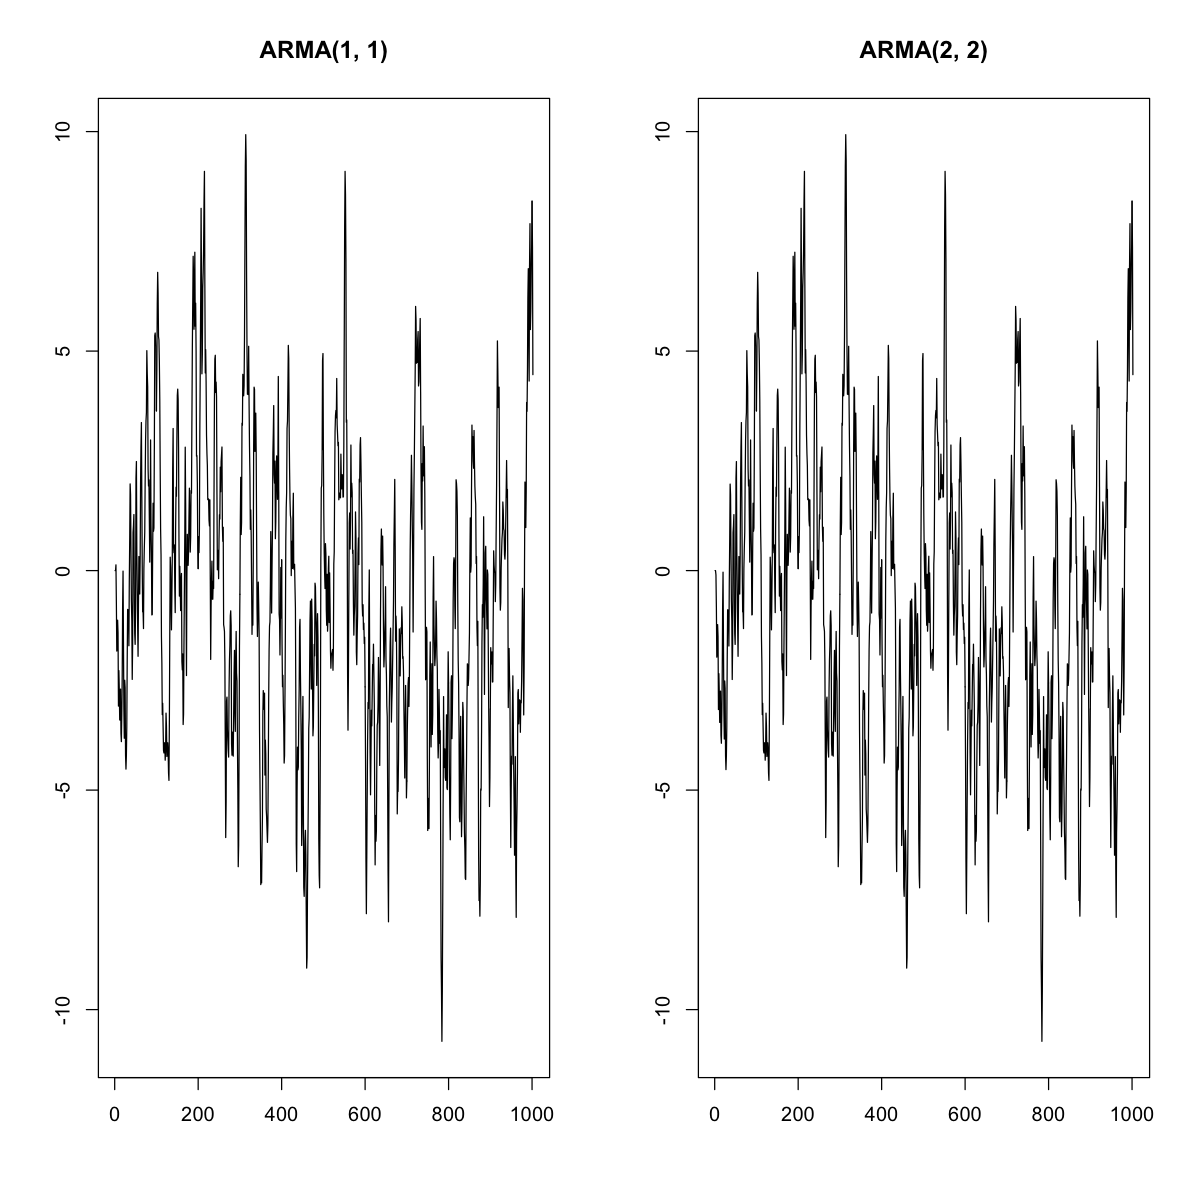

In [81]:
par(mfrow = c(1,2))
plot.ts(arma11, main = 'ARMA(1, 1)', ylab = NA, xlab = NA)
plot.ts(arma22, main = 'ARMA(2, 2)', ylab = NA, xlab = NA)

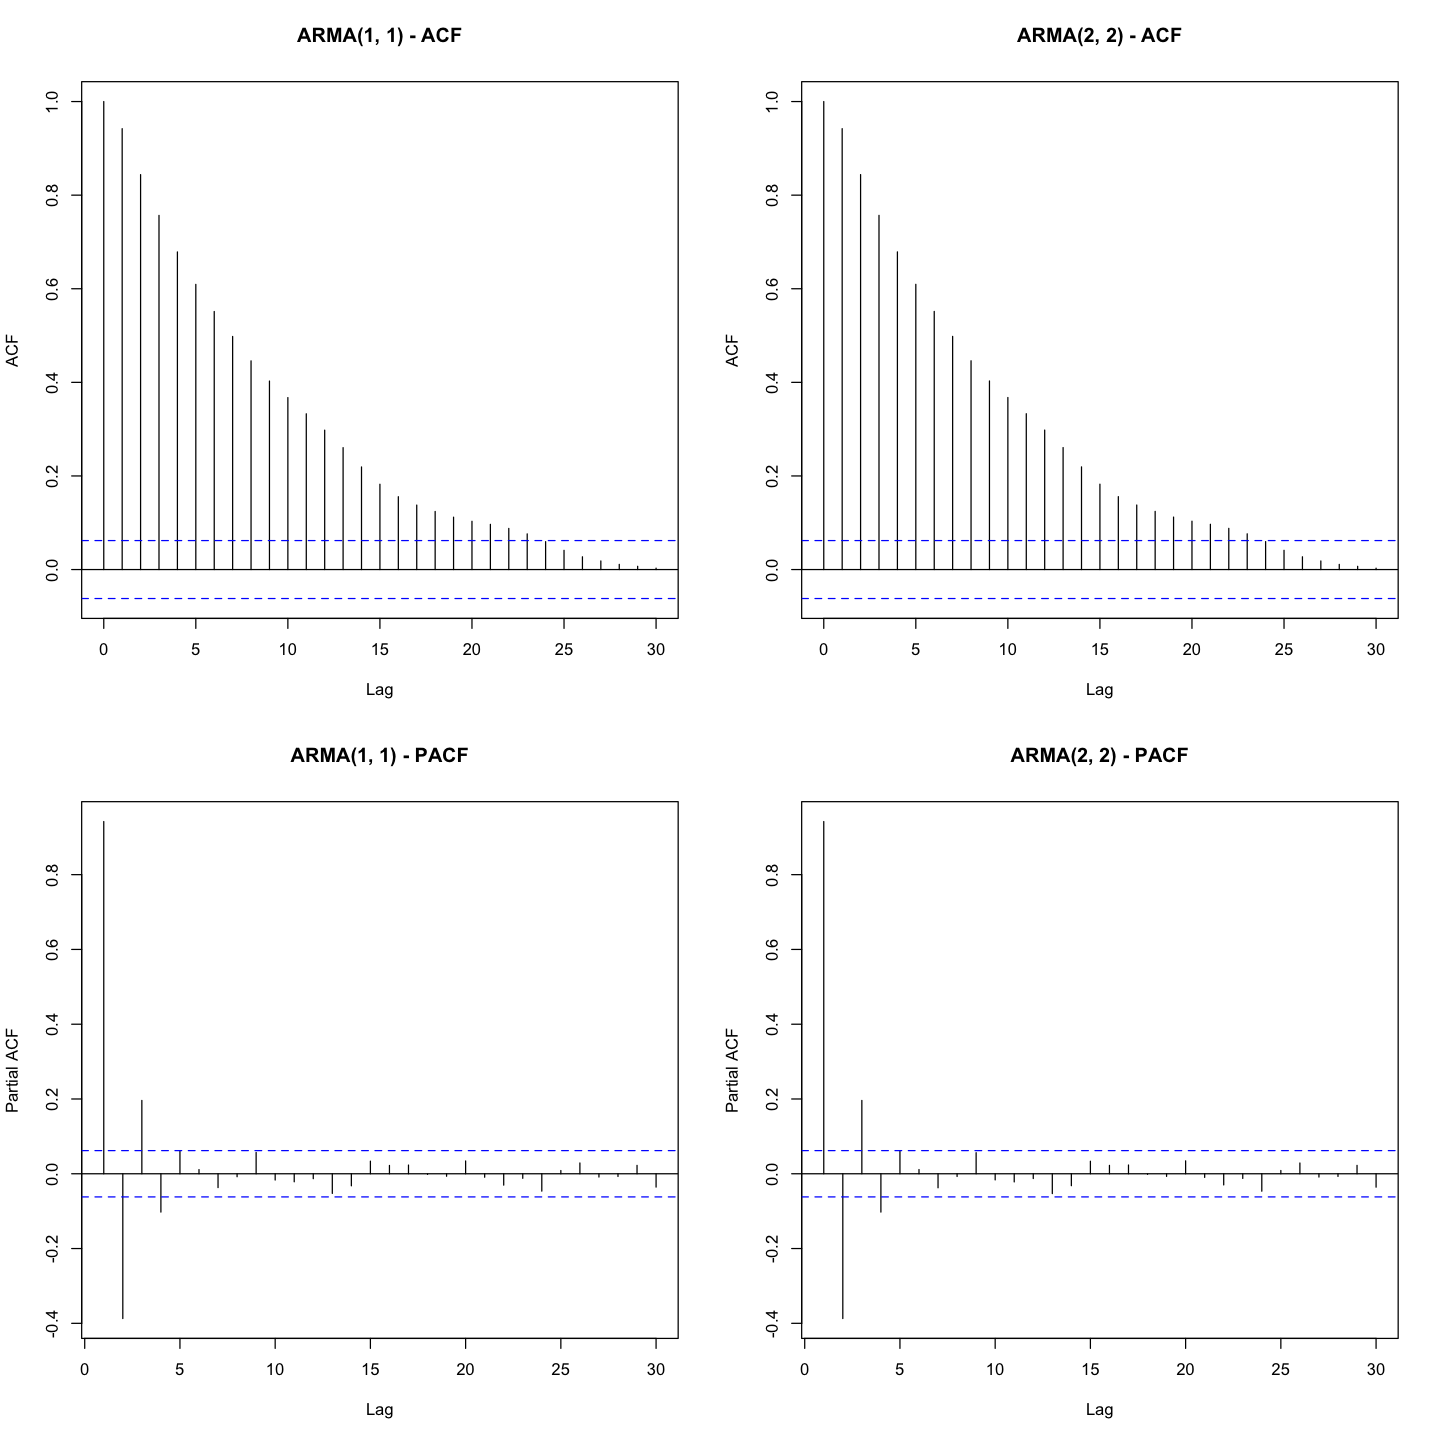

In [82]:
options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow = c(2, 2))
acf(arma11, main = 'ARMA(1, 1) - ACF')
acf(arma22, main = 'ARMA(2, 2) - ACF')
pacf(arma11, main = 'ARMA(1, 1) - PACF')
pacf(arma22, main = 'ARMA(2, 2) - PACF')

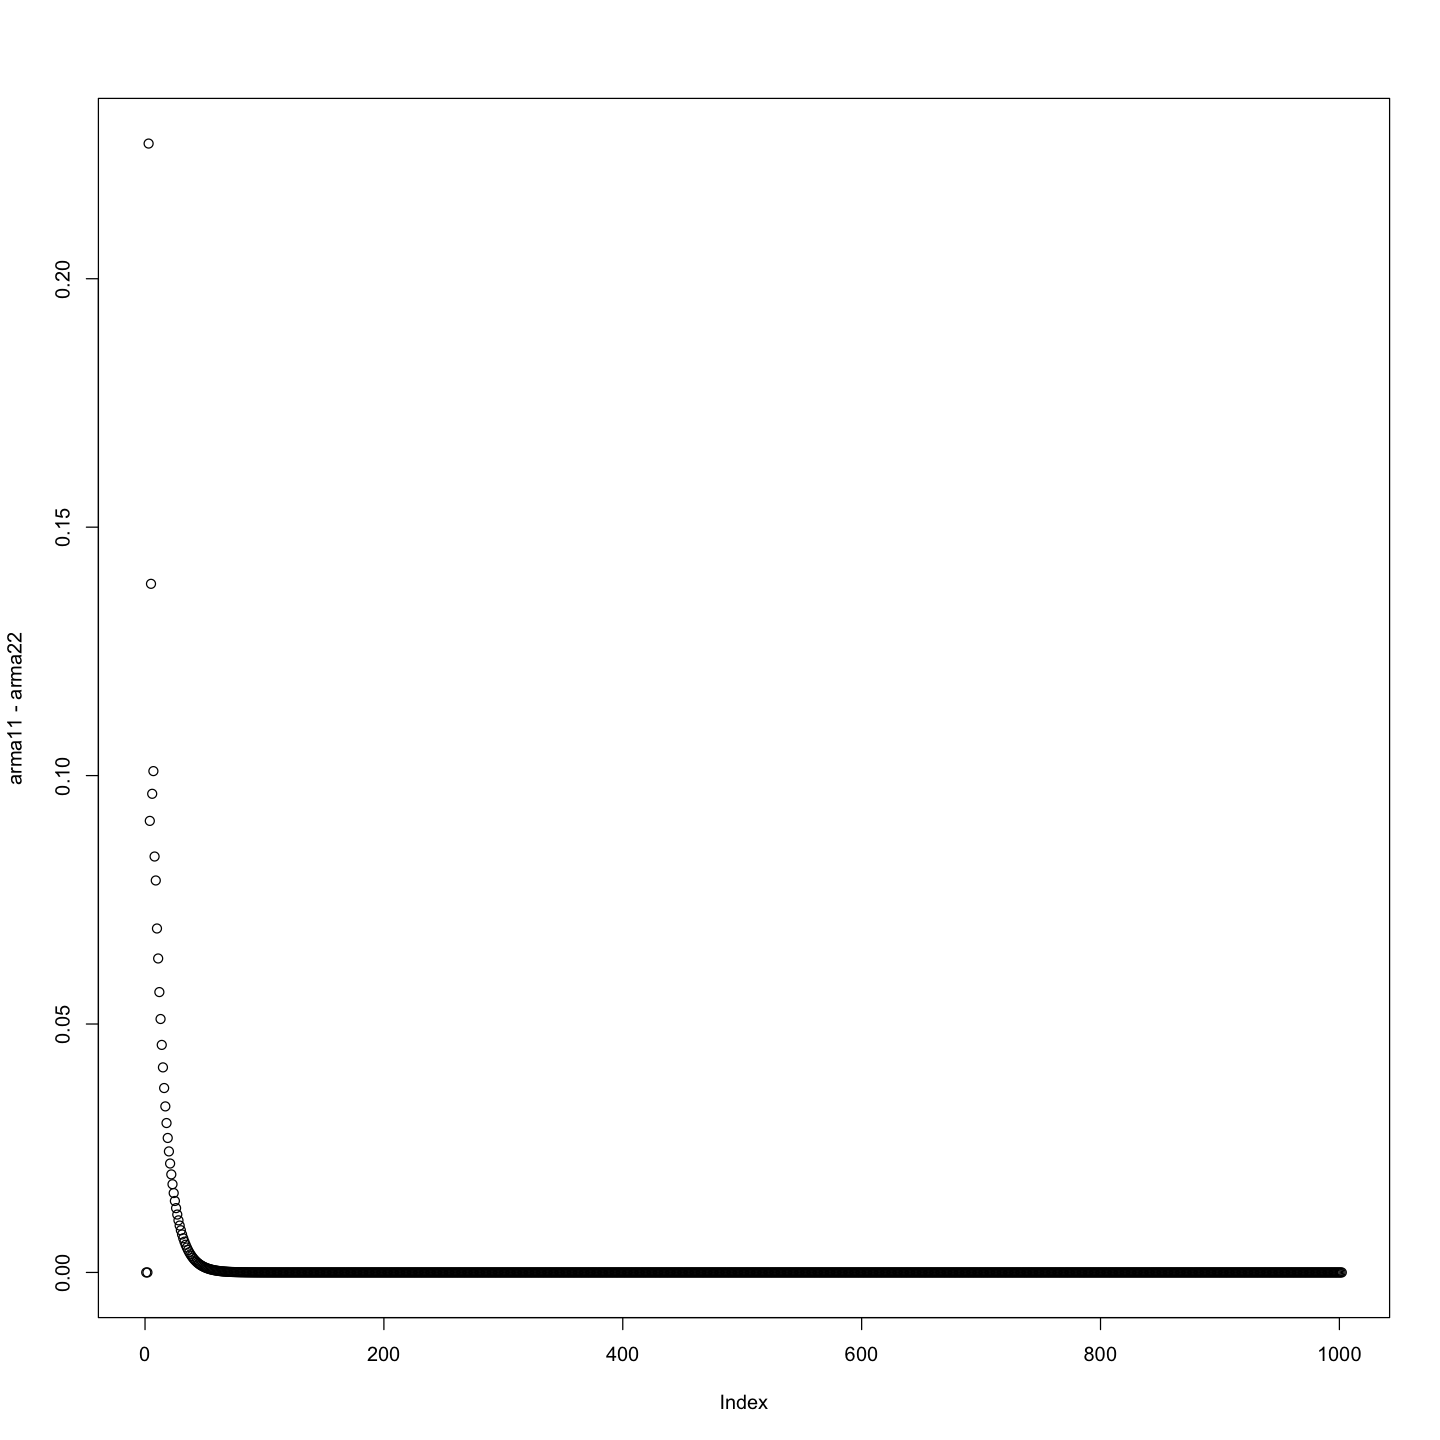

In [83]:
plot(arma11 -  arma22)